<center><h1> Relaxation time analysis from MD simulations </h1> </center> </br>
<center>Version 2.0 , last modified: 4.2.2023</center>

<h3>1. README.yaml creation - basic info on simulations </h3>
In manage_files.py, last modified: 3.2.2023
<h3>2. Removal of water from xtc, tpr, gro for faster analysis </h3>
In manage_files.py, last modified: 3.2.2023
<h3>3. Correlation function calculations</h3>
In relaxation_times.py, last modified: 4.2.2023
<h3>4. Average over correlation functions</h3>
In relaxation_times.py, last modified: 4.2.2023
<h3>5. Spin relaxation times calculations</h3>
In relaxation_times.py, last modified: 4.2.2023
<h3>6. Plotting</h3>

In [1]:
import sys
import numpy as np
from scipy import optimize
import relaxation_times as rt
import manage_files as mf
import plotting as pt
import matplotlib.pyplot as plt
import os
import re
import yaml
import fnmatch
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

IndentationError: unexpected indent (relaxation_times.py, line 707)

<h3> 1) Create README.yaml file + 2) Remove water </h3>
This part is intended for managing many simulations at the same time. <br>
Or just improving the management of simulations in general.<br>
The README.yaml allows for more efficient analysis later on. <br>
Simulations are expected to be in different subfolders of parent_folder_path.

In [3]:
#help(mf.go_through_simulation)

In [3]:
#help(mf.remove_water)

In [2]:
parent_folder_path="/home/ricky/Documents/from_work/MD/simulations/production_run/"
systems=["111wrr","eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2","red_simulations"] # select only systems which 
                                                     #folder name contains some of these
compress_xtc=False # True/False/Original 
                   #     True - creates tpr, xtc, gro with selection "selection"
                   #     False - creates tpr, gro with the selection, 
                   #             assumes that reduced xtc already exists
                   #     Original - uses original trajectories for correlation function calculation
                   #                slows significantly down the calculations
                    
selection="non-Water"  # at the moment only standard selections that exists in a default index file supported
                 # such as non-Water 
                    
for file in os.listdir(parent_folder_path):
    folder_path = parent_folder_path+os.fsdecode(file)+"/"
    for system in systems:
        if fnmatch.fnmatch(os.fsdecode(file), "*"+system+"*"):
            mf.go_through_simulation(folder_path)
            mf.remove_water(folder_path,selection,compress_xtc)


non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.xtc
none
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.tpr
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.top
mdout.mdp
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.ndx
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.gro
none
none


/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


The topology and XTC trajectory files don't have the same number of atoms!
Topology number of atoms 159819
Trajectory: /home/ricky/Documents/from_work/MD/simulations/production_run/eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2/non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.xtc Number of atoms 2051
gro or xtc do not exist in the folder, or they do not match
Checking for new trajectories within defiened conditions is succesfully finished
Exporting information with gmx dump


                       :-) GROMACS - gmx dump, 2021.1 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

great success!!!
converting tpr and gro files


                   :-) GROMACS - gmx convert-tpr, 2021.1 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu 

Extending remaining runtime of by 10 ps (now 1500005000 steps)
Selected 17: 'non-Water'
Note that major changes are planned in future for trjconv, to improve usability and utility.
Select group for output
Selected 0: 'System'


Reduced ilist    BONDS from    799 to    799 entries
Reduced ilist UREY_BRADLEY from   3772 to   3772 entries
Reduced ilist    PDIHS from   5813 to   5813 entries
Reduced ilist    IDIHS from     49 to     49 entries
Reduced ilist     CMAP from     20 to     20 entries
Reduced ilist     LJ14 from   5071 to   5071 entries
Reduced ilist   CONSTR from   1176 to   1176 entries
Reduced ilist   SETTLE from  39442 to      0 entries
Reduced ilist   VSITE3 from  39442 to      0 entries
Reduced block    excls from 159819 to   2051 index-, 654759 to  23687 a-entries
Writing statusfile with starting step          0 and length 1500005000 steps...
                                 time      0.000 and length 3000010.000 ps

GROMACS reminds you: "Schrödinger's backup: The condition of any backup is unknown until a restore is attempted." (Anonymous)

                     :-) GROMACS - gmx trjconv, 2021.1 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apo

<h3> 3) Calculate correlation functions </h3>
Code exists and will be soon implemented <br> 
Includes creation of ndx file and calling gromacs for corellation function analysis

<h4>Example use 1 of rt.CalculateCorrelationFunctions</h4>
<br>
No README.yaml exists, user enters gro,xtc,tpr files path <br>
If 42 is returned, be happy, you just obtained <br>
The ultimate answer to life, universe, and everything

In [6]:
#help(rt.CalculateCorrelationFunctions)

In [2]:
output_path="./"    
folder_path="/home/ricky/Documents/from_work/MD/simulations/production_run/111_empty_try/"


begin=0
end=-1
RM_avail=False
atom1="C1"
atom2="H11"
moleculeType="All"
gro="SDS_1_SDS_NA_OPC_solvated_from_local_production_frame_0ns_from_equilibrated_trajectory_every100fs_local_25ps_mahti.gro"
xtc="SDS_1_SDS_NA_OPC_solvated_from_local_production_frame_0ns_from_equilibrated_trajectory_every100fs_local_25ps_mahti_nojump_nosolvent_10ns.xtc"
tpr="SDS_1_SDS_NA_OPC_solvated_from_local_production_frame_0ns_from_equilibrated_trajectory_every100fs_local_25ps_mahti.tpr"


rt.CalculateCorrelationFunctions(folder_path,begin,end,RM_avail,atom1,atom2,moleculeType,output_path,gro,xtc,tpr)

Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 42


<h4>Example use 2 of rt.CalculateCorrelationFunctions</h4>
<br>
README.yaml exists, use for peptides/proteins <br>


Calculates correlation functions for all the bonds of the same typy within the system. <br>
In the case of multiple same proteins, correlation functions are calculated separately <br>
as thouht for different residues

In [2]:
output_path="./"    
parent_folder_path="/home/ricky/Documents/from_work/MD/simulations/production_run/"
systems=["111vr","eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2","red_simulations"] # select only systems which 
                                                     #folder name contains some of these

begin=-1
end=10000
RM_avail=True
atom1="N"
atom2="HN"
moleculeType="Protein"

for file in os.listdir(parent_folder_path):
    folder_path = parent_folder_path+os.fsdecode(file)+"/"
    for system in systems:
        if fnmatch.fnmatch(os.fsdecode(file), "*"+system+"*"):
            print(os.fsdecode(file))
            rt.CalculateCorrelationFunctions(folder_path,begin,end,RM_avail,atom1,atom2,moleculeType,output_path)
    

eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
Correlation function for  eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2  already calculated.


<h4>Example use 3 of rt.CalculateCorrelationFunctions by rt.CorrelationFunctionsLipids</h4>
<br>
README.yaml exists, use for lipids/detergents <br>


Calculates correlation functions for all the bonds specified. <br>
If more bonds of the same type exist, it averages over them <br>
Also means that if the same atom names exist for different 
molecules/parts - it creates a problem

In [5]:
#help(rt.CorrelationFunctionsLipids)

In [3]:
output_path="//home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/"    
parent_folder_path="/home/ricky/Documents/from_work/MD/simulations/production_run/"
systems=["111","blue_simulations","red_simulations"] # select only systems which 
                                                     #folder name contains some of these

begin=-1
end=-1
RM_avail=True
moleculeType="All"

CH_bonds=[("C1","H11"),("C2","H21"),("C3","H31"),
("C4","H41"),("C5","H51"),("C6","H61"),
("C7","H71"),("C8","H81"),("C9","H91"),
("C10","H101"),("C11","H111"),("C12","H121")]


rt.CorrelationFunctionsLipids(parent_folder_path,begin,end,RM_avail,moleculeType,output_path,systems,CH_bonds)

<h3> 4) Average over Correlation functions </h3>

Code exists, I will add it soon

<h3> 5) Get spin relaxation data and time scales of dynamics </h3>

Spin relaxation calculation parts adapted from scripts 
by  H. Antila,  S. Ollila and T. Ferreira <br>
saved in relaxation_times.py

<h4> 3.1) Set analysis parameters</h4>

In [2]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/51 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 

<h4>3.2) Set paths and names</h4>

In [3]:
parent_folder_path="CF/"   # for option 3 of calculation (not needed for option 2)
systems=[""]               # for opt 3, to further narrow down selection
                           # only takes the subfolders that contain the strings in the list
    
folder_path="CF/non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2_N_HN/" # for opt 2, not needed for otp 3

output_name="hMff_45SDS_s" # serves as a prefix for yaml output files
                           # if None and README_correl.yaml exists, xtc file name is used
                           #delete the '=None' in the last argument of rt.analyze_all_in_folder(...,output_name=None)
                           # if you with for the name here to be used
                           # otherwise uses the name of the xtc file, if README_correl.yaml exists
                           # README_correl.yaml exists if correlation functions were 
                           # calculated by this script
                           # if README_correl.yaml does not exist, output_name must be specified
                           

author_name="Ricky Nencini" # may be one day actually saved to somewhere :D
                            # for now be happy that you see your (or mine :D :D)
                            # beautiful name here :P

output_path_relax="times/"            # folder to save spin relaxation times yaml files
output_path_timescales="timescales/"  # folder to save timescale yaml files 

<h4>3.3) Perform the calculations </h4>
Option 1 - only calculates from 1 *.xvg file, for testing..., no output saved

In [3]:
"""Analyze individual correlation function - in case of testing..."""
#input_corr_file="alphaCF.xvg"
#AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)

'Analyze individual correlation function - in case of testing...'

Option 2 - calculates for 1 system in folder_path, saves spin relaxation times and timescales into yaml files

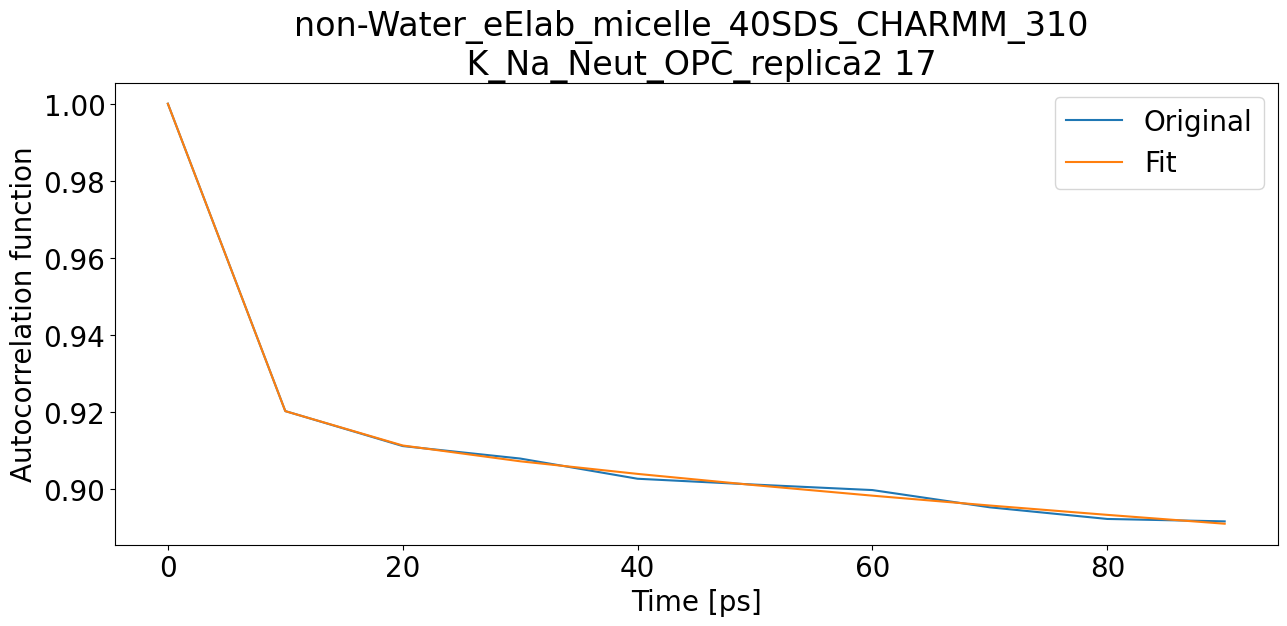

T1: 6.758553993402985 T2: 0.007409803465125476 NOE: -0.43001255763343593


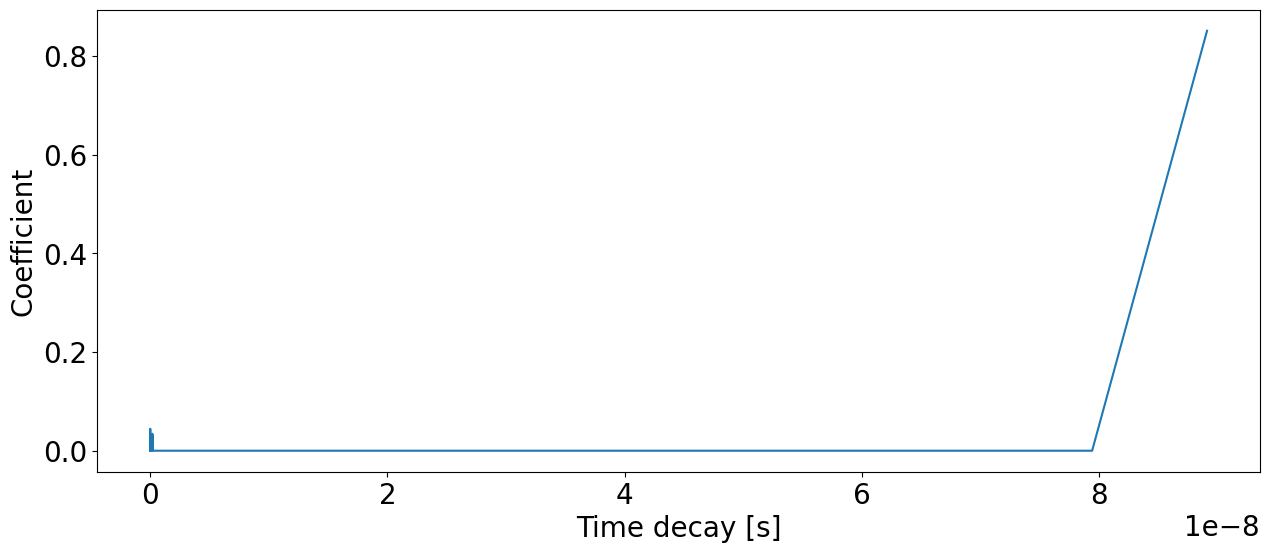

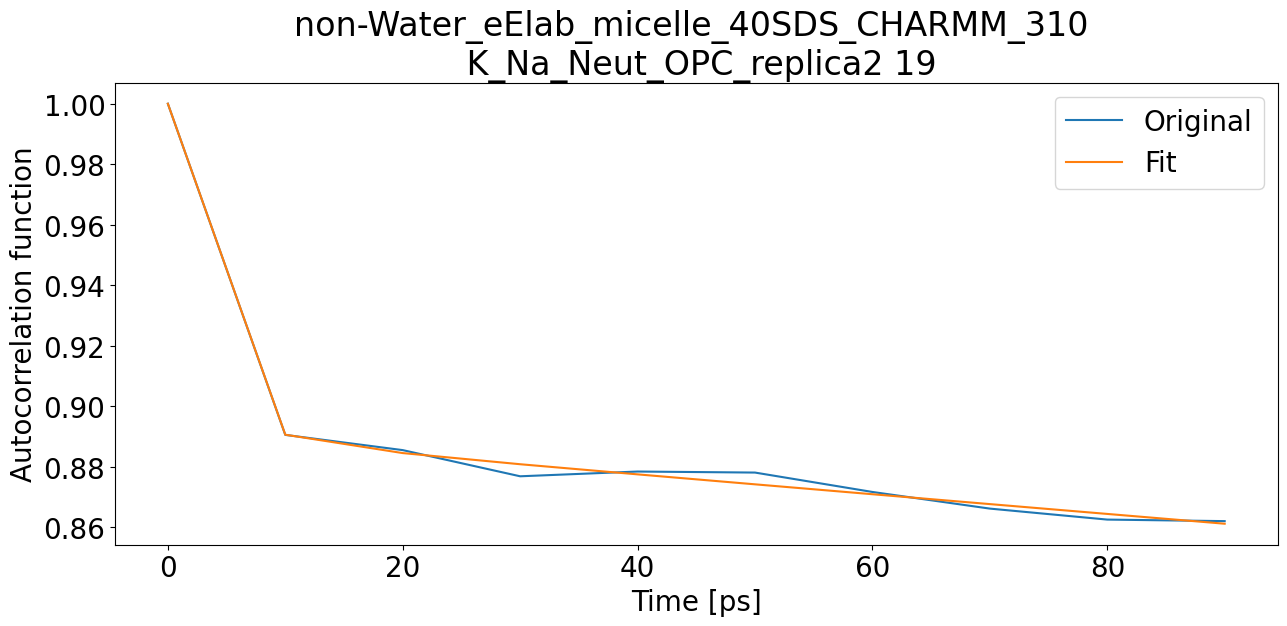

T1: 0.4764358864209072 T2: 0.18859694996645382 NOE: 0.7974825189714494


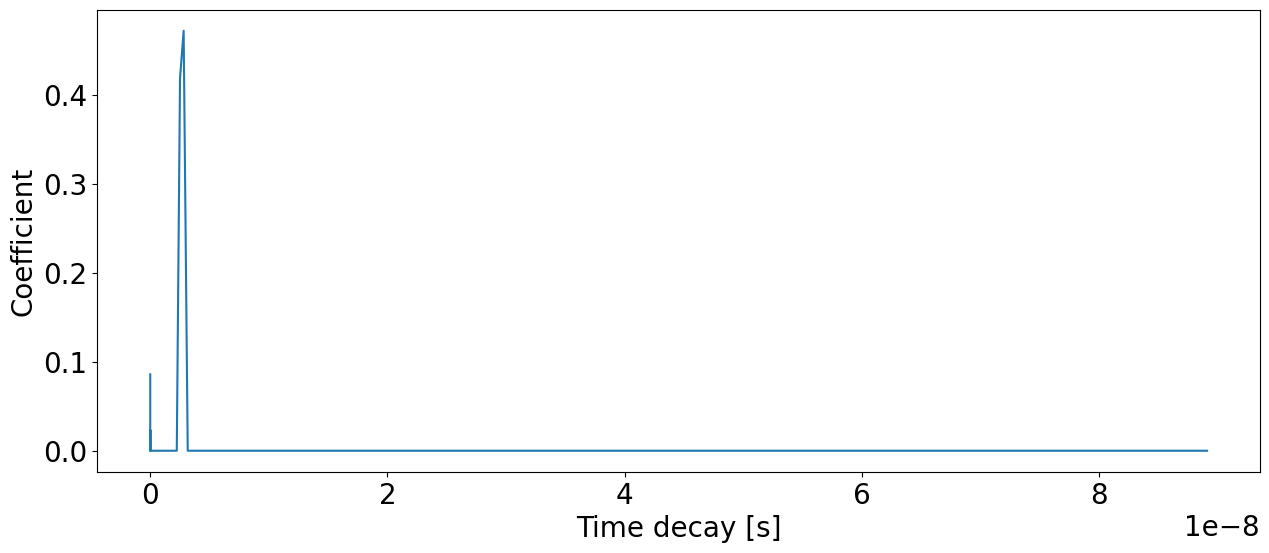

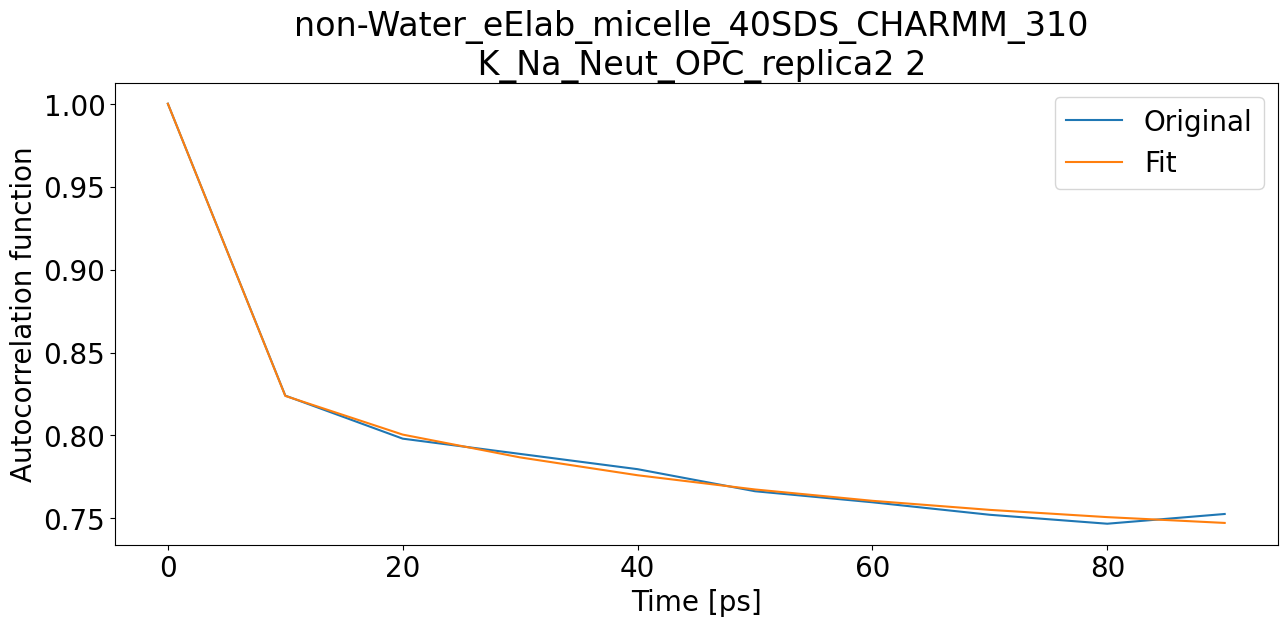

T1: 9.232952641346385 T2: 0.008590686428464542 NOE: -0.32726025876191


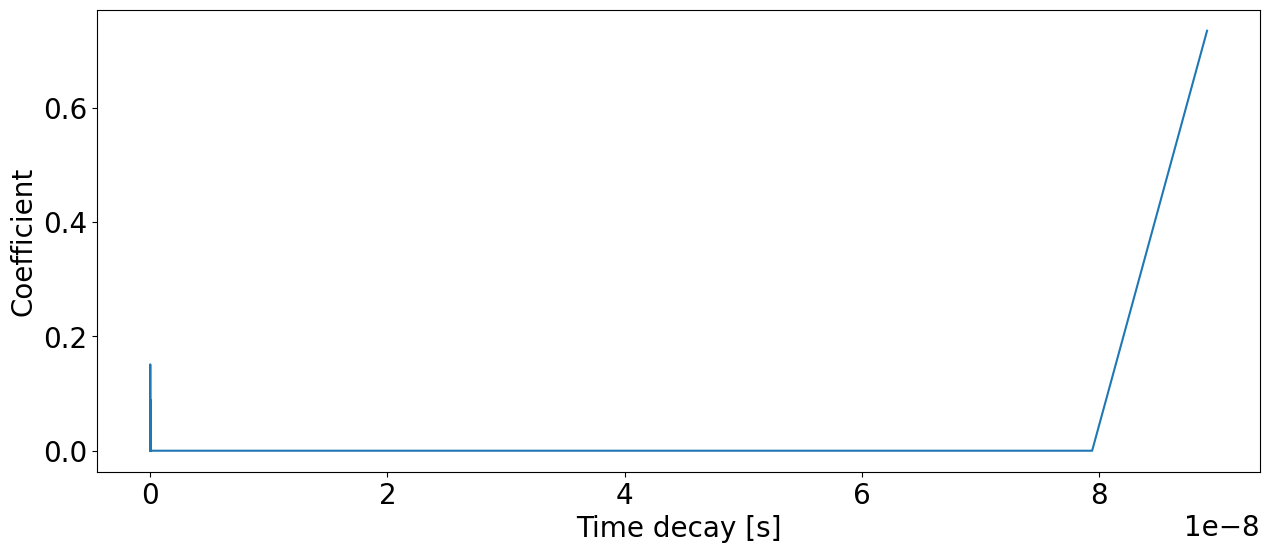

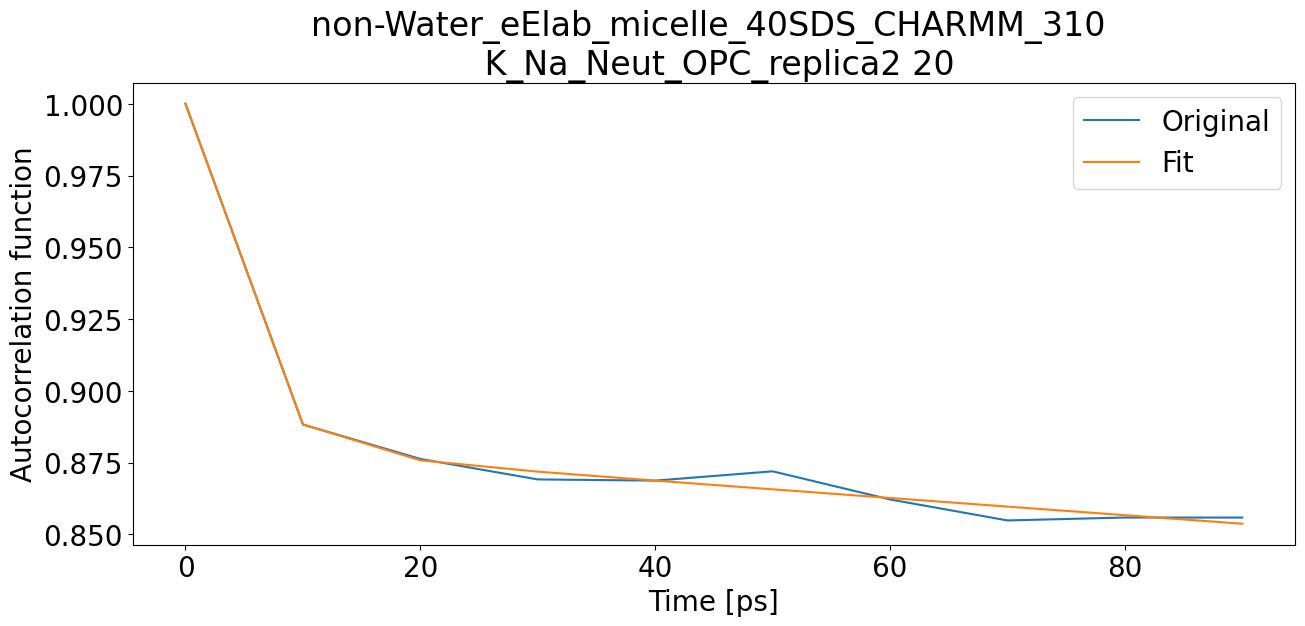

T1: 0.5786533671059134 T2: 0.029088402116783985 NOE: 0.7685557758882516


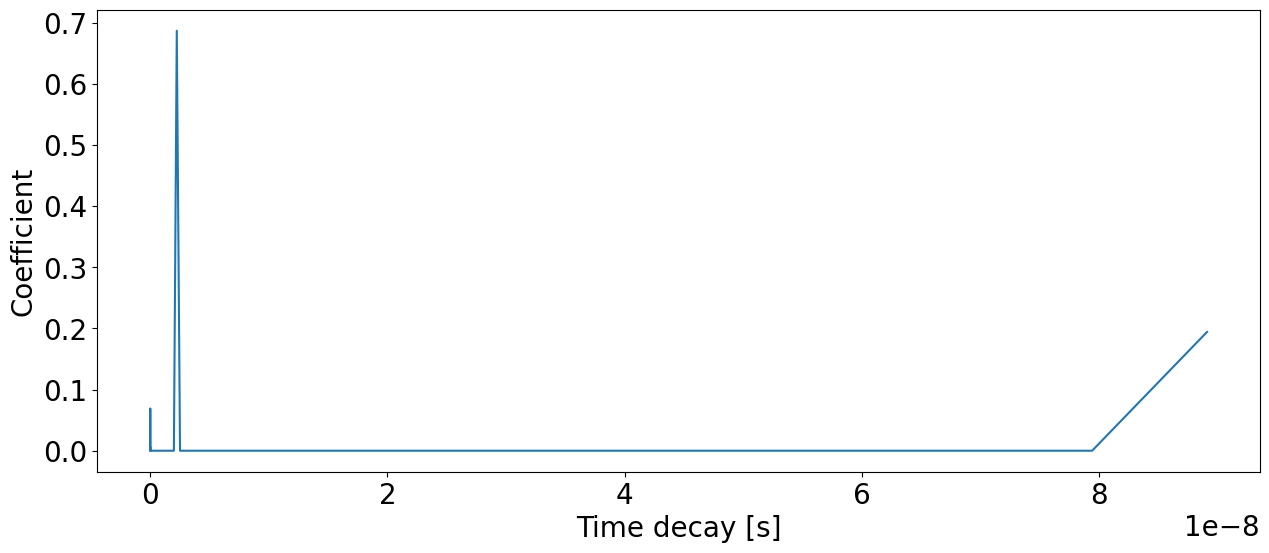

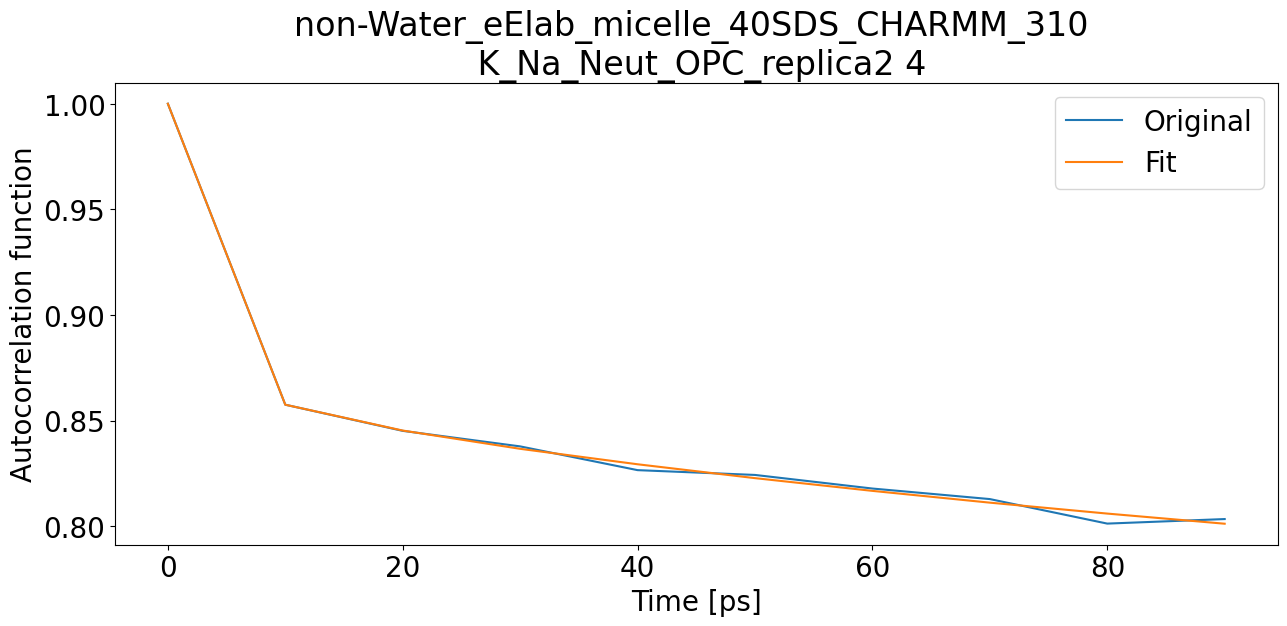

T1: 6.088343161807221 T2: 0.008510846397772377 NOE: -1.044360694962028


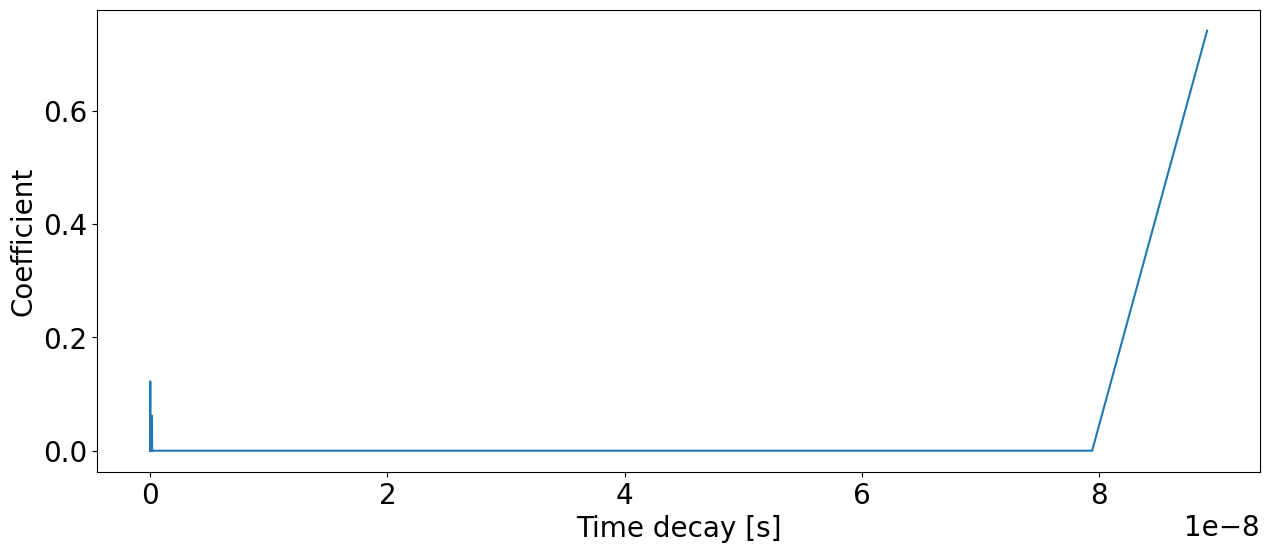

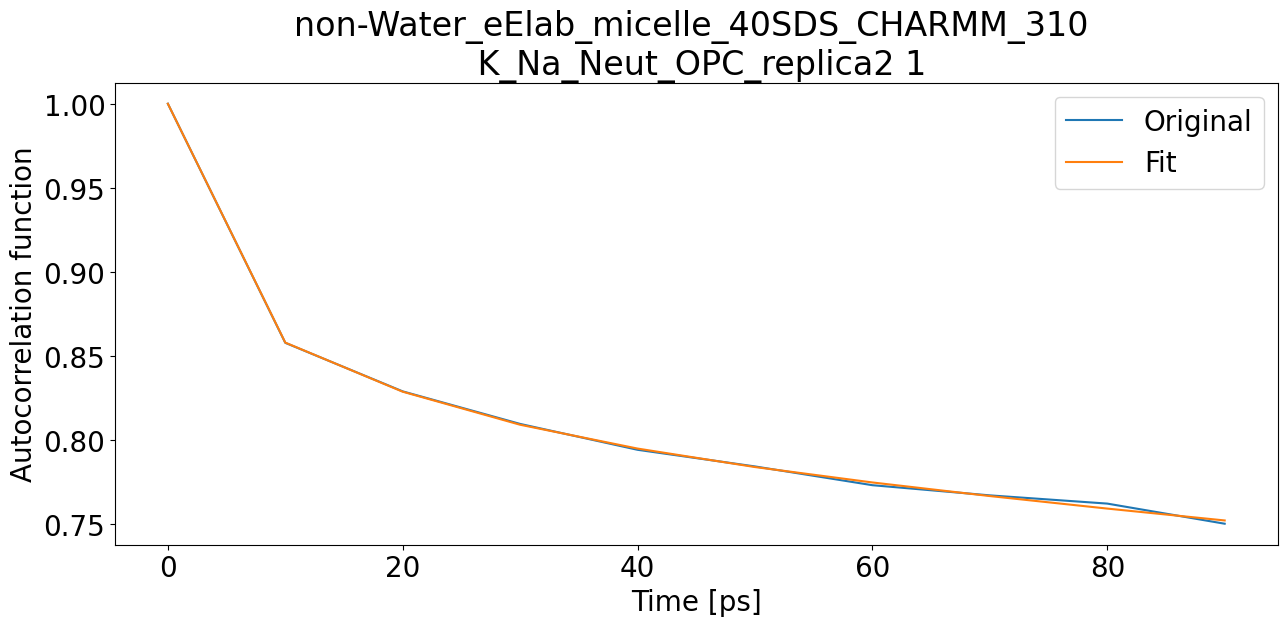

T1: 0.5232930225254389 T2: 0.376548530201097 NOE: 0.5207379926086226


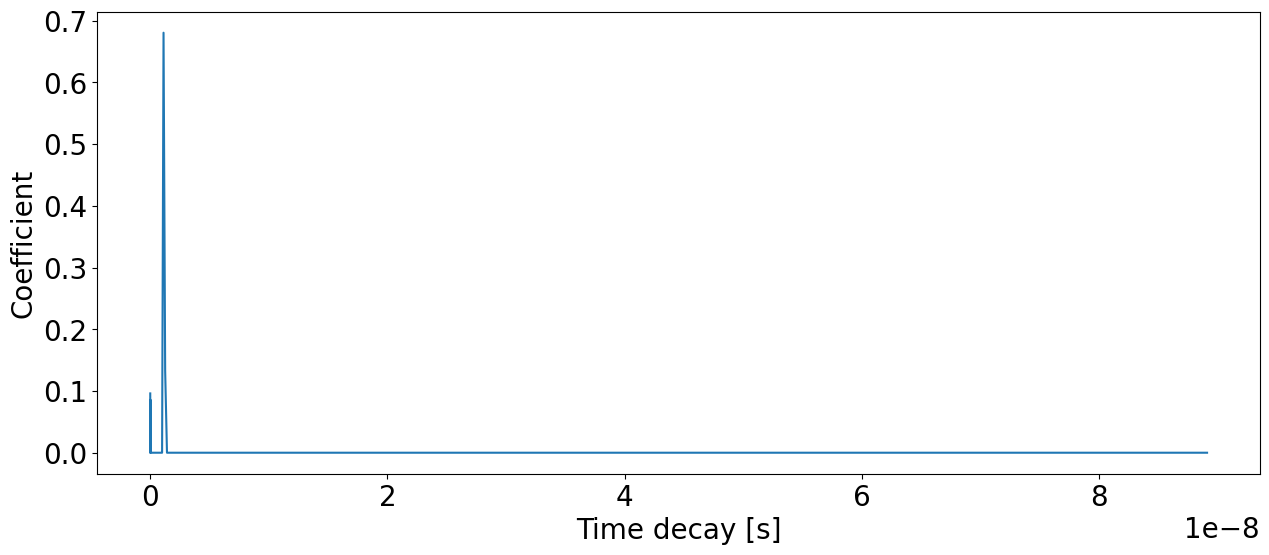

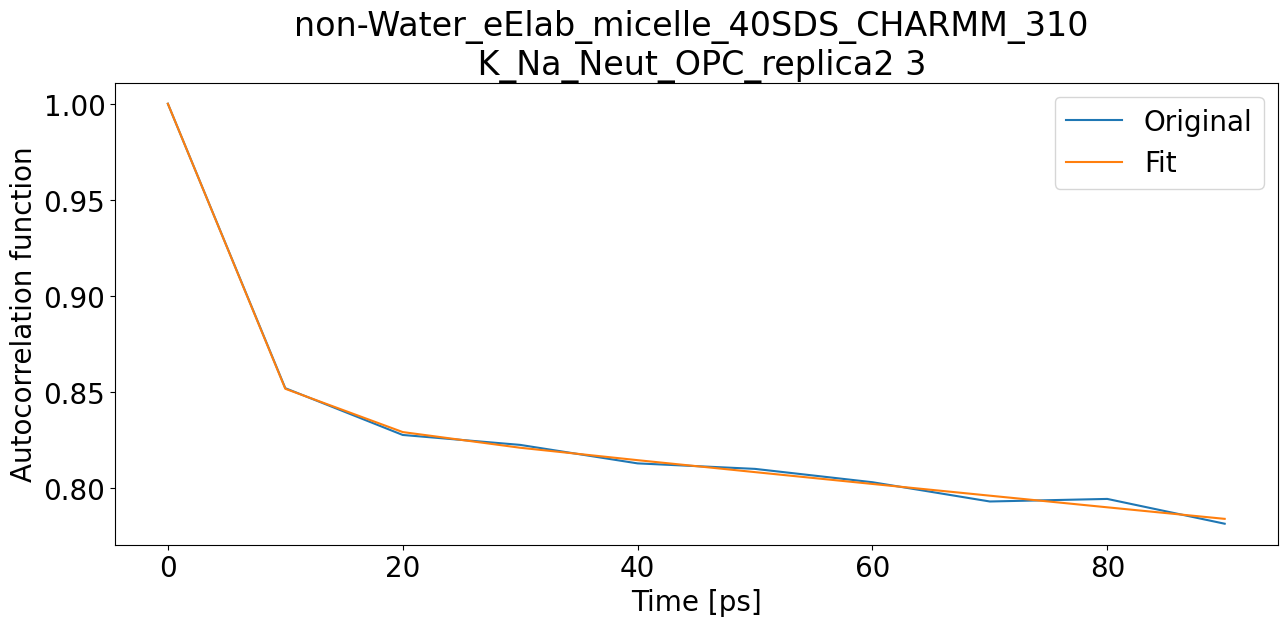

T1: 0.4875976218130133 T2: 0.3309799975132827 NOE: 0.6049155561216604


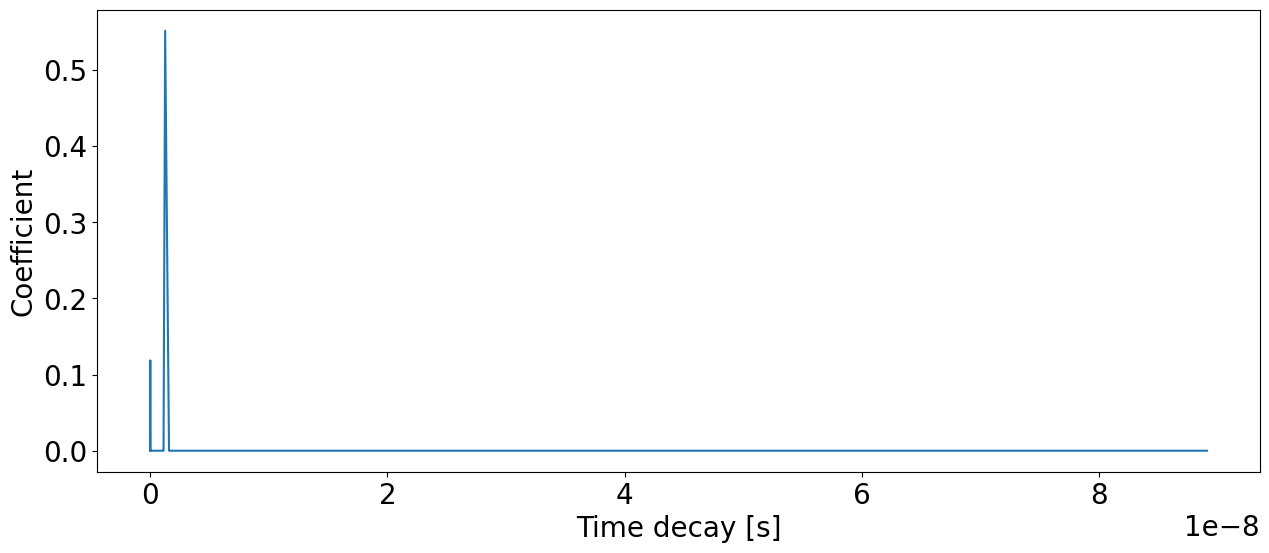

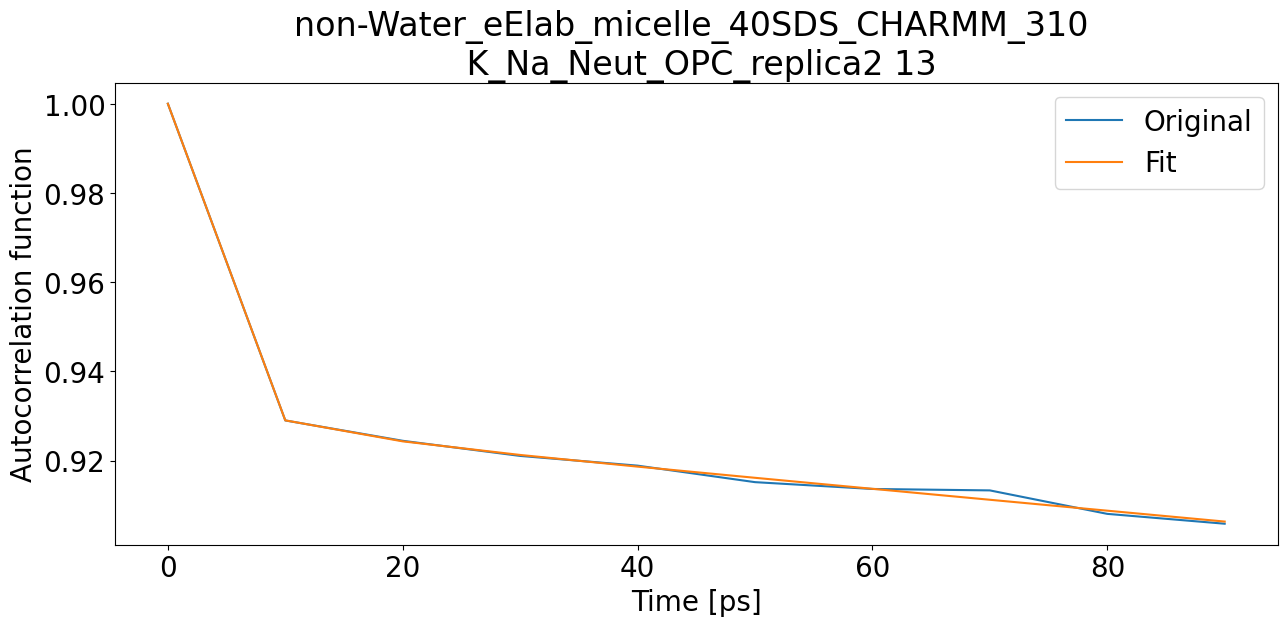

T1: 0.5393661072361077 T2: 0.14086325123995022 NOE: 0.8283156017467755


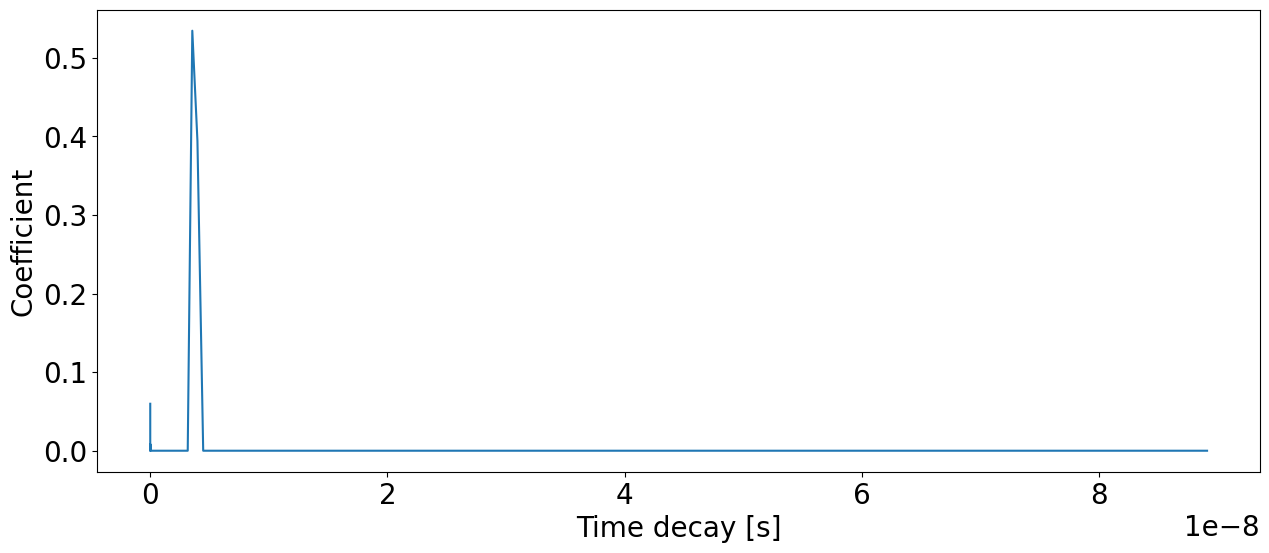

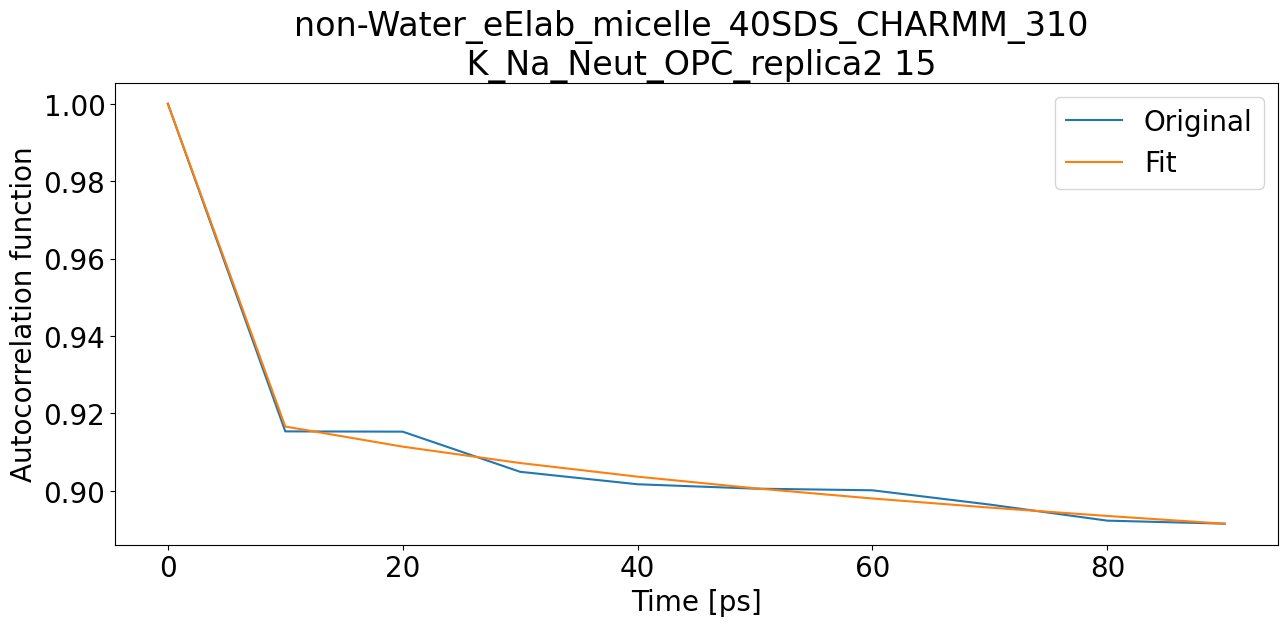

T1: 0.7302788870354374 T2: 0.10452779857390763 NOE: 0.8358845496150092


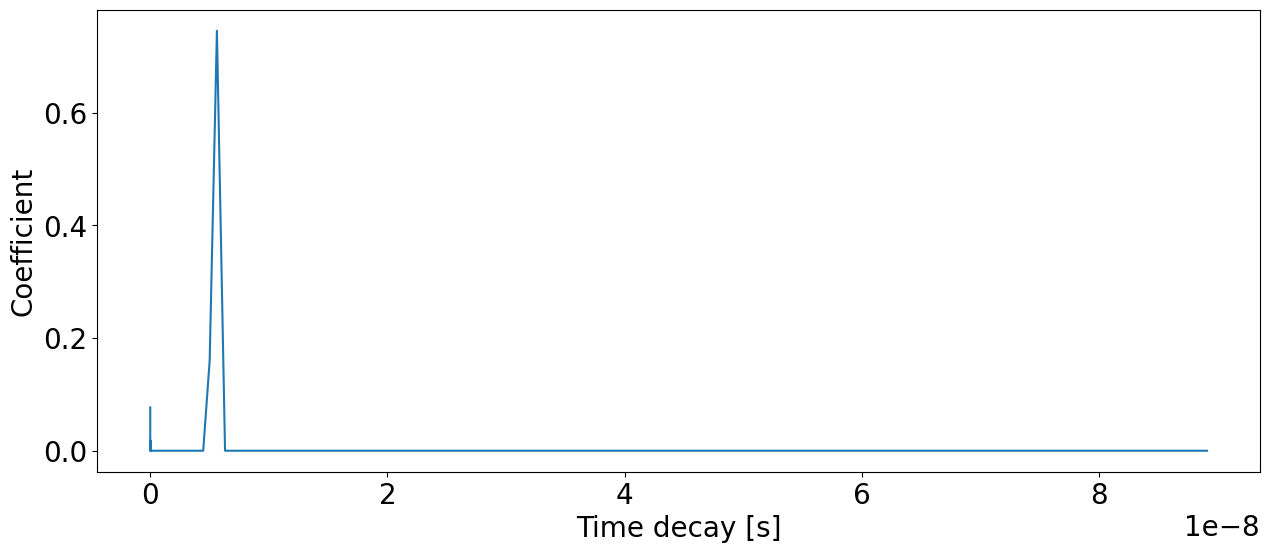

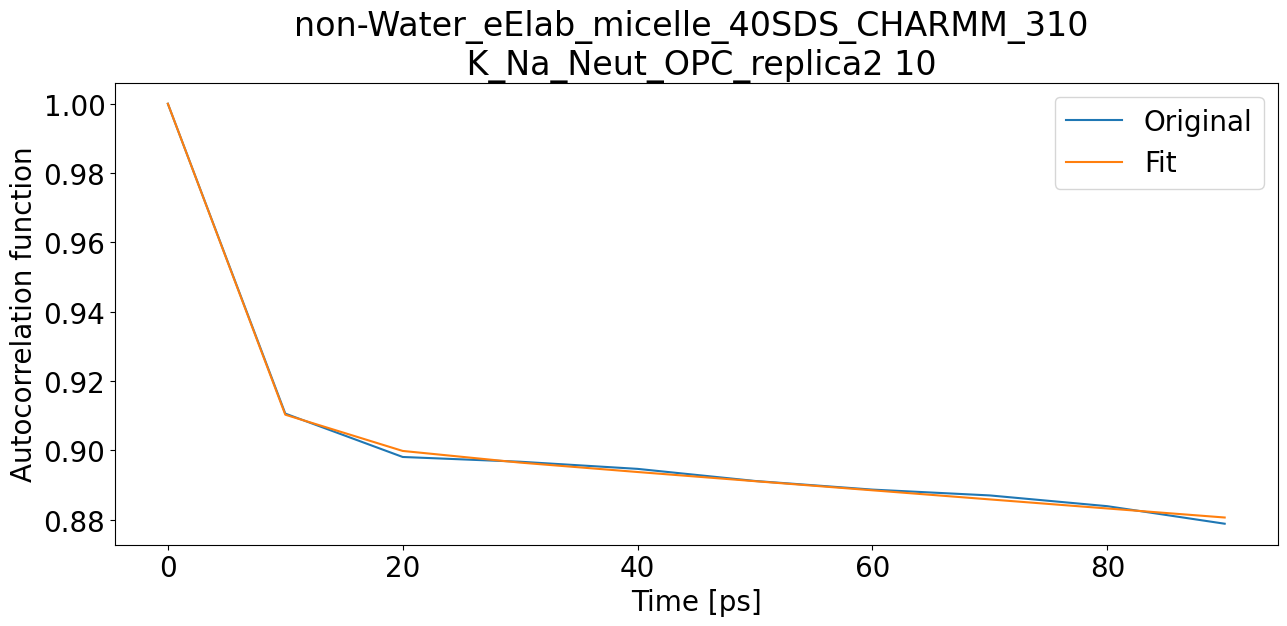

T1: 0.5234824434498184 T2: 0.15565016170947707 NOE: 0.8181880979472637


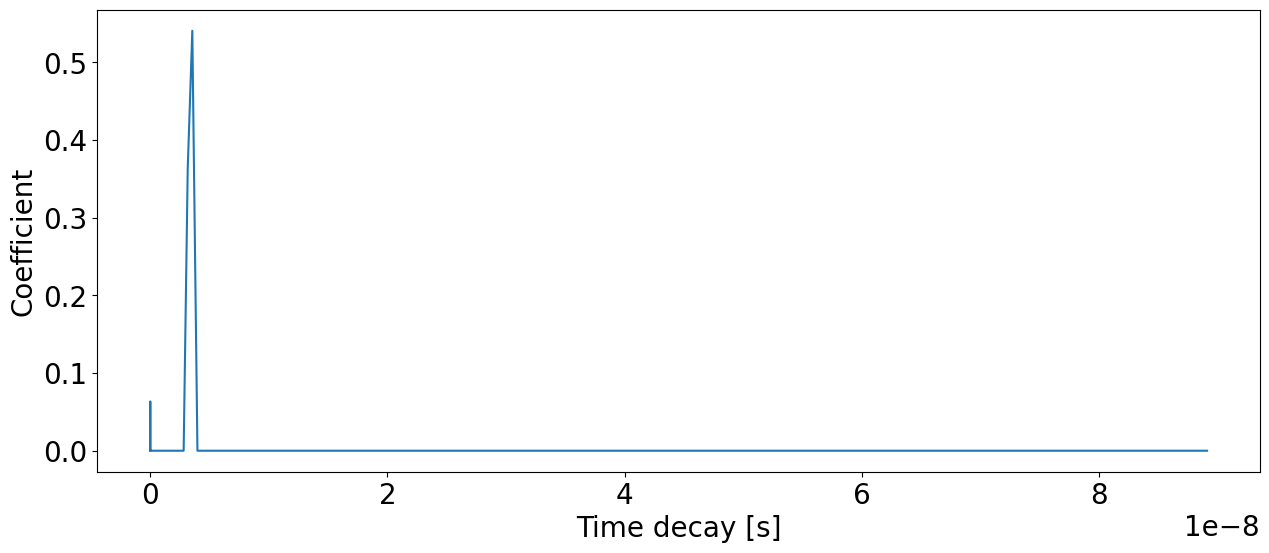

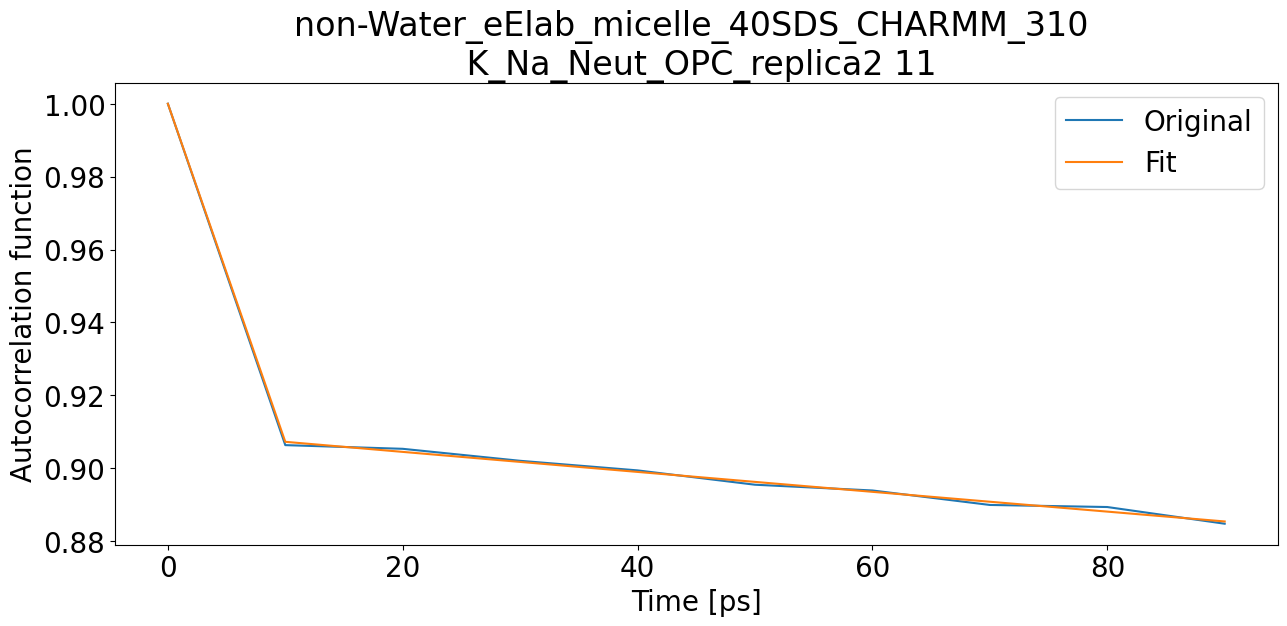

T1: 0.5123324417443299 T2: 0.1583530632800953 NOE: 0.820018257548895


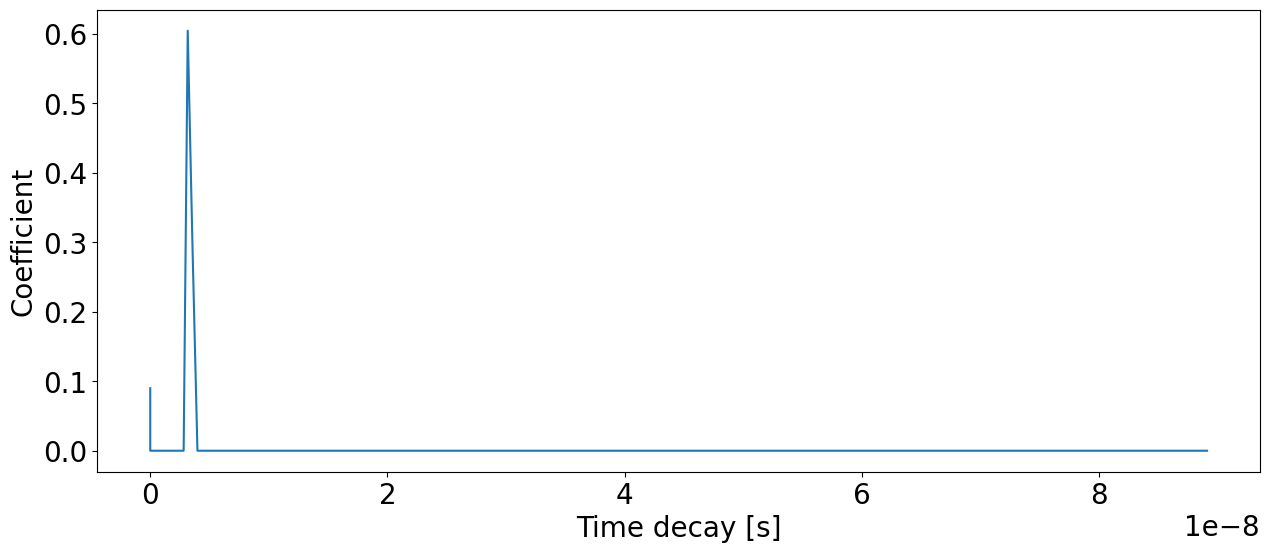

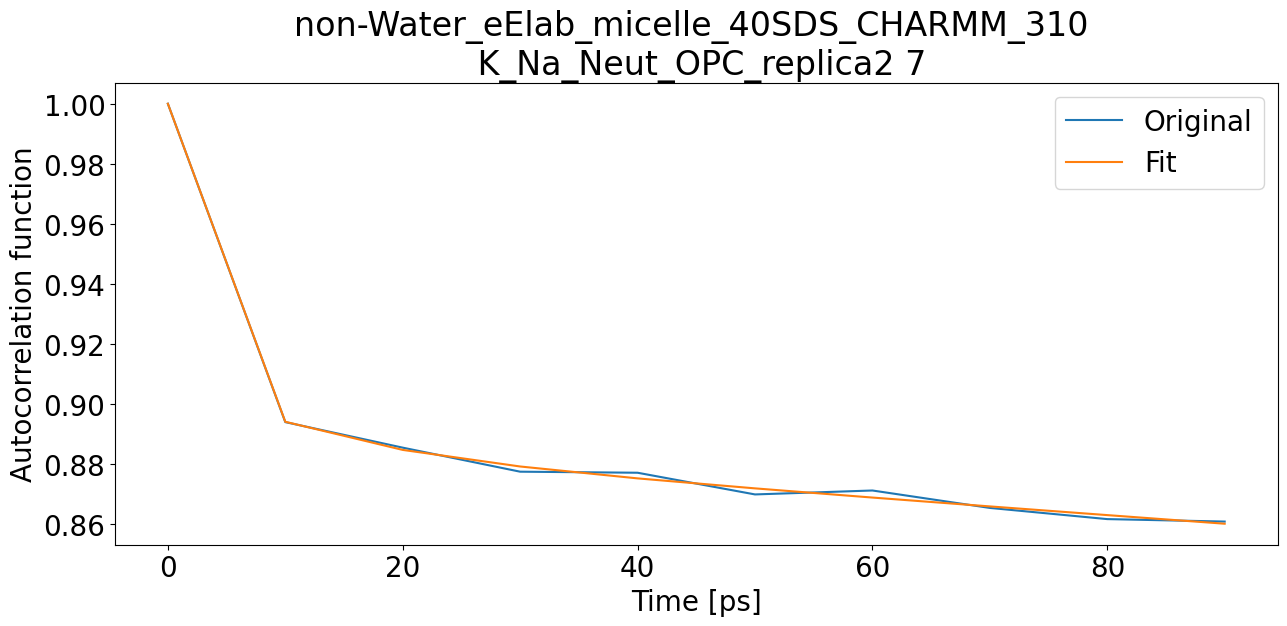

T1: 0.5039666501754549 T2: 0.17313845013654347 NOE: 0.808602082244924


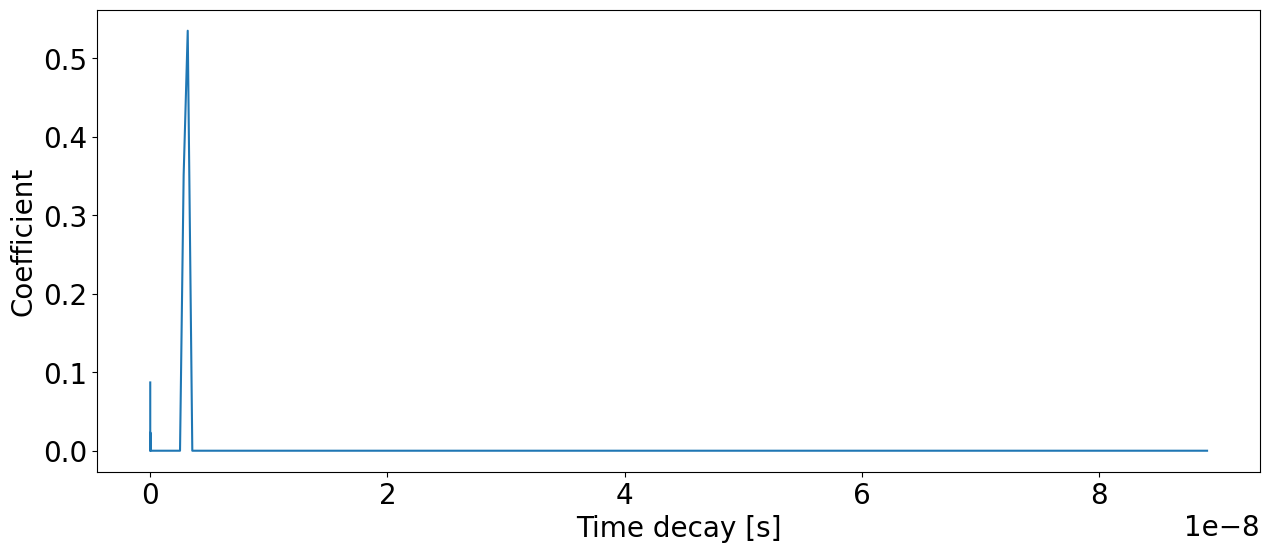

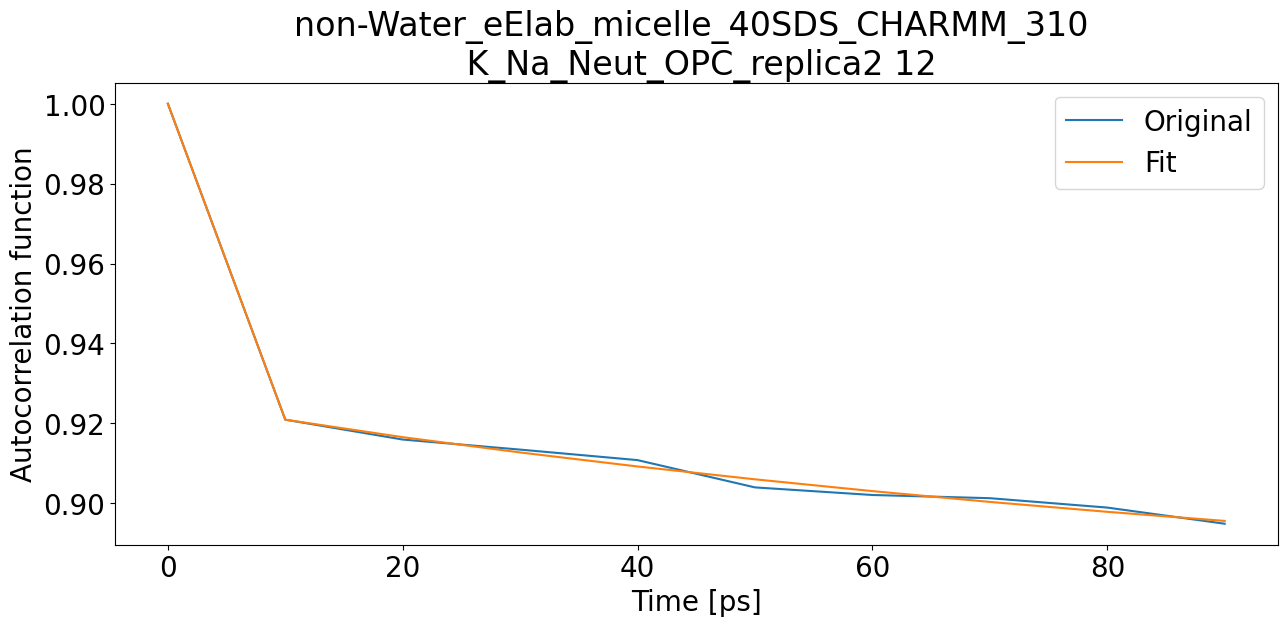

T1: 8.076900730275842 T2: 0.007227232150516085 NOE: -0.14178897128190826


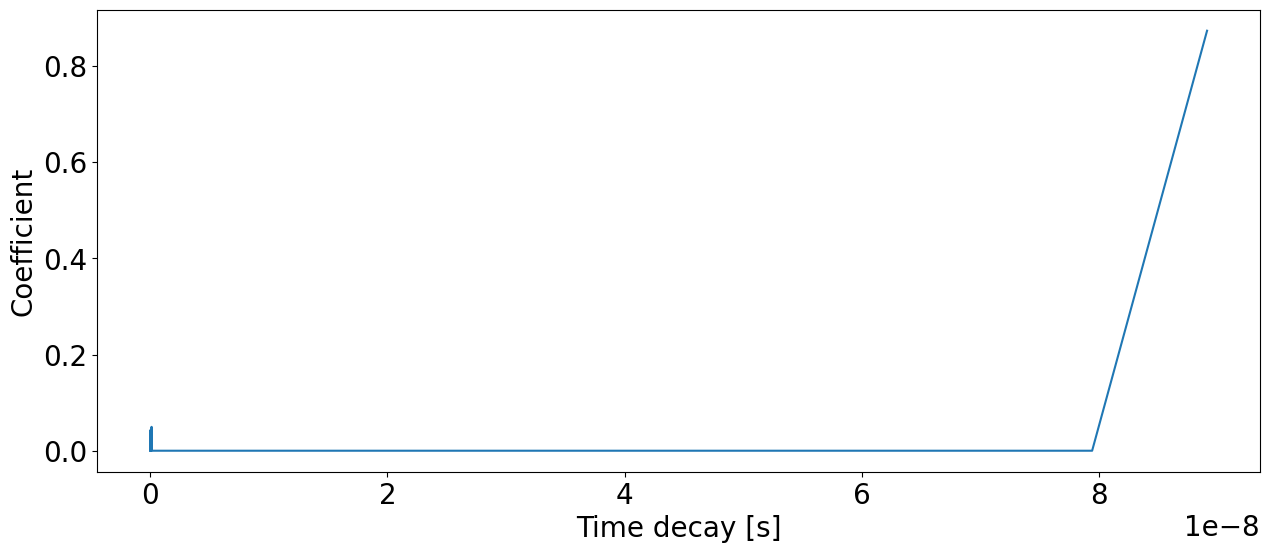

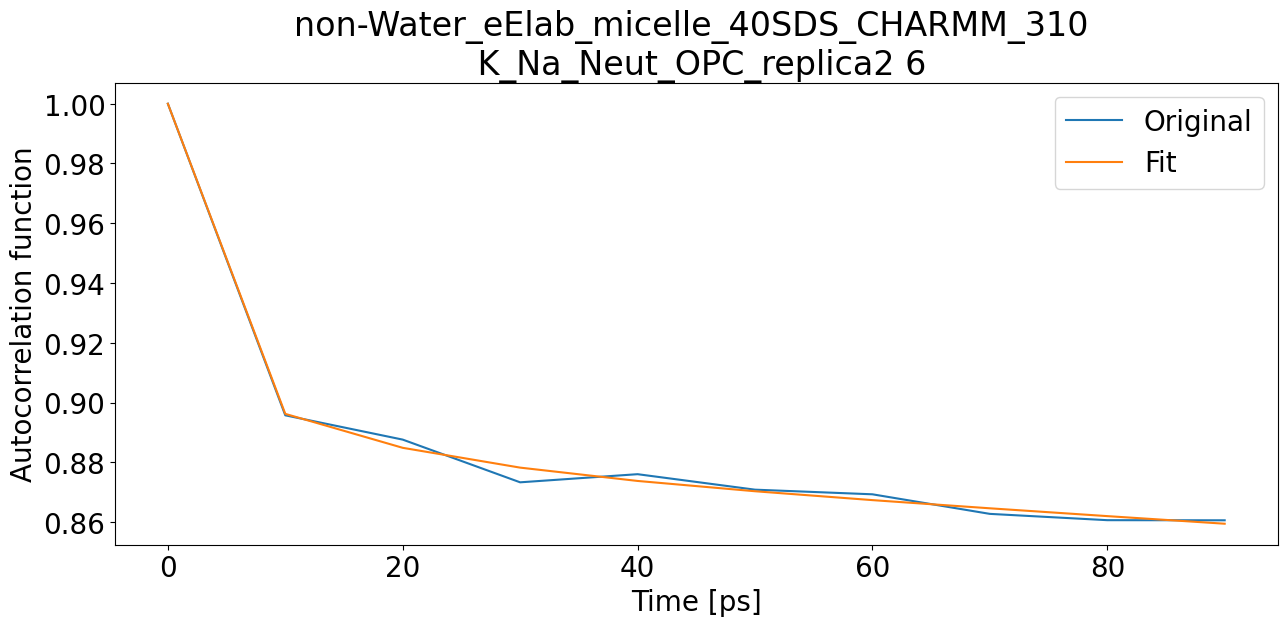

T1: 1.7520372216156095 T2: 0.009737711148551313 NOE: 0.397636568667015


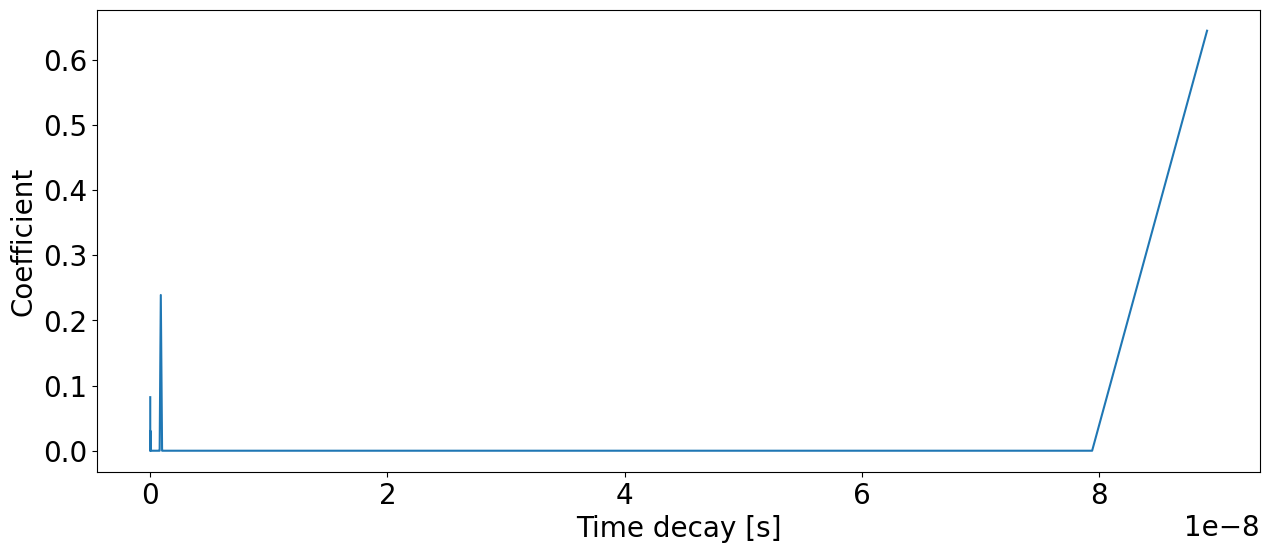

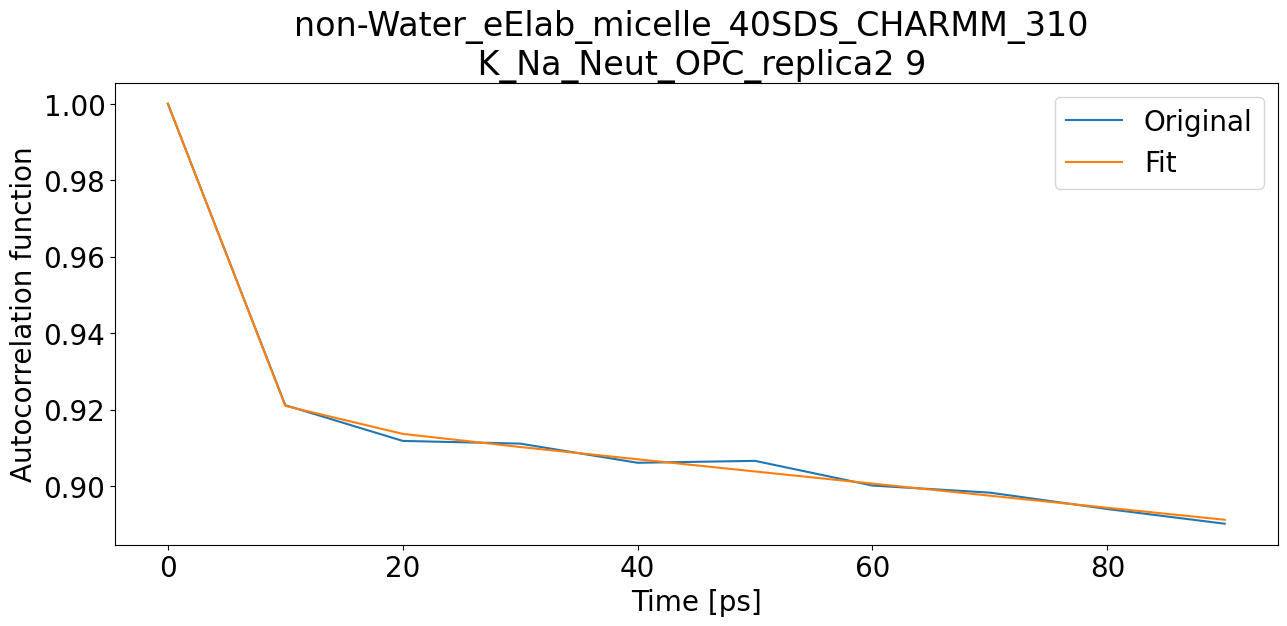

T1: 0.47250237568890285 T2: 0.17458577516028137 NOE: 0.8043305593792099


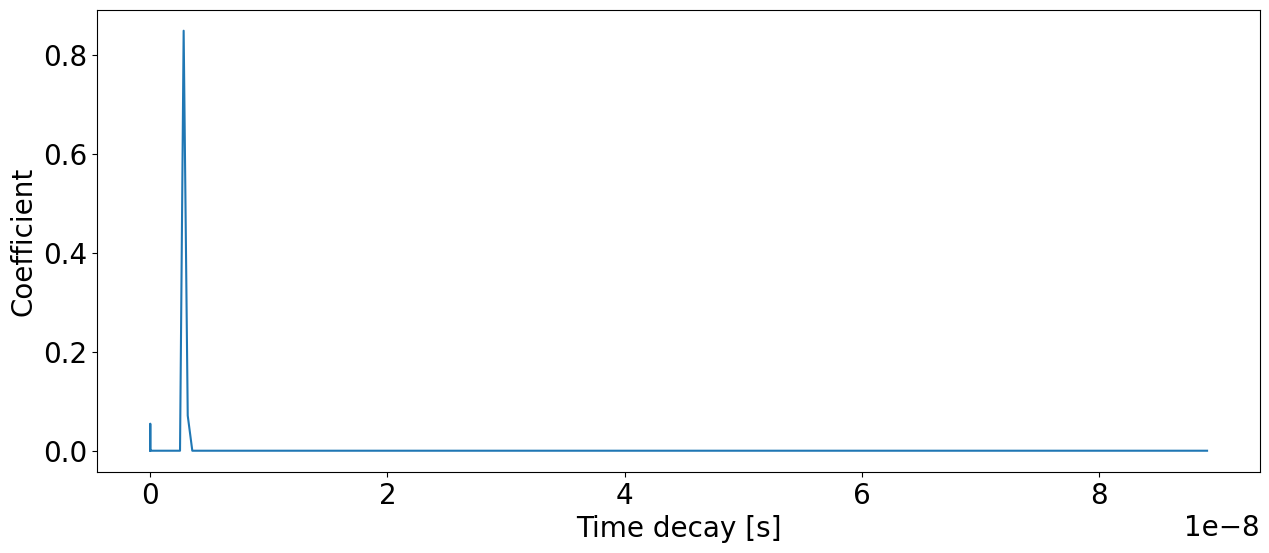

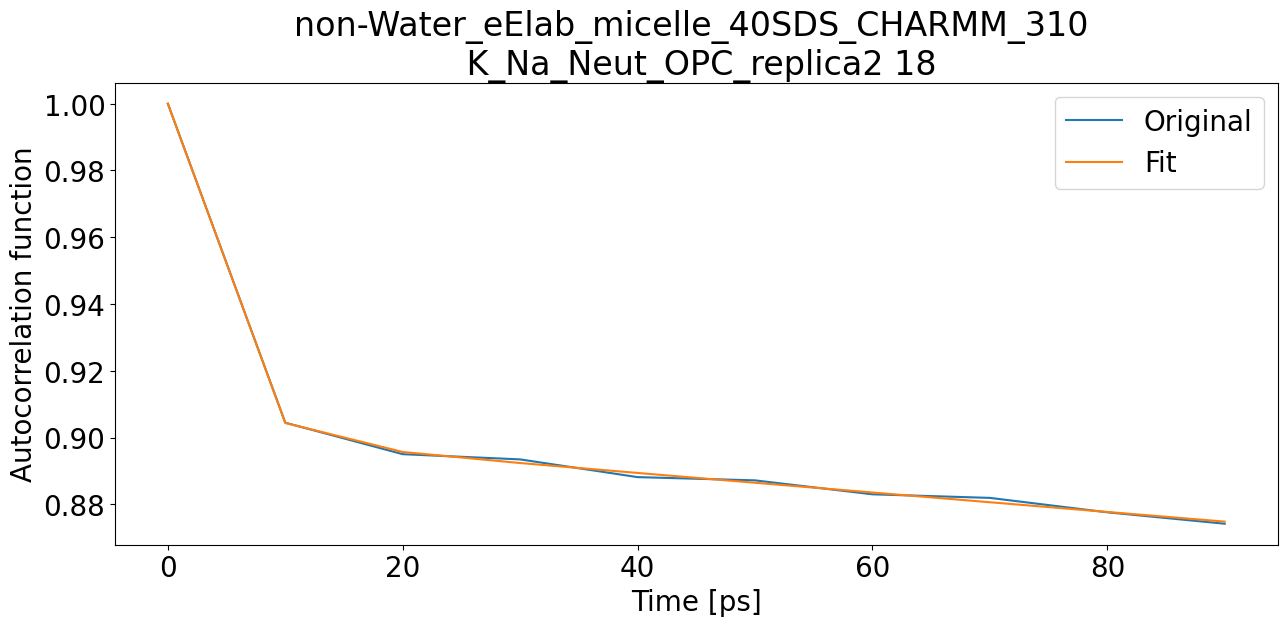

T1: 0.4963084492125979 T2: 0.16991134060237167 NOE: 0.8093188720181705
correl function should exist


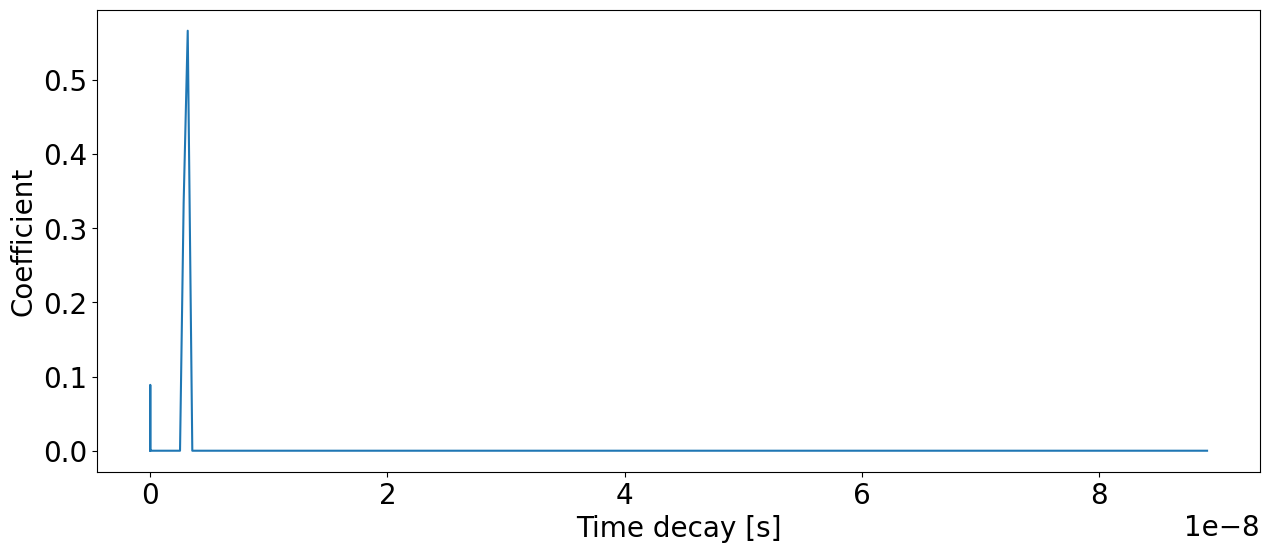

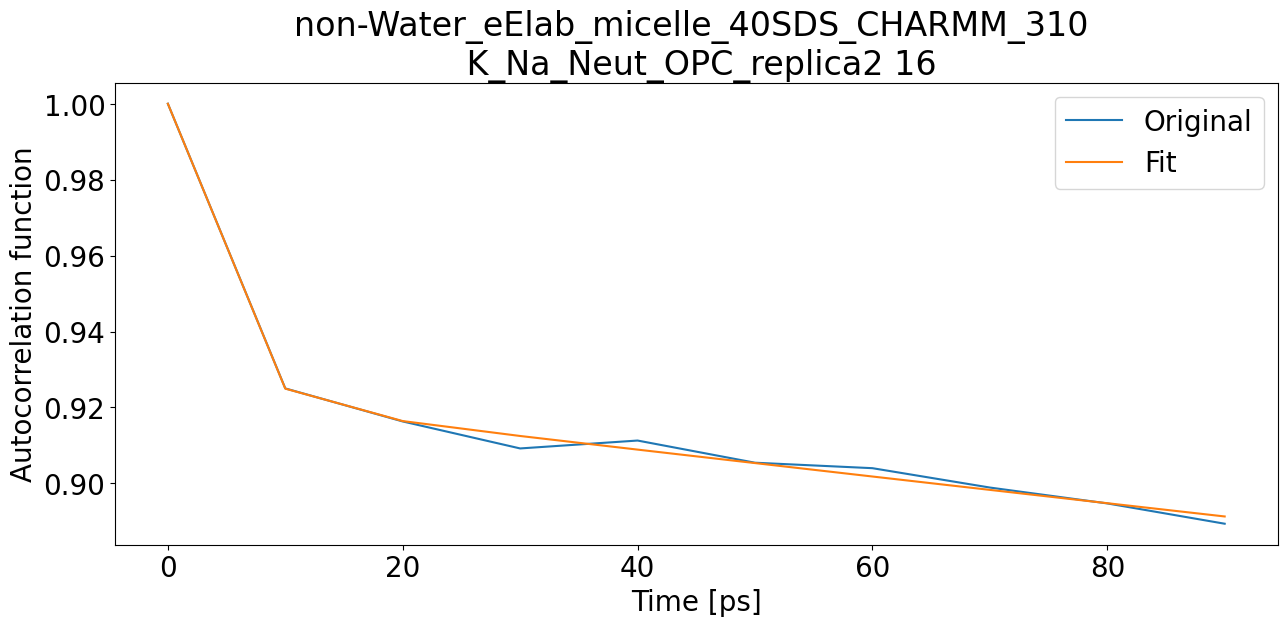

T1: 0.45244491661417585 T2: 0.18773846382746492 NOE: 0.79136266087854


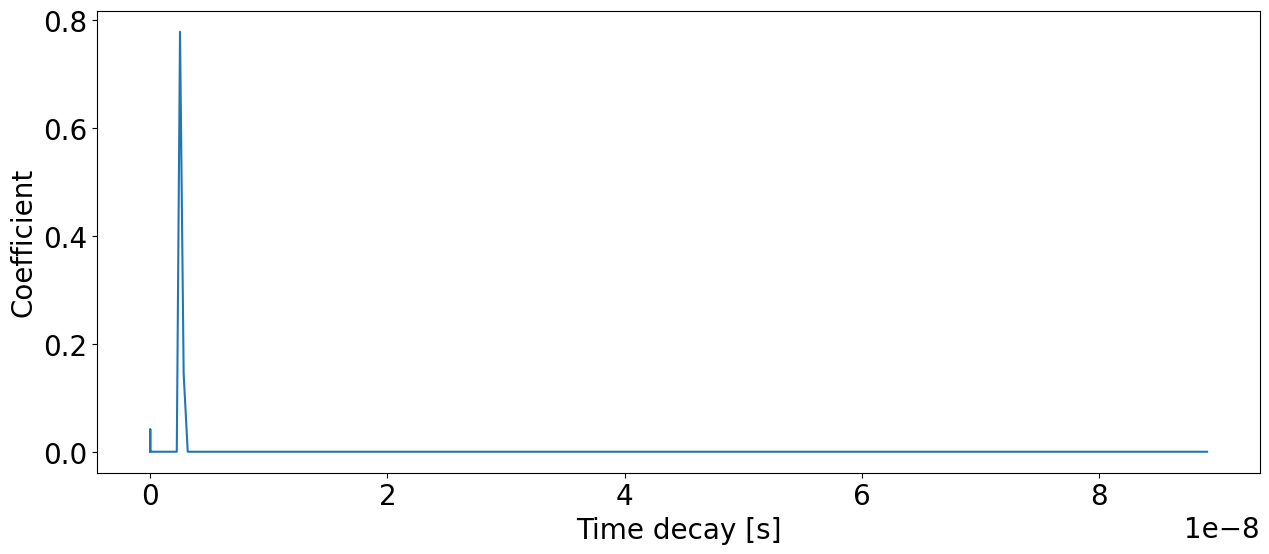

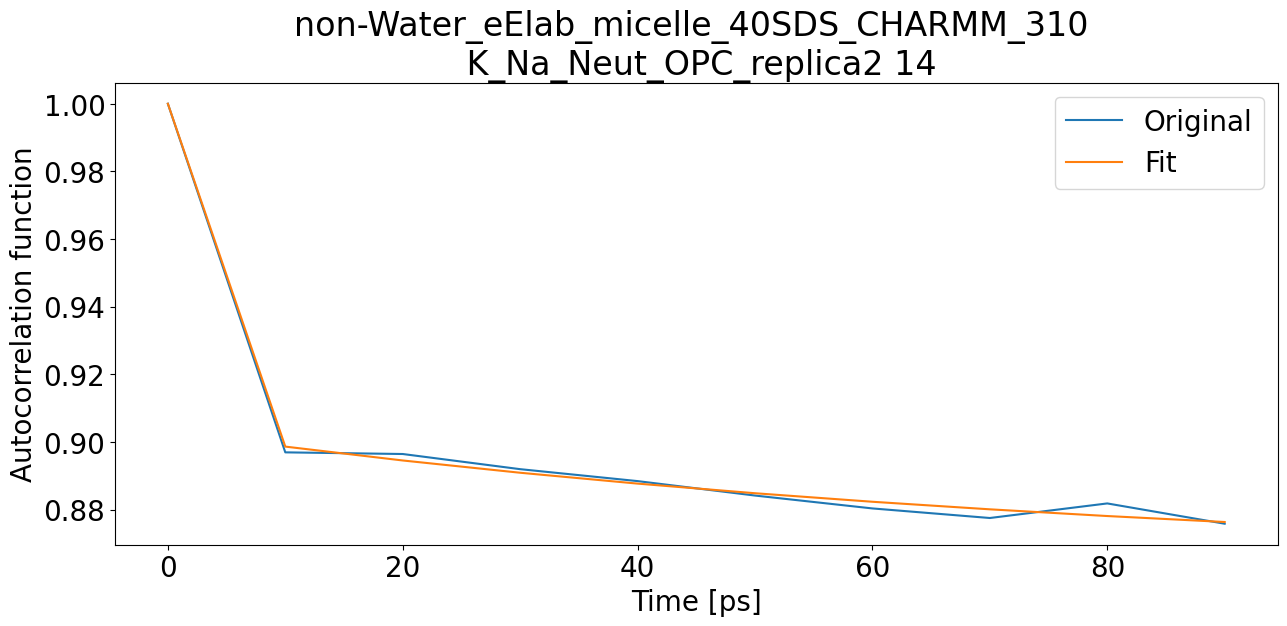

T1: 9.209896637261933 T2: 0.0072991088756858 NOE: 0.18034088275053217


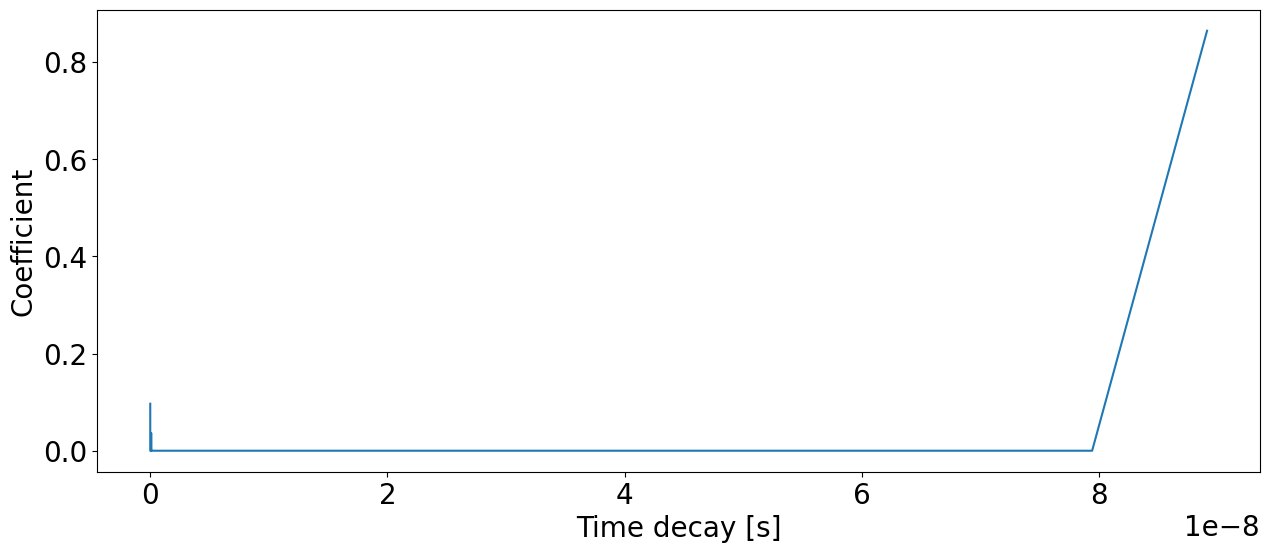

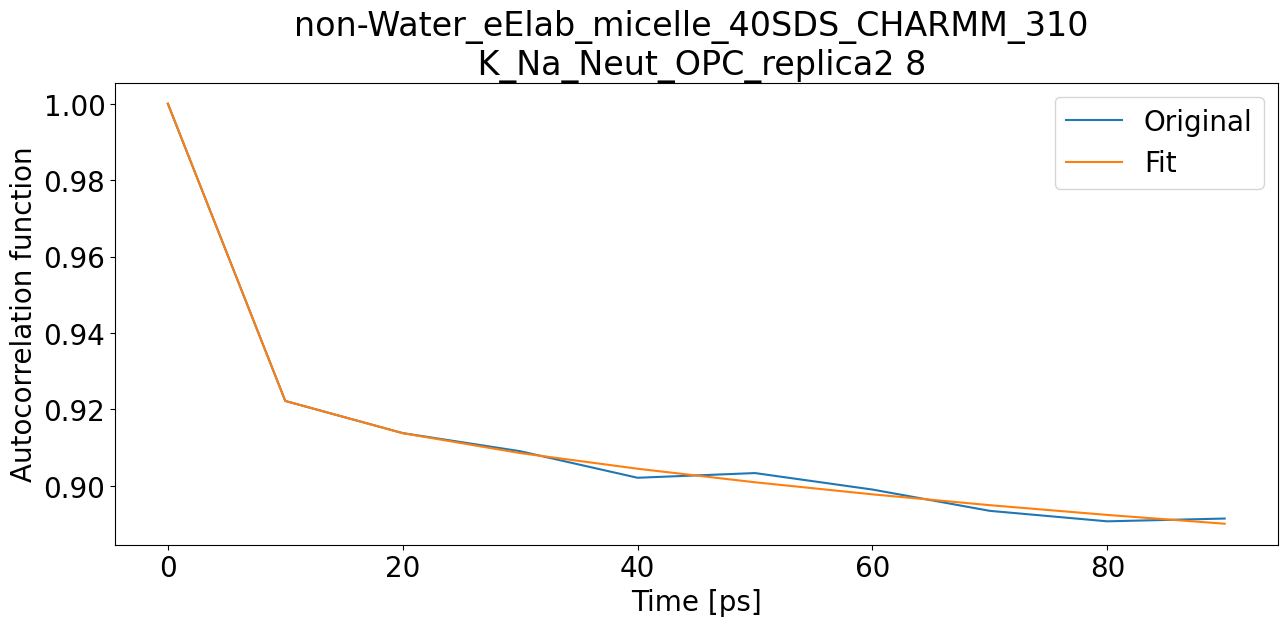

T1: 8.387128511296323 T2: 0.007241000896764103 NOE: -0.06772982869982158


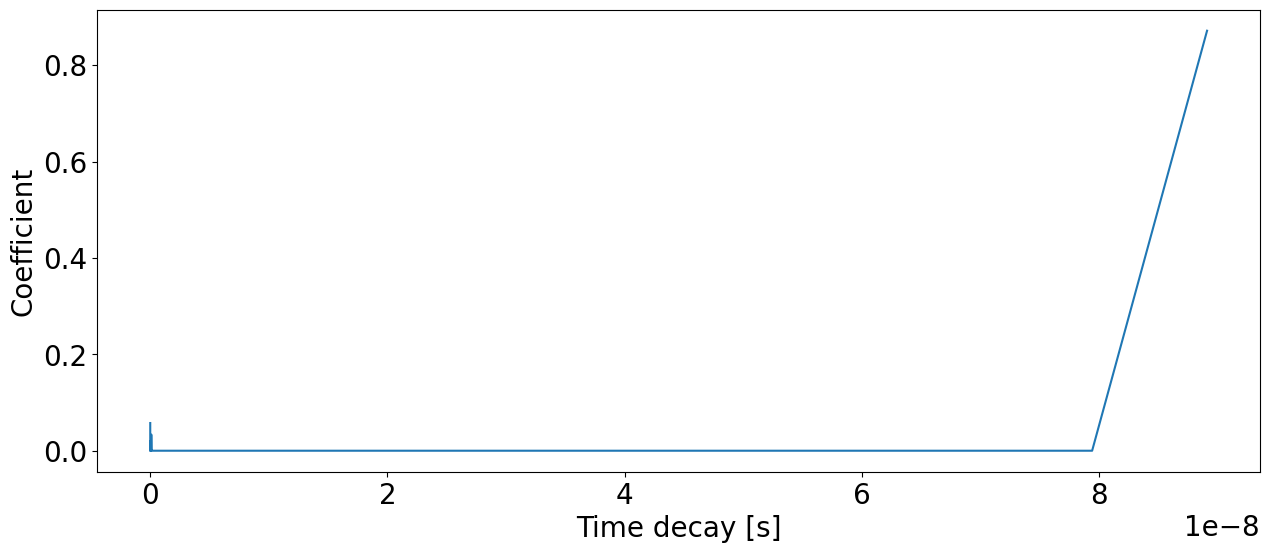

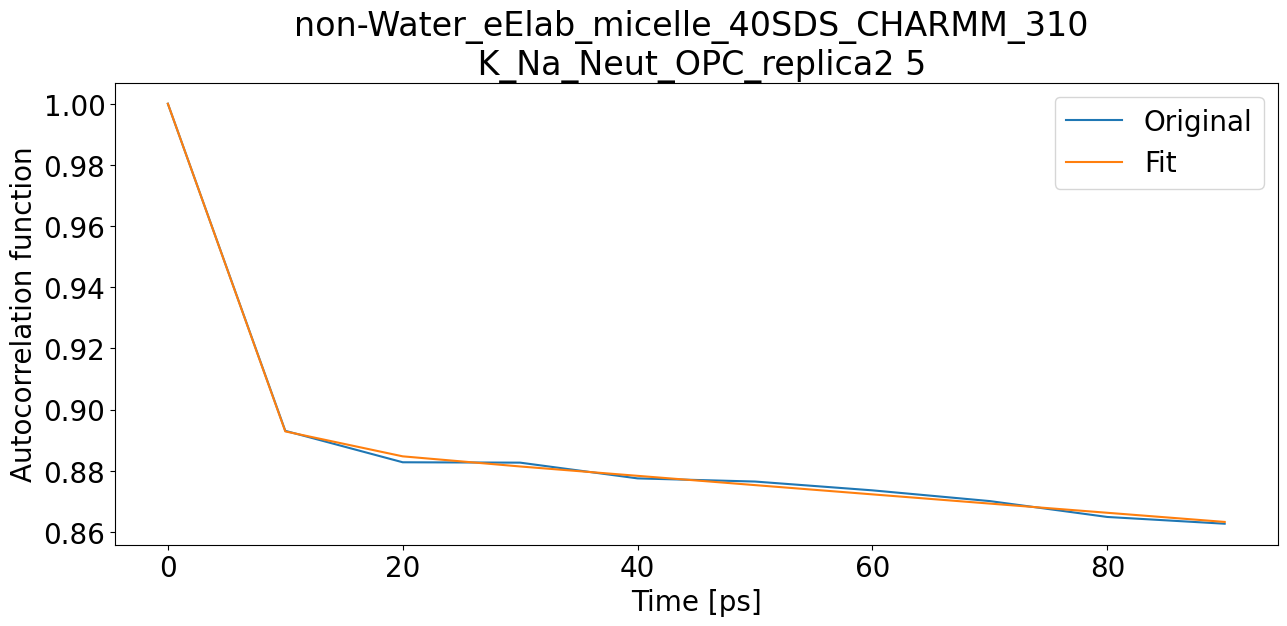

T1: 0.49163047764056633 T2: 0.17799245741763434 NOE: 0.8046926612586522


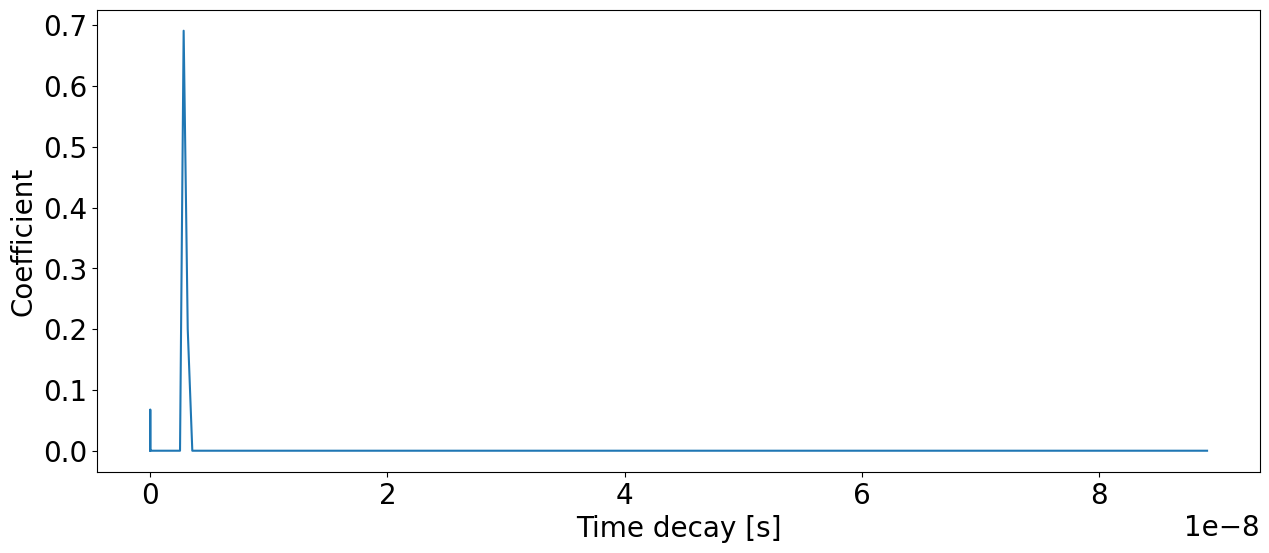

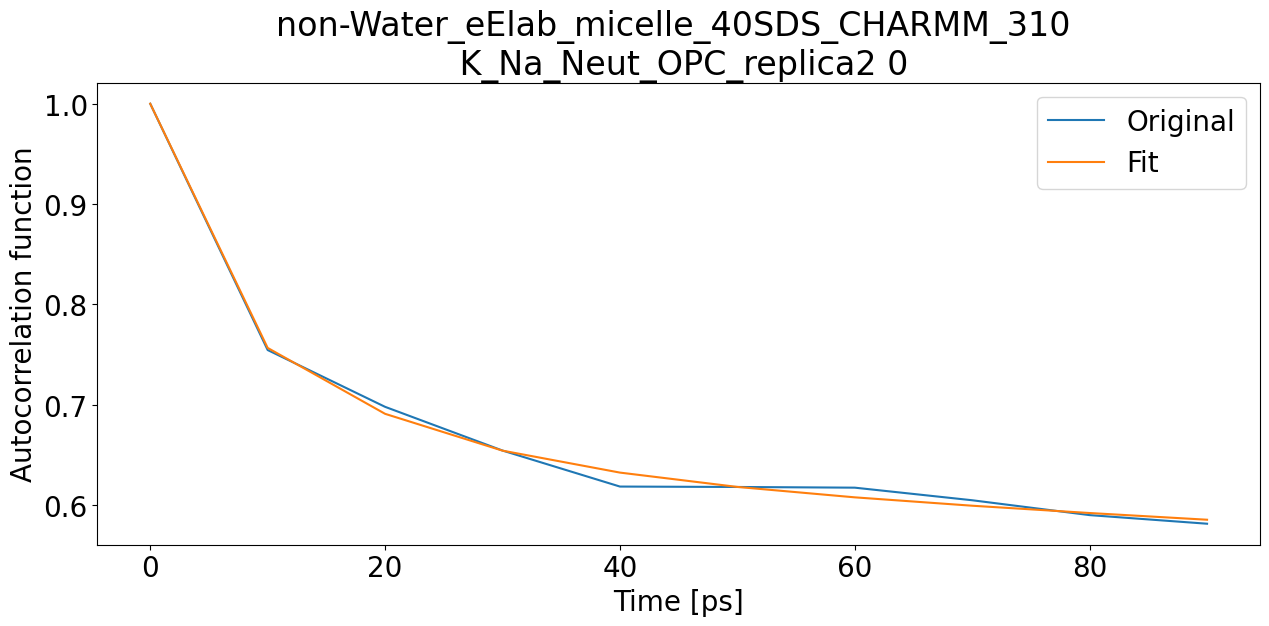

T1: 0.7053037308106452 T2: 0.5392212688963121 NOE: 0.36019845104187453


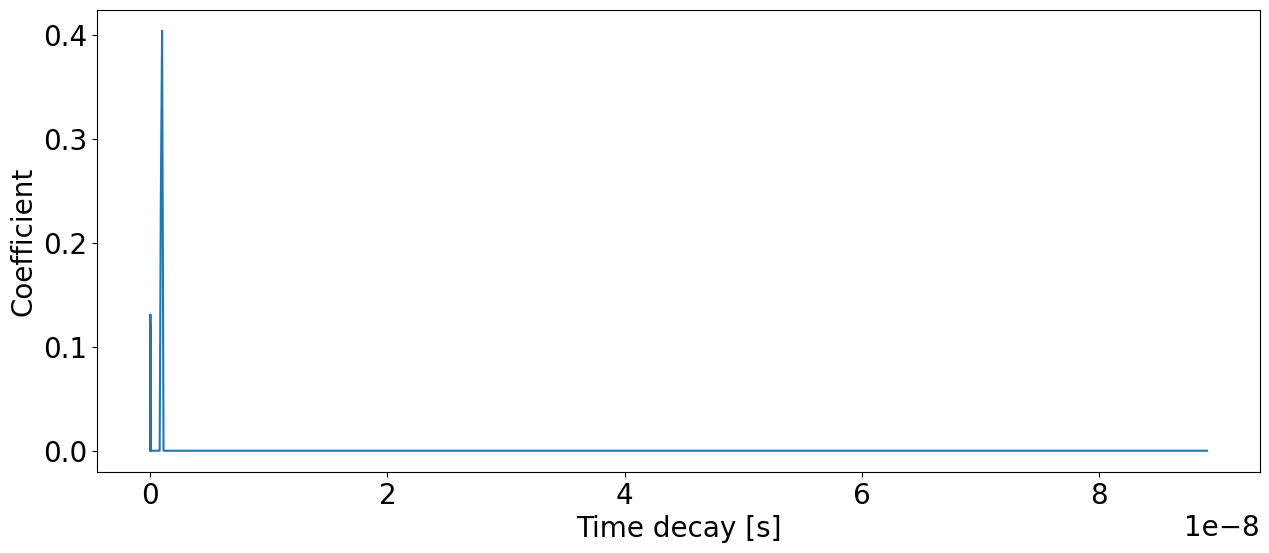

In [4]:
"""Analyze one system - the whole content of a folder"""
aminoAcids=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_path_relax,output_path_timescales,output_name=None)

Option 3 - analyze different systems in a given parent_folder_path

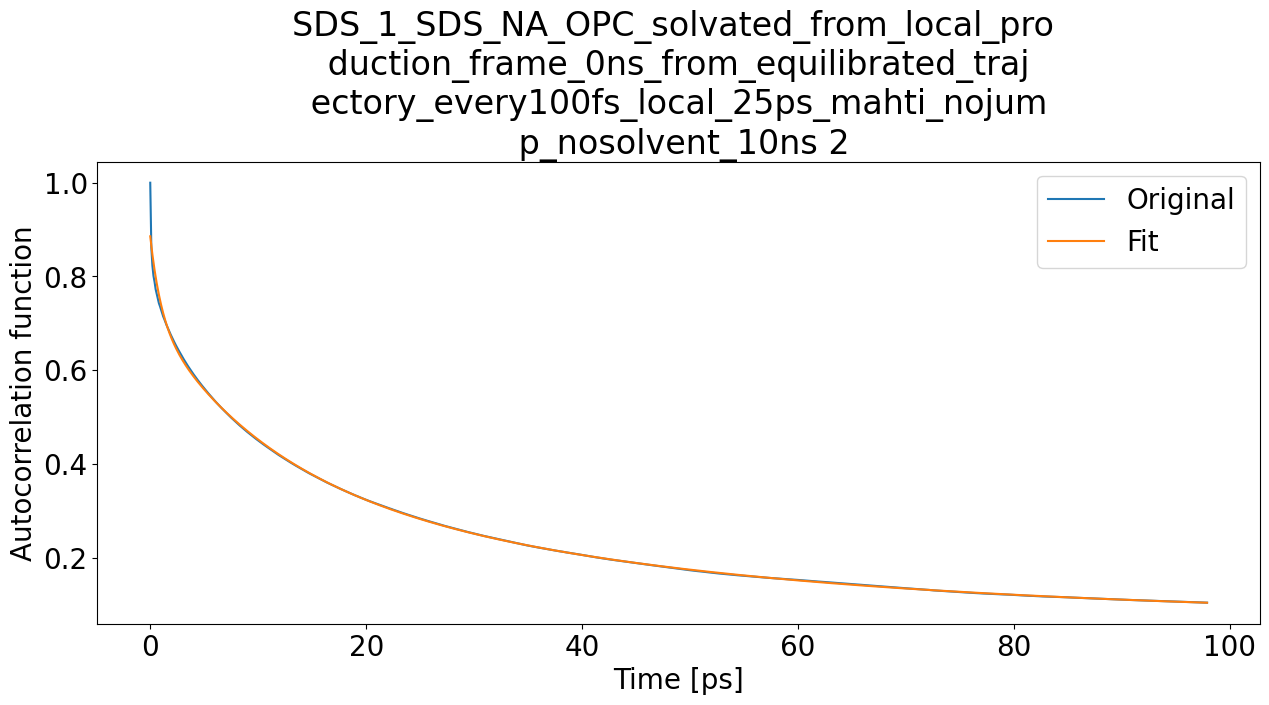

T1: 3.3043153792455753 T2: 1.9592030033652978 NOE: -0.610534095977179


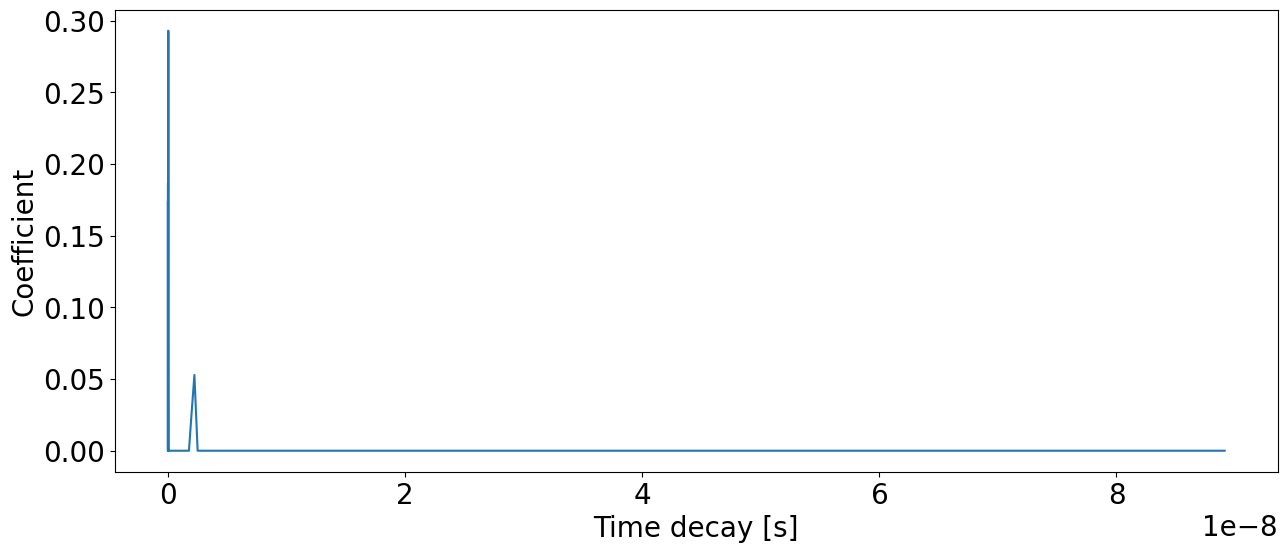

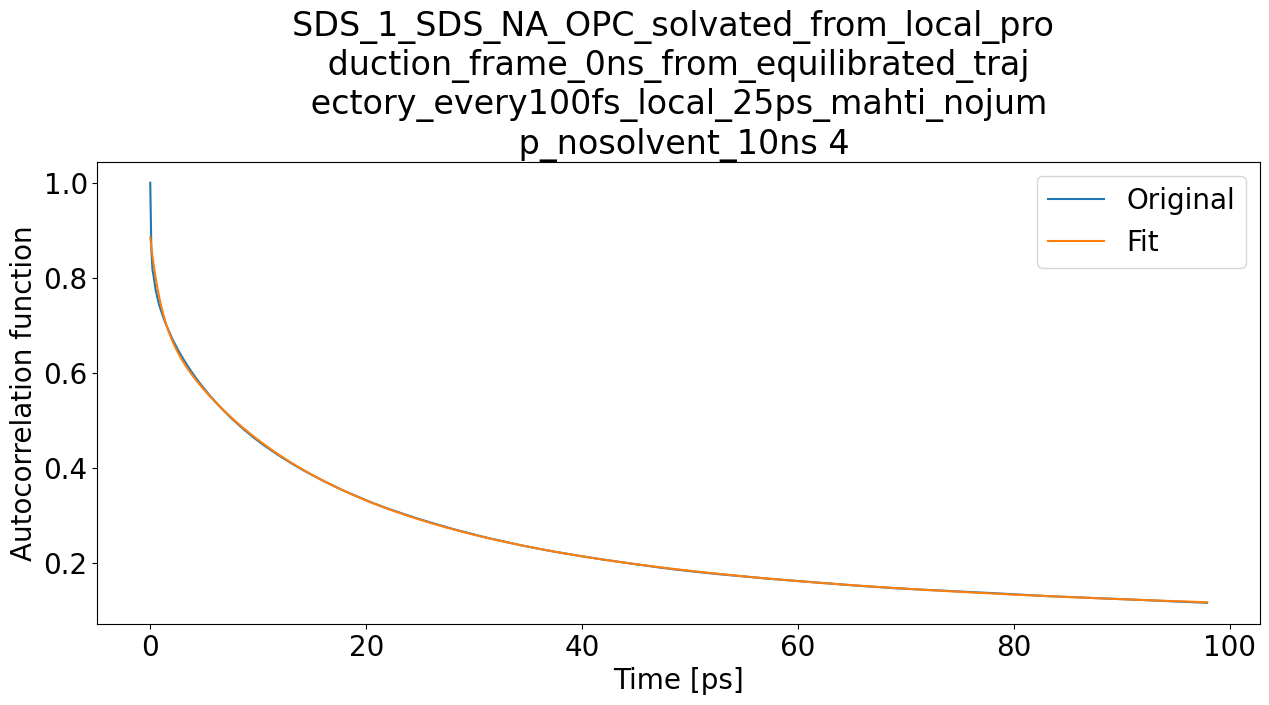

T1: 4.241412850161096 T2: 4.029603608283532 NOE: -2.3377188252795174


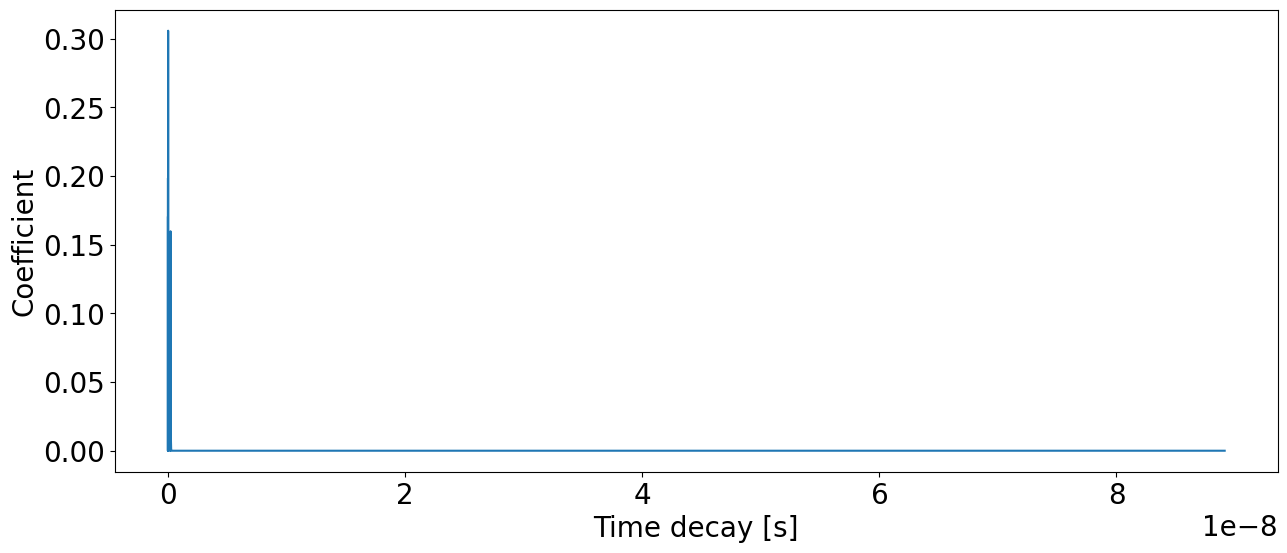

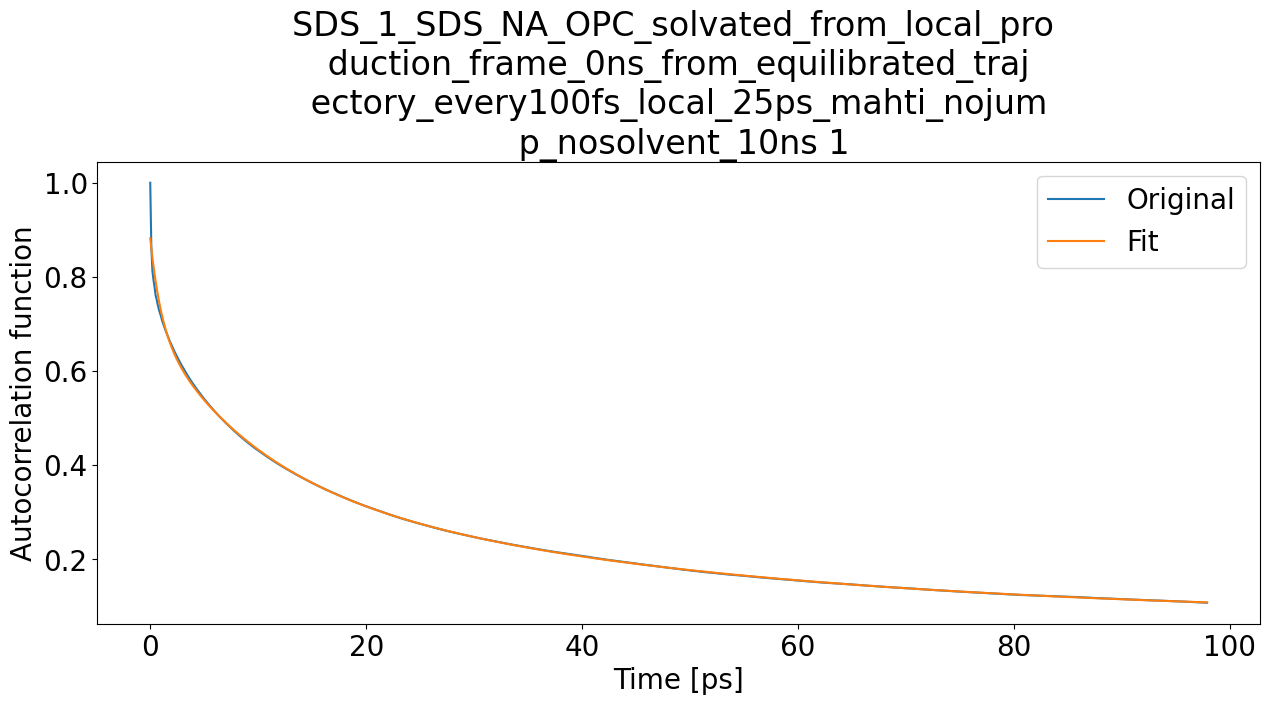

T1: 8.705257976553646 T2: 0.08189434129272496 NOE: -2.8549742870875843


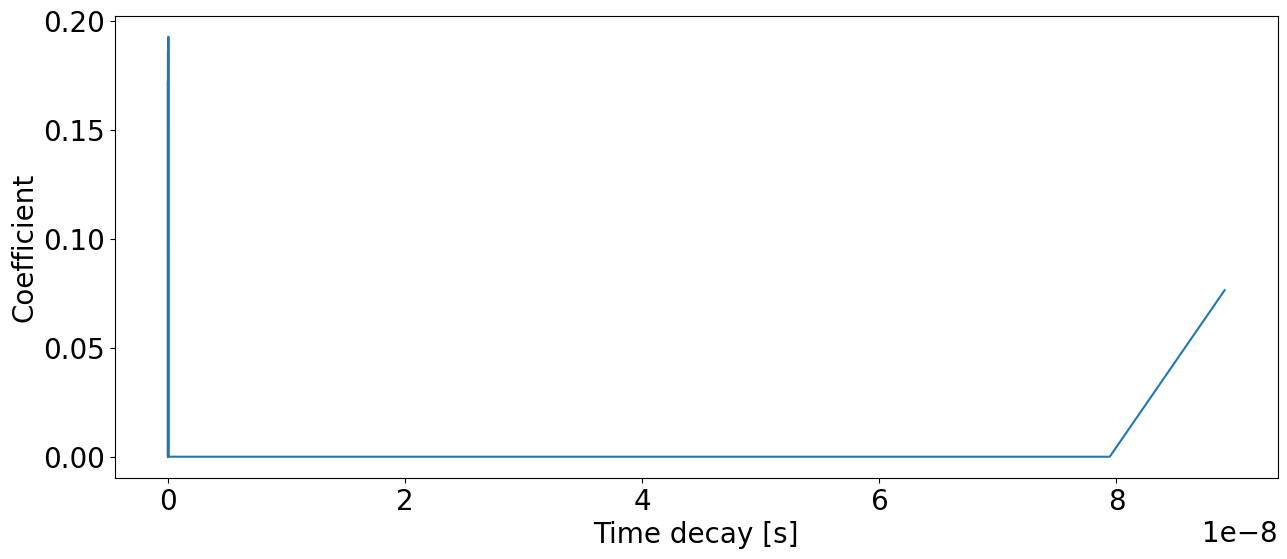

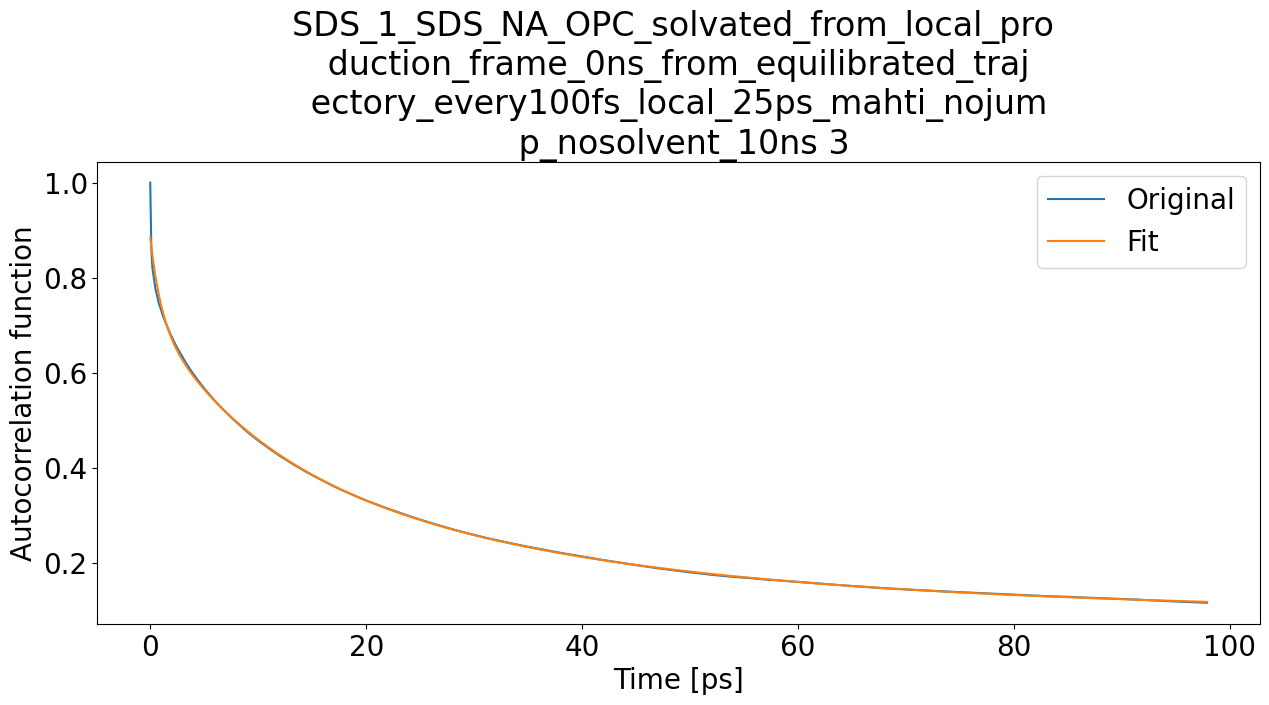

T1: 3.773201680518475 T2: 3.4436178410909086 NOE: -1.491947034781222


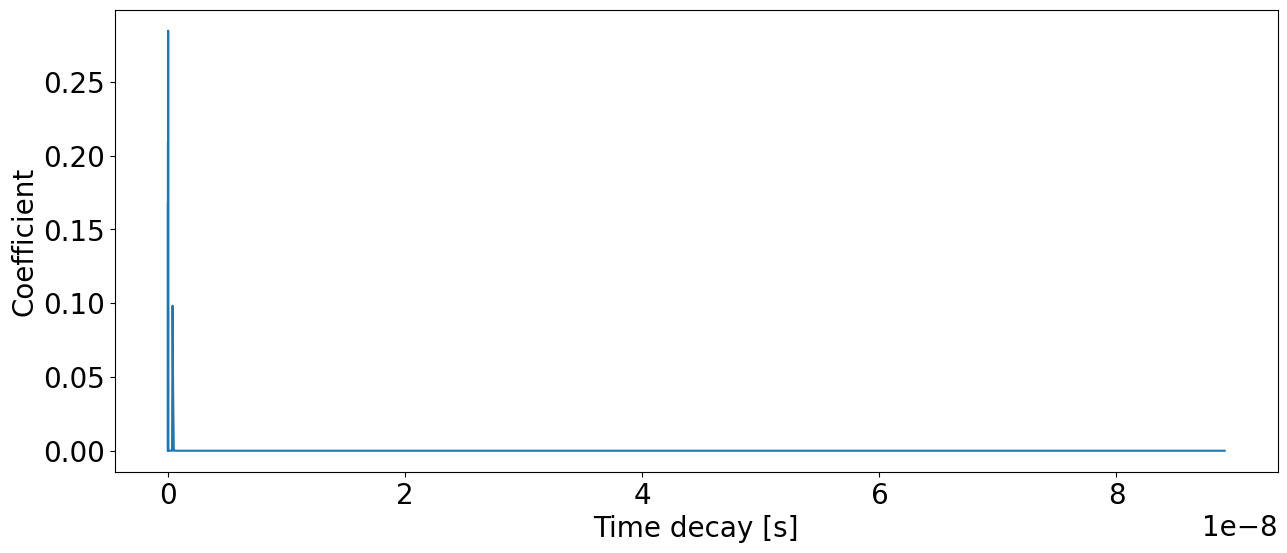

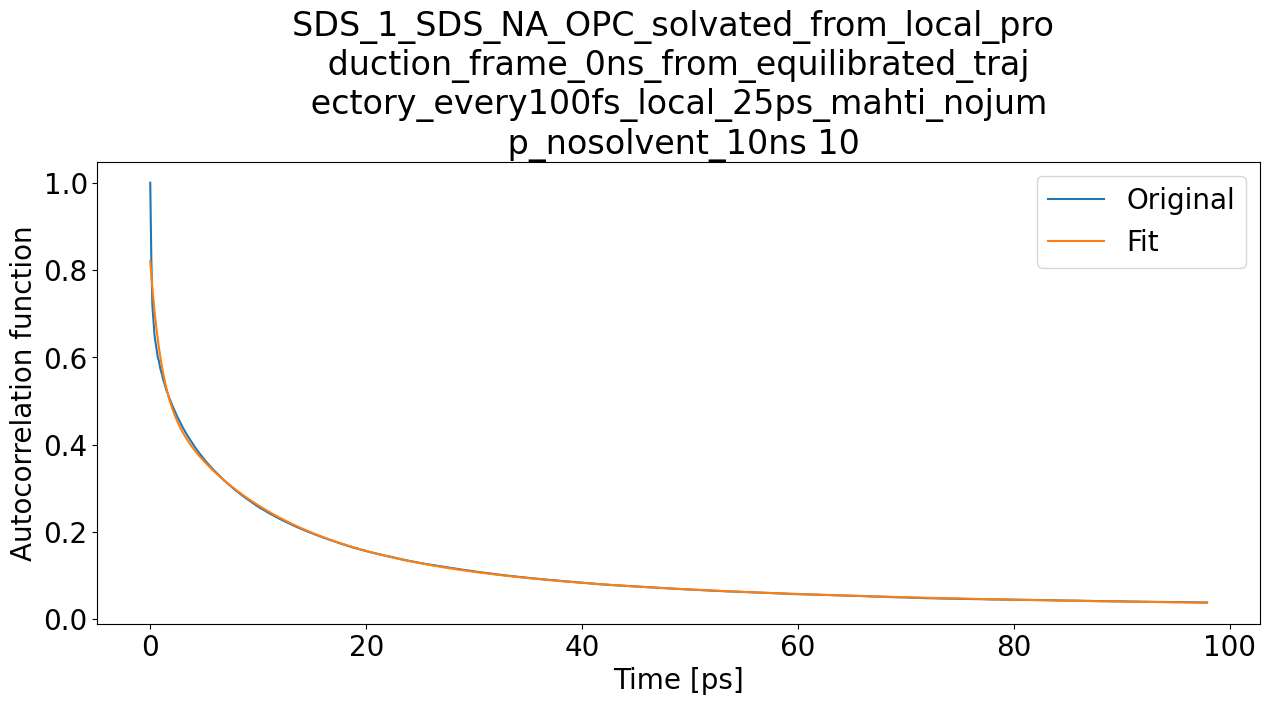

T1: 15.90403701547586 T2: 0.24237534009966283 NOE: -2.9743059677462744


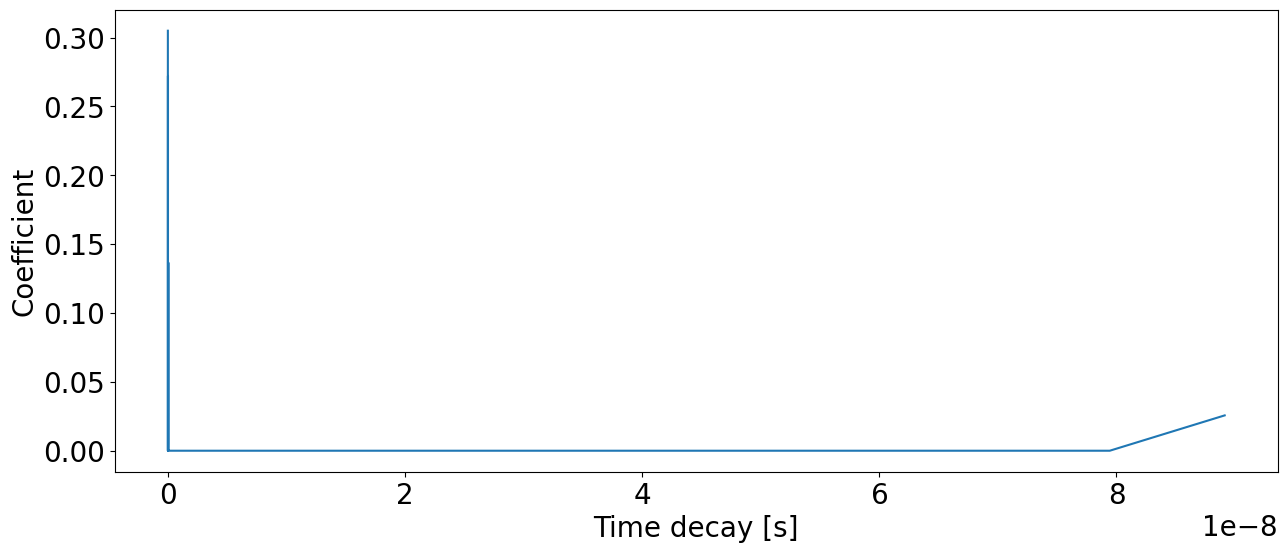

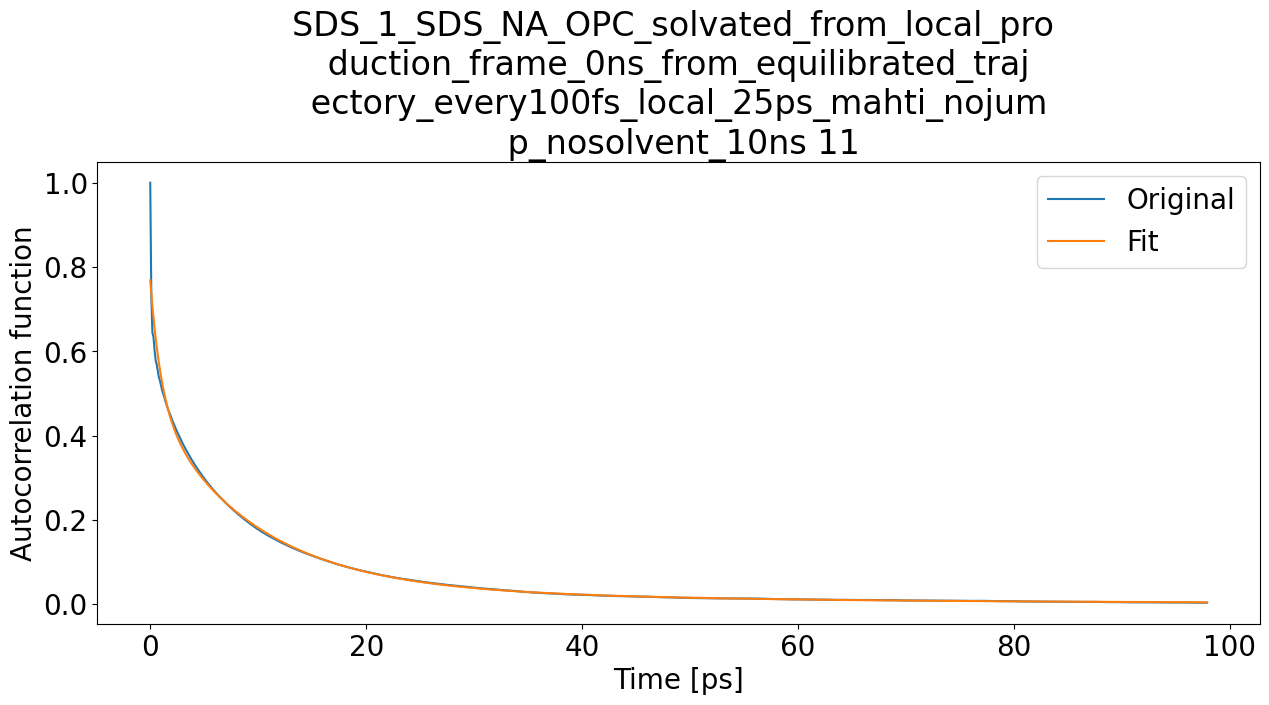

T1: 25.070570087321126 T2: 24.43767095916442 NOE: -3.1529886888395113


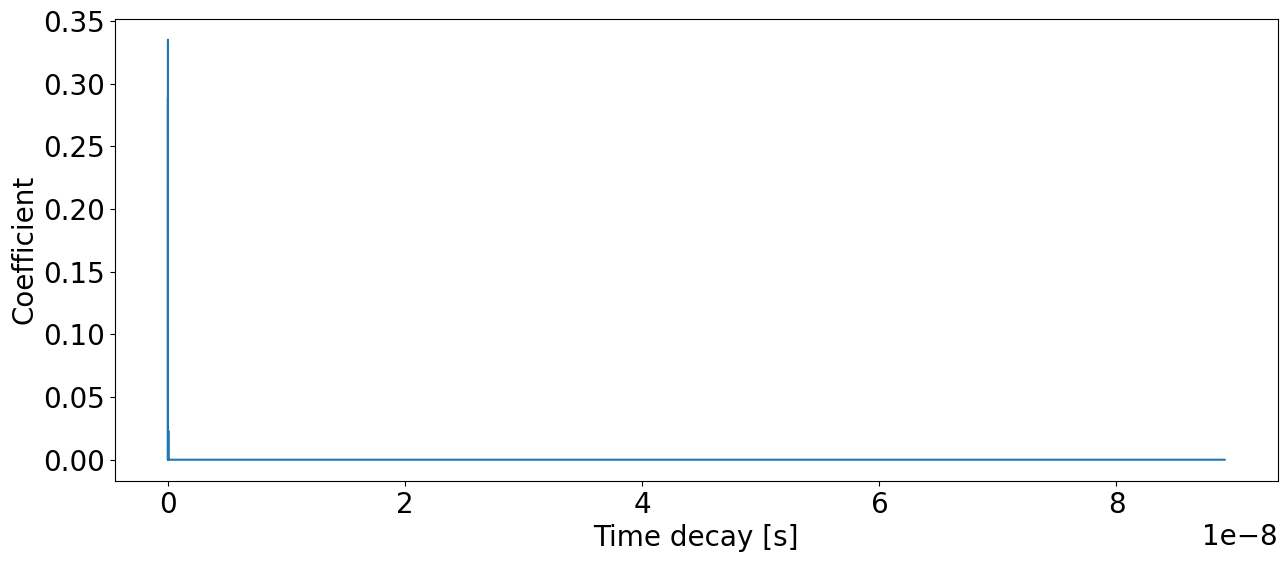

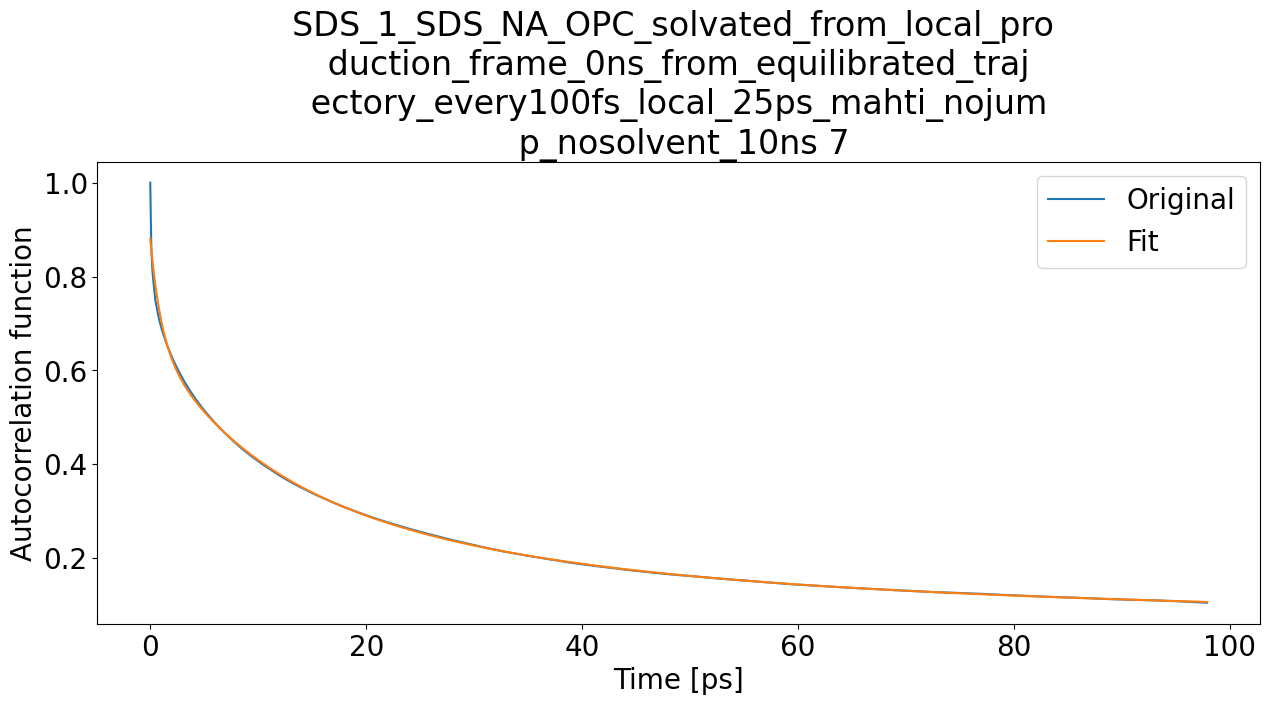

T1: 4.656282801443662 T2: 4.40392385390304 NOE: -2.222451996079049


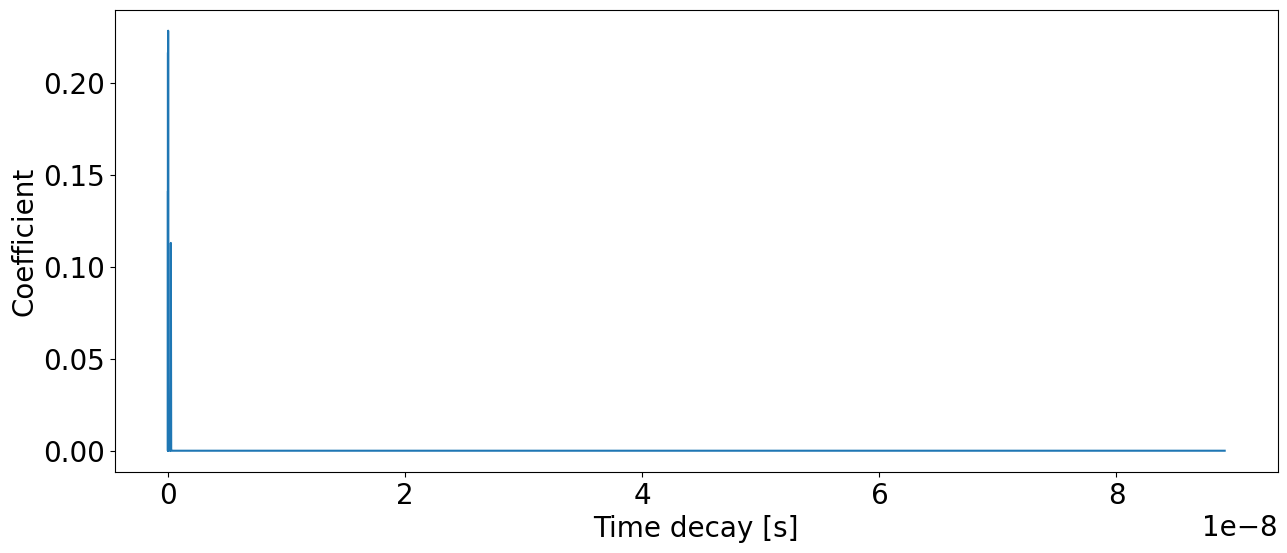

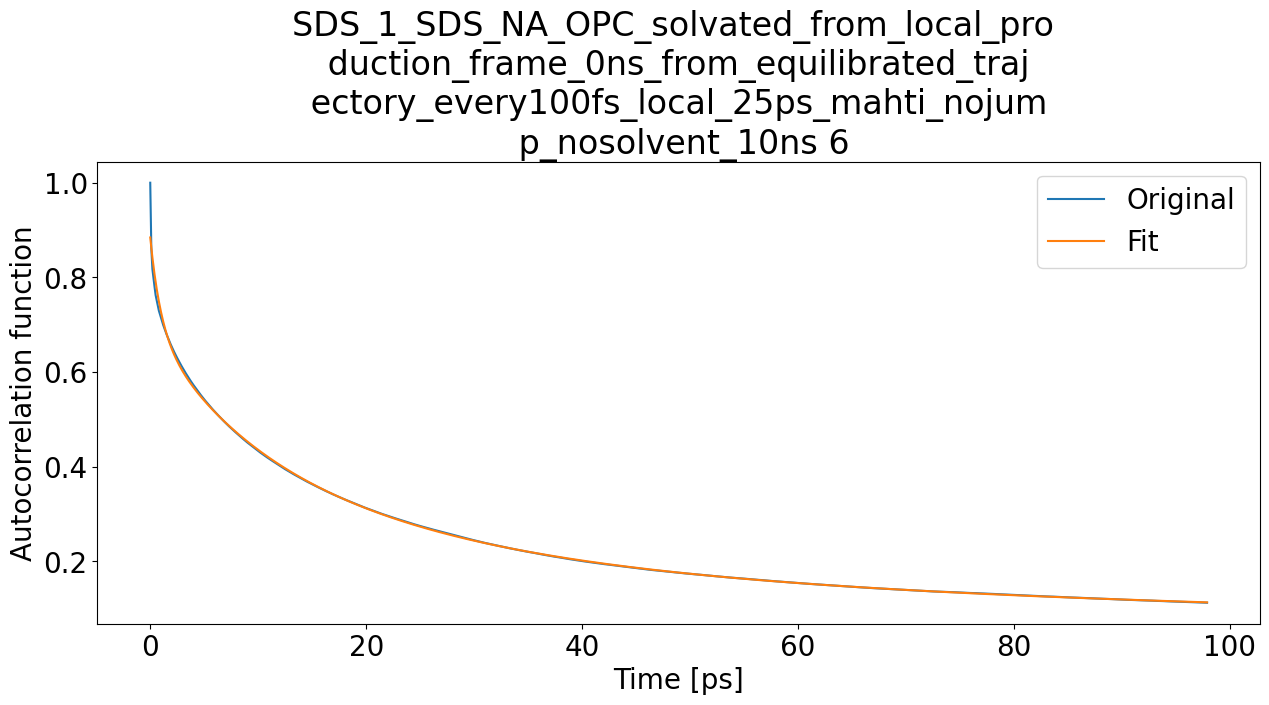

T1: 4.456090117140669 T2: 4.245785707920609 NOE: -2.4102591451022968


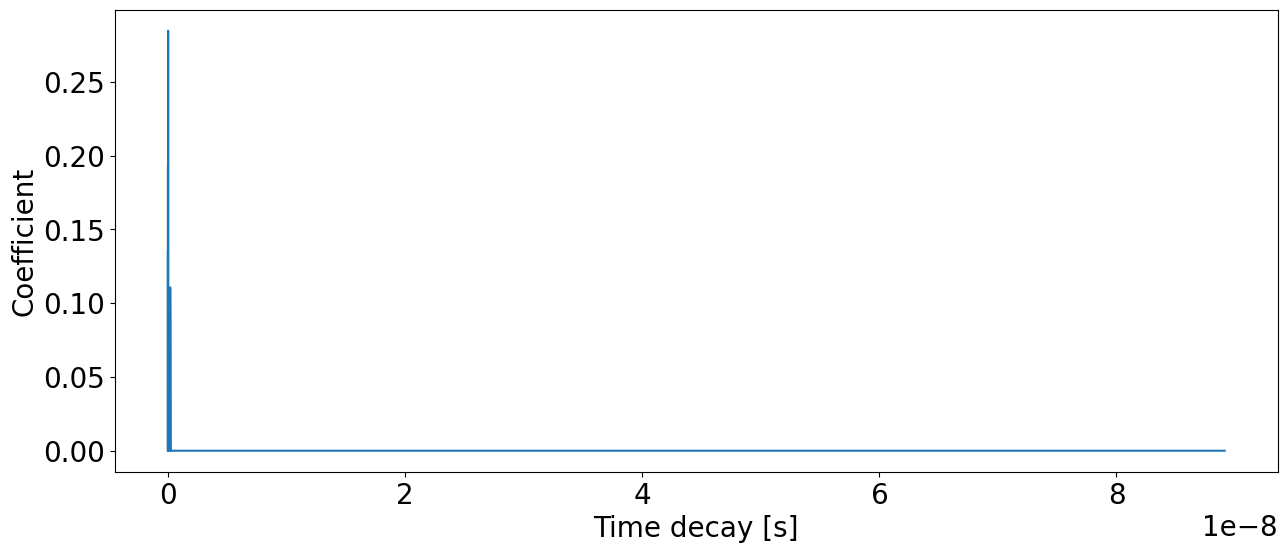

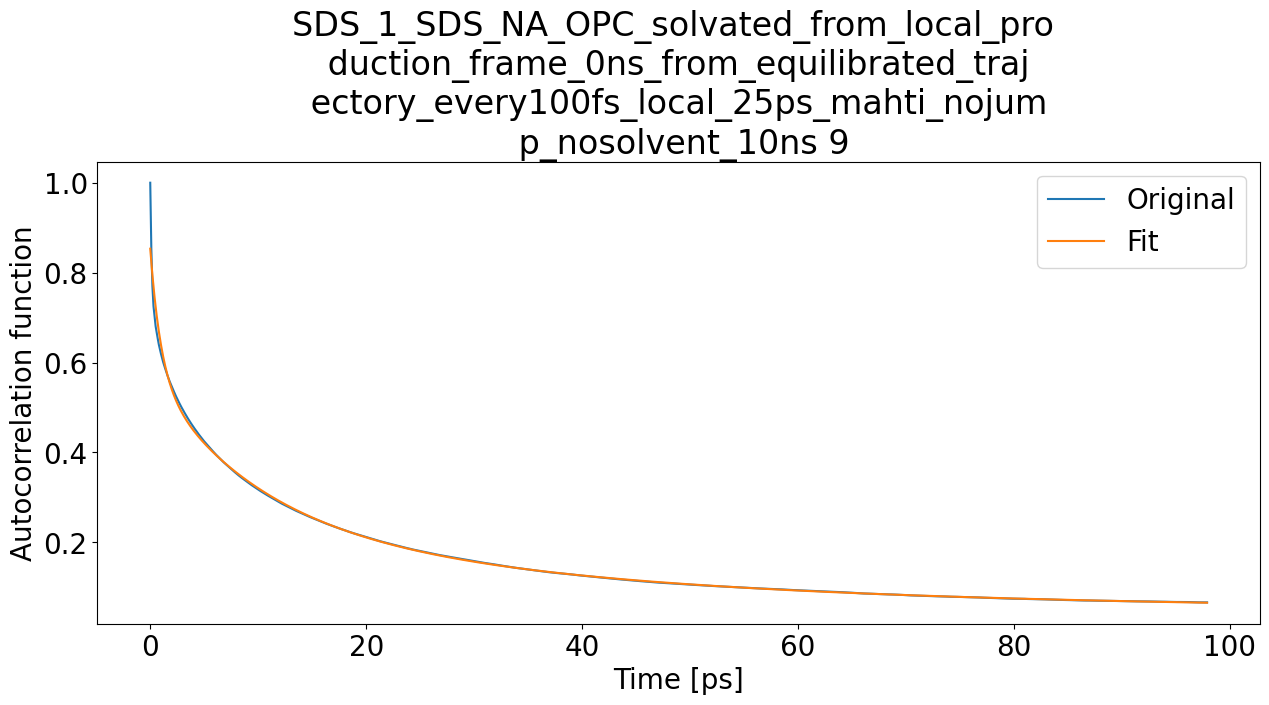

T1: 12.955877571725422 T2: 0.12597430923118258 NOE: -2.874743546920184
correl function should exist


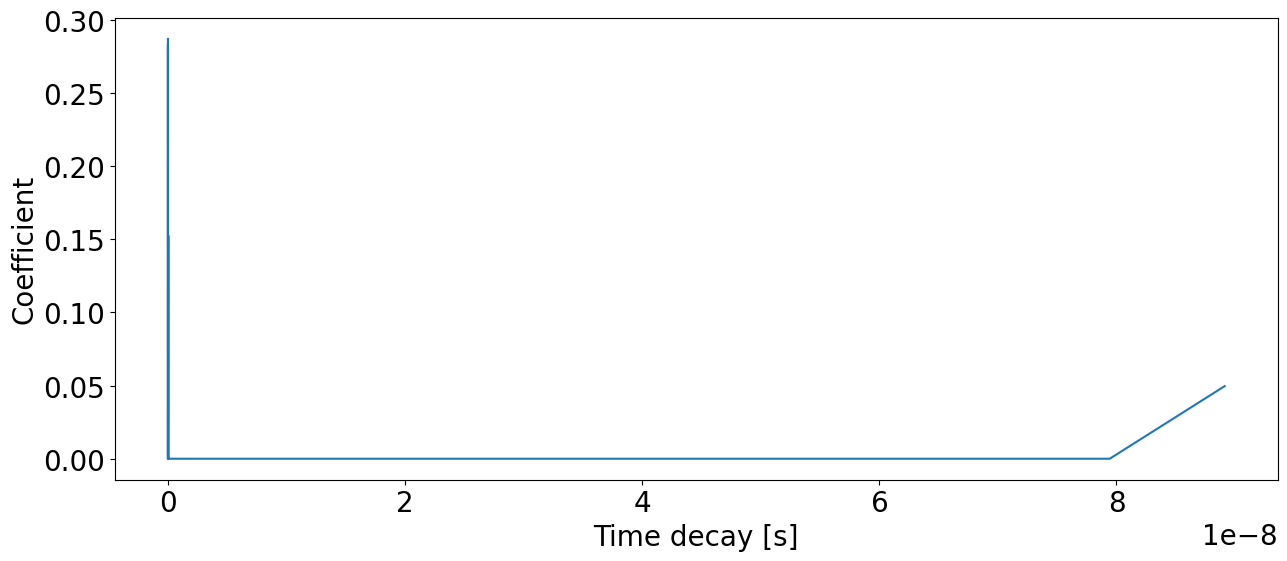

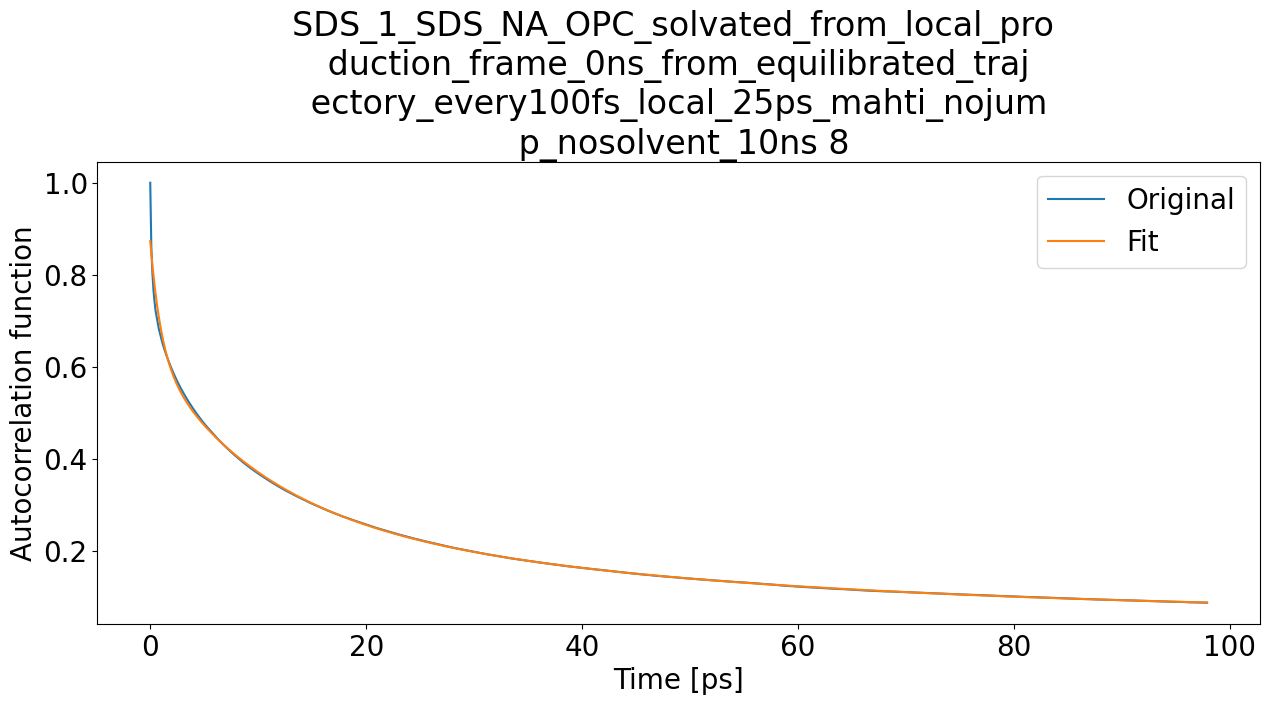

T1: 10.57324060834024 T2: 0.09853388072640674 NOE: -2.8548448116734058


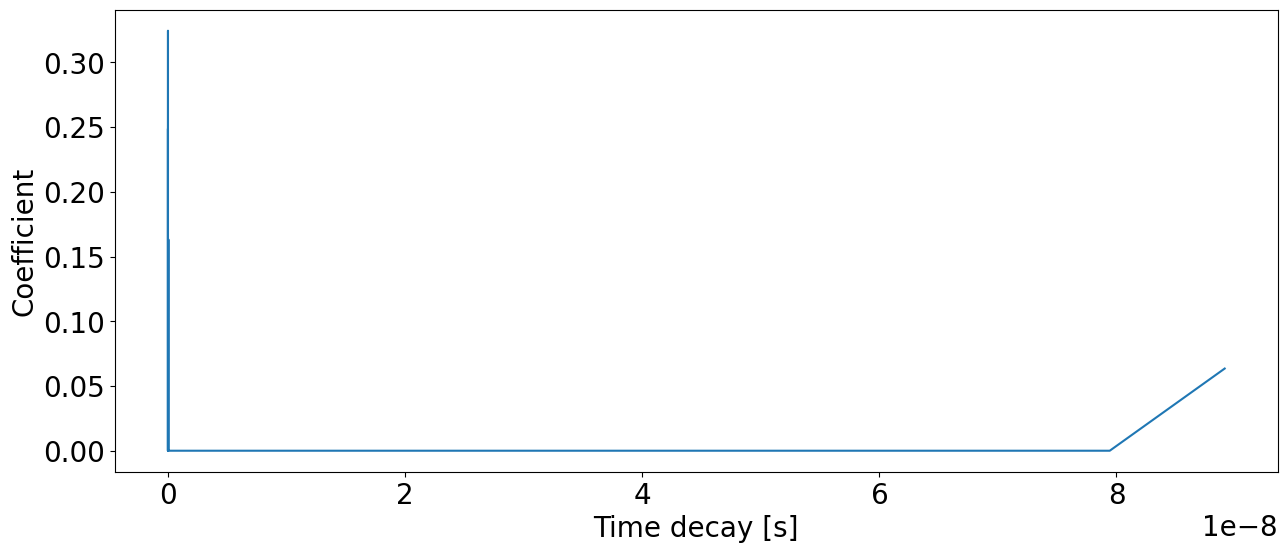

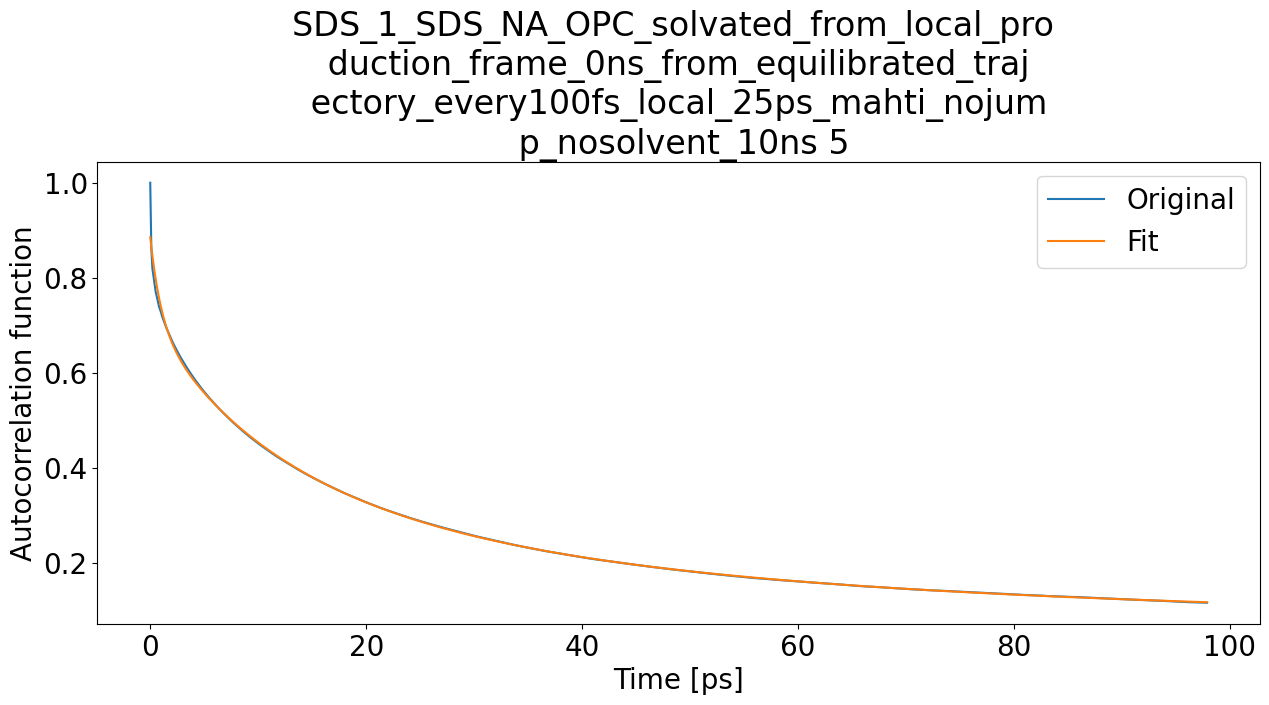

T1: 4.261497438287746 T2: 4.049717888286554 NOE: -2.3429123861775336


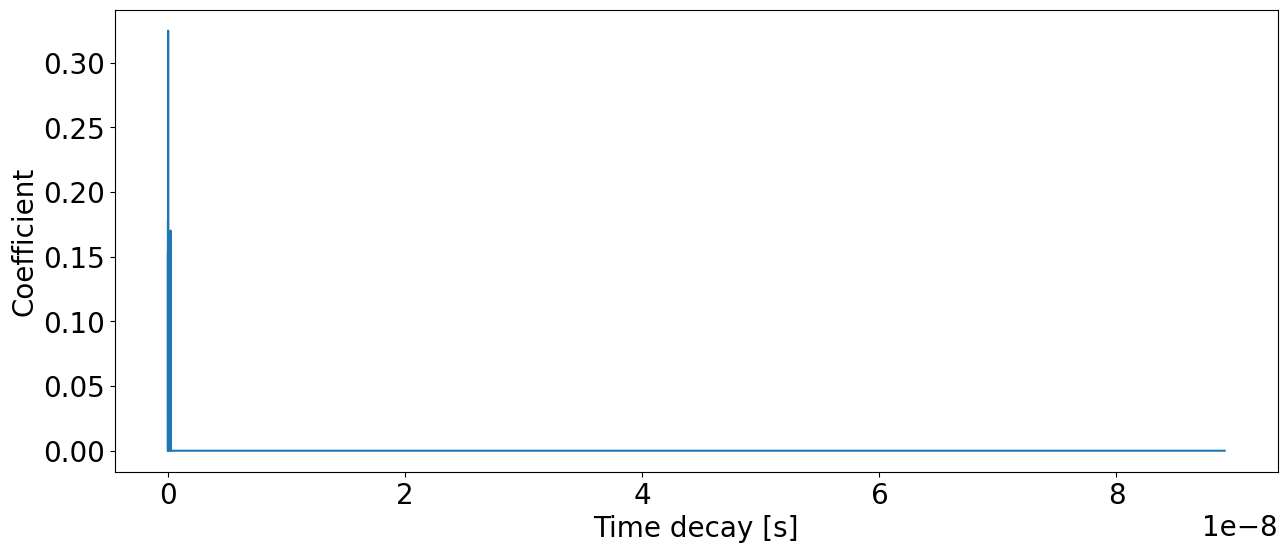

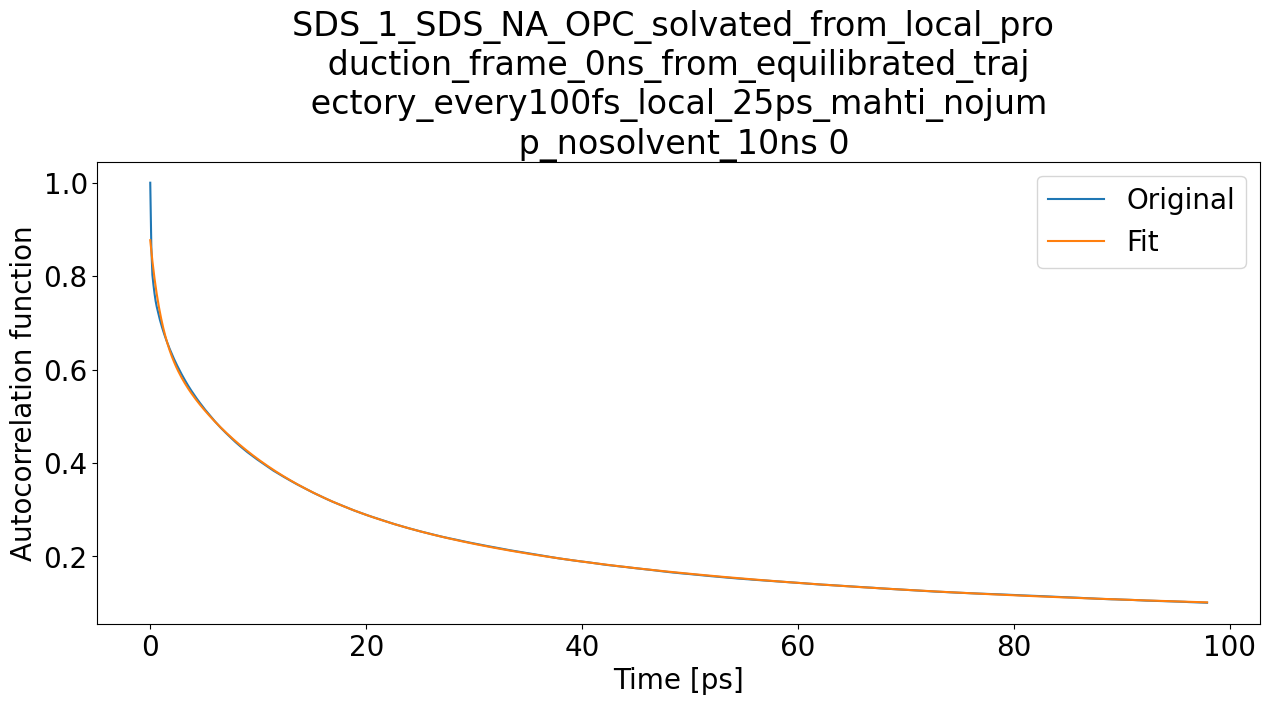

T1: 3.9321388476100387 T2: 1.5531137985139347 NOE: -0.6920281661090759


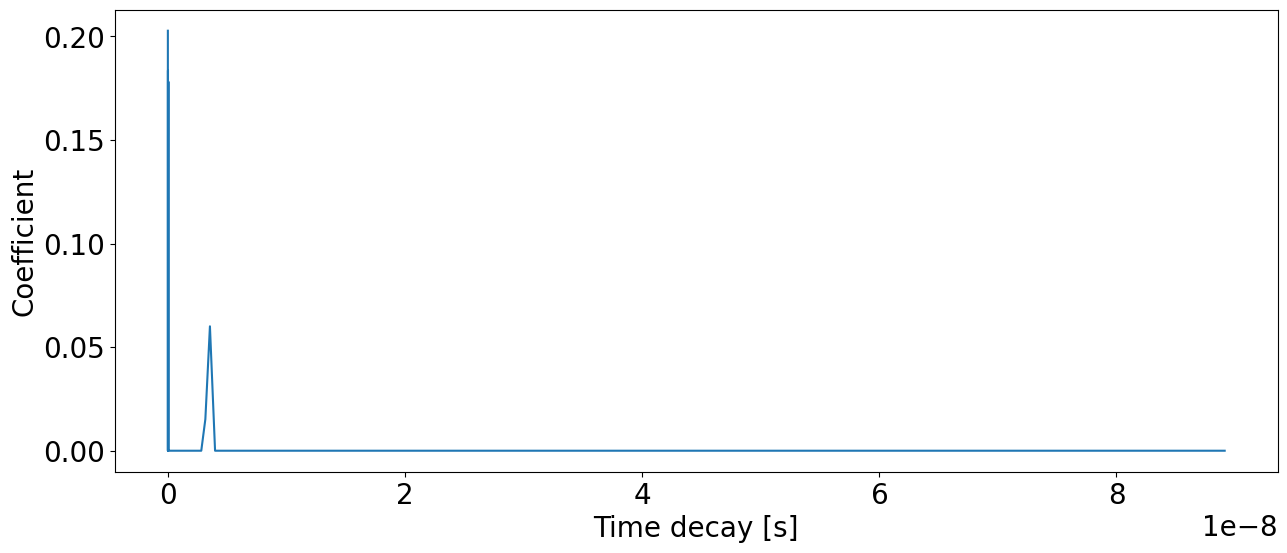

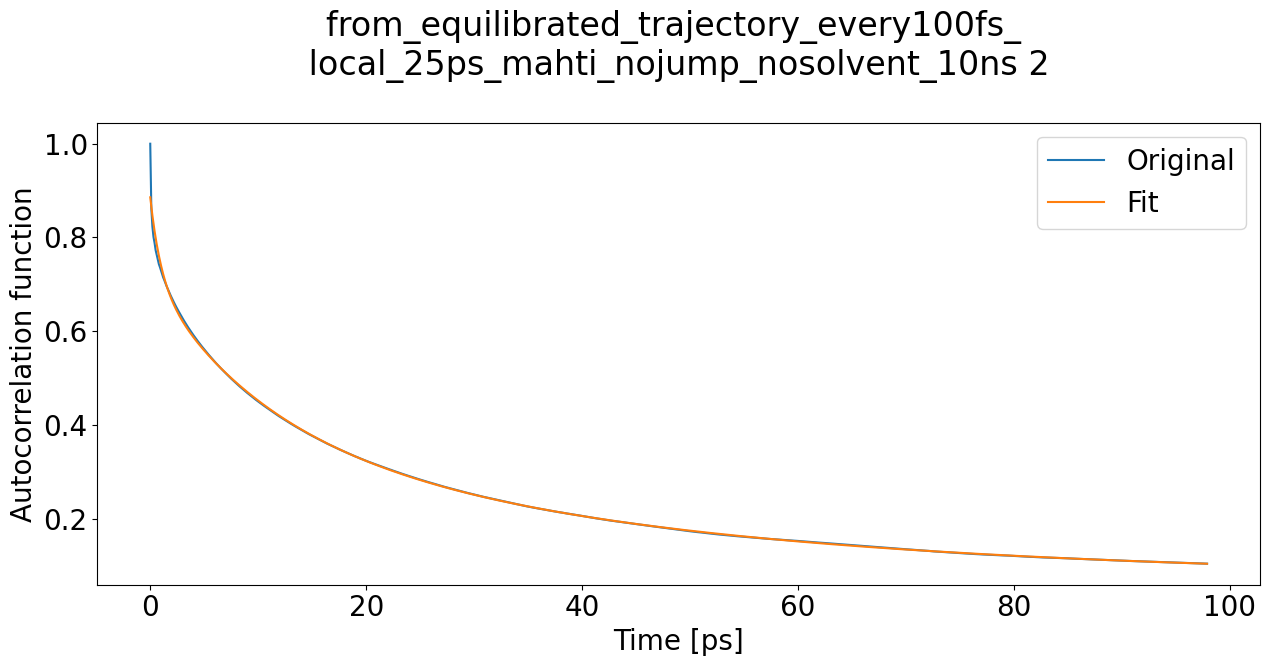

T1: 3.3043153792455753 T2: 1.9592030033652978 NOE: -0.610534095977179


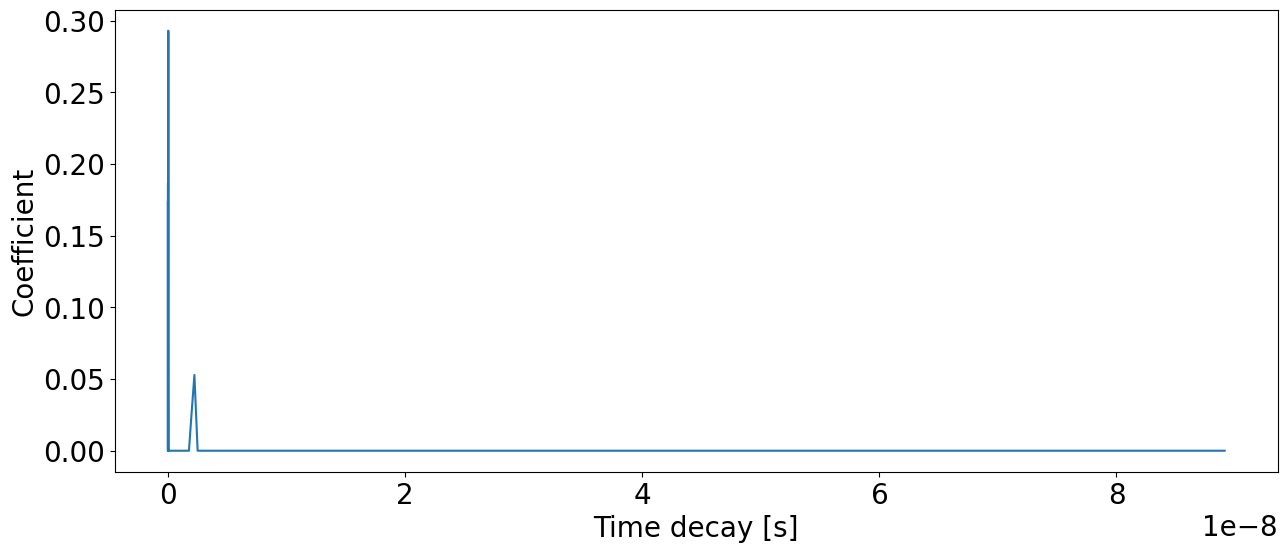

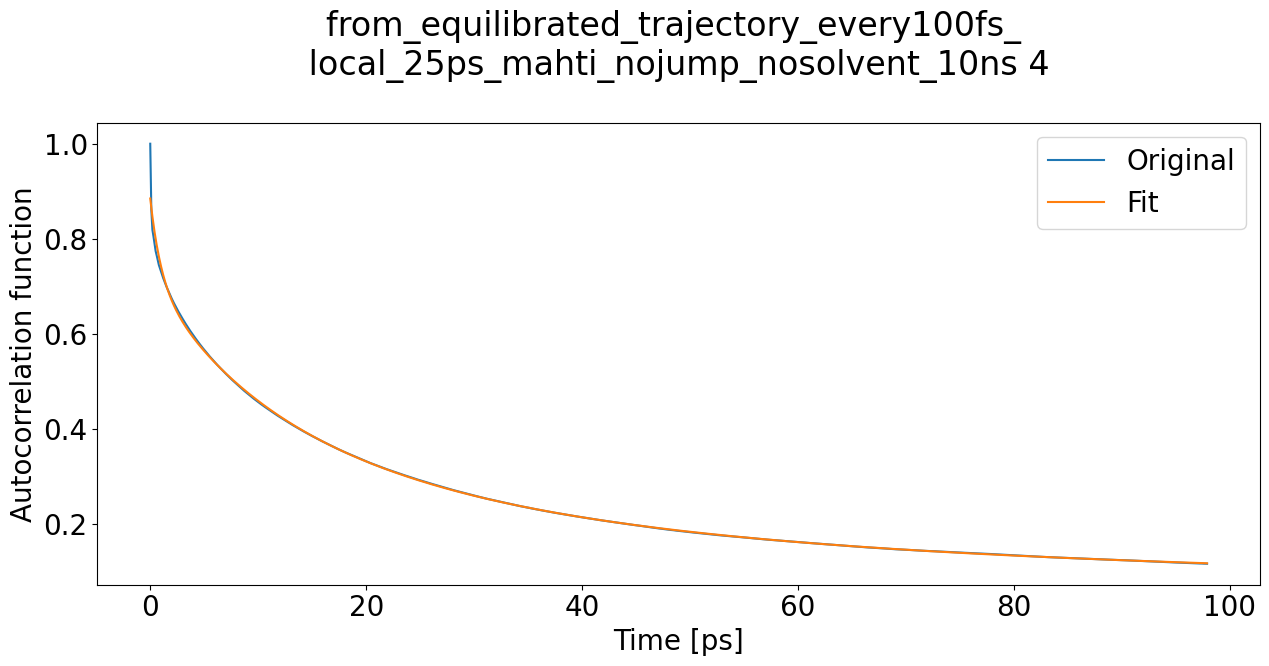

T1: 4.241412850161096 T2: 4.029603608283532 NOE: -2.3377188252795174


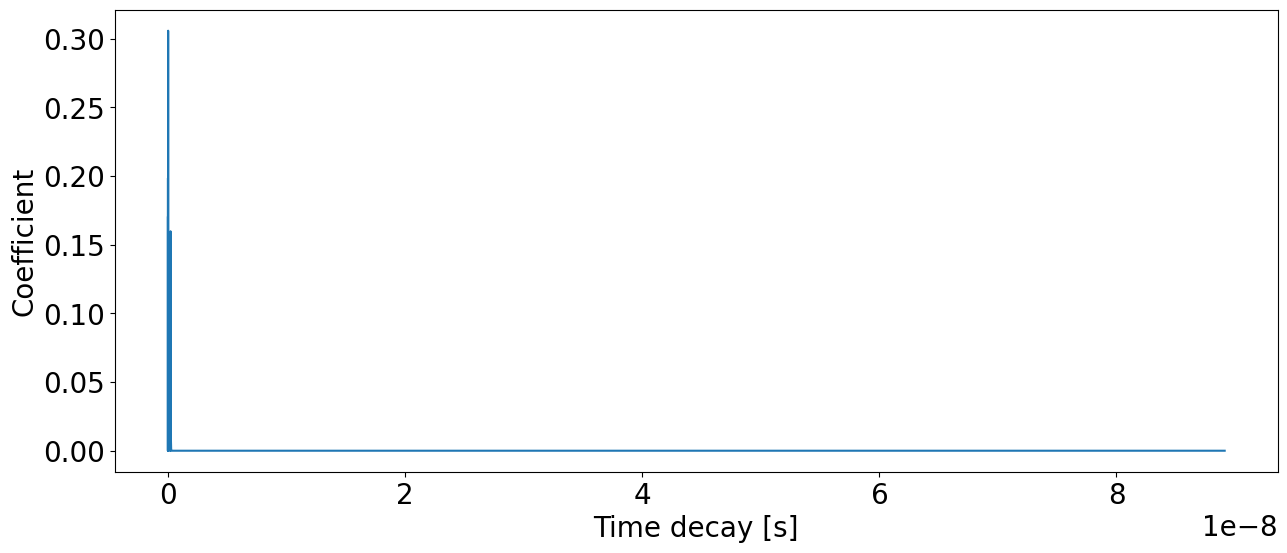

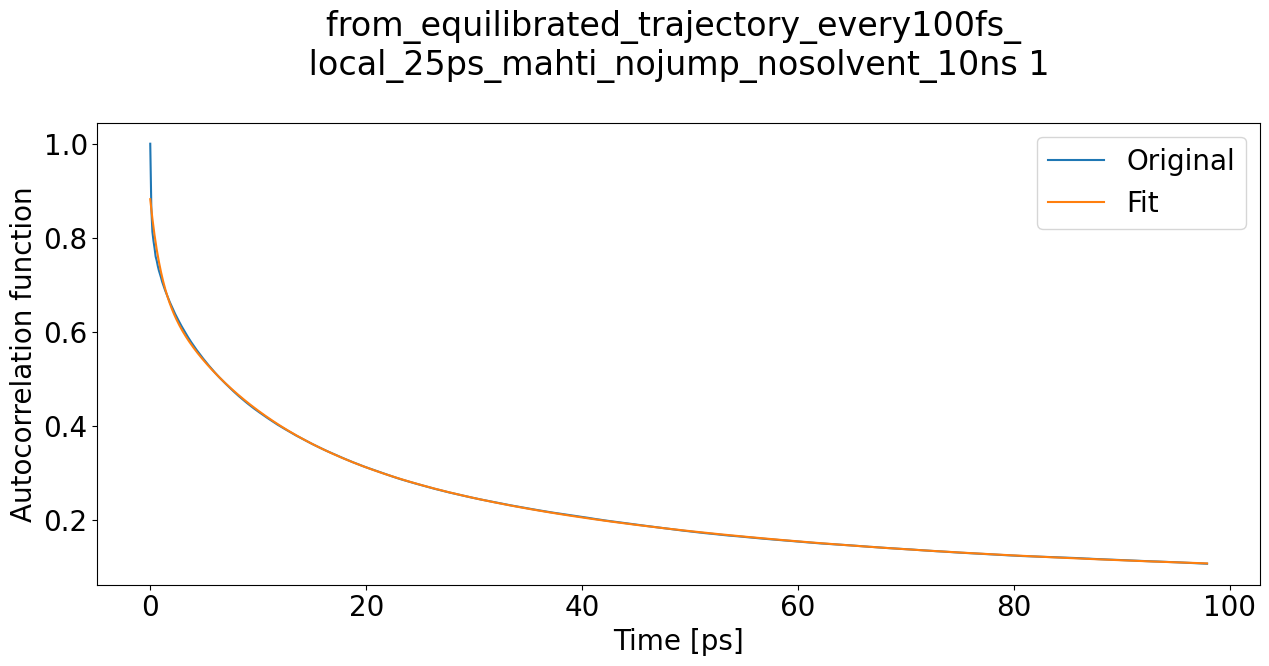

T1: 8.705257976553646 T2: 0.08189434129272496 NOE: -2.8549742870875843


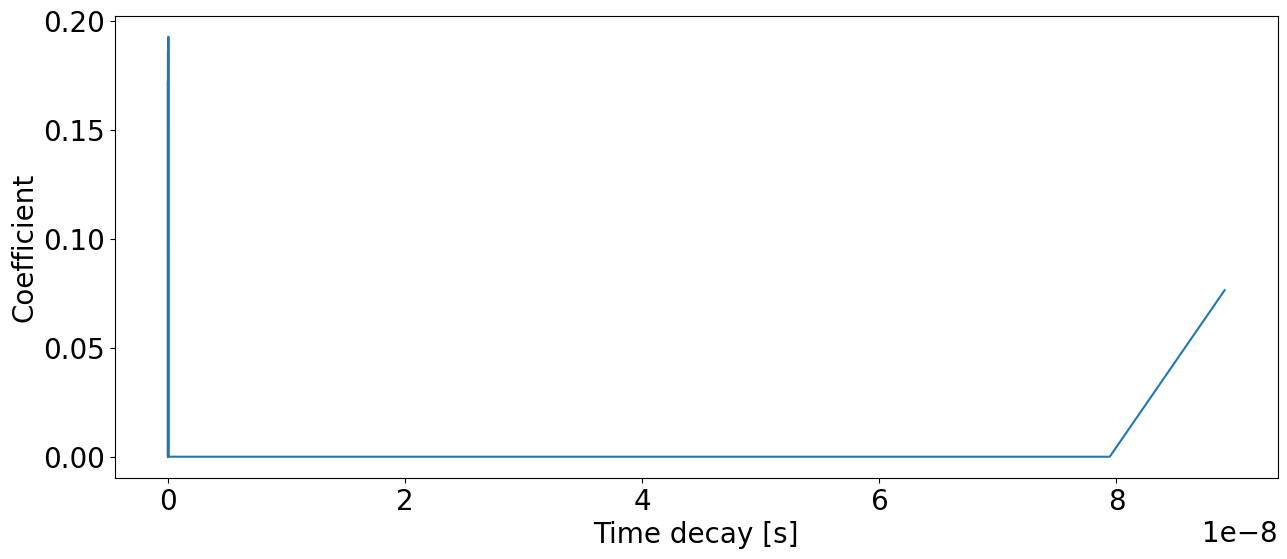

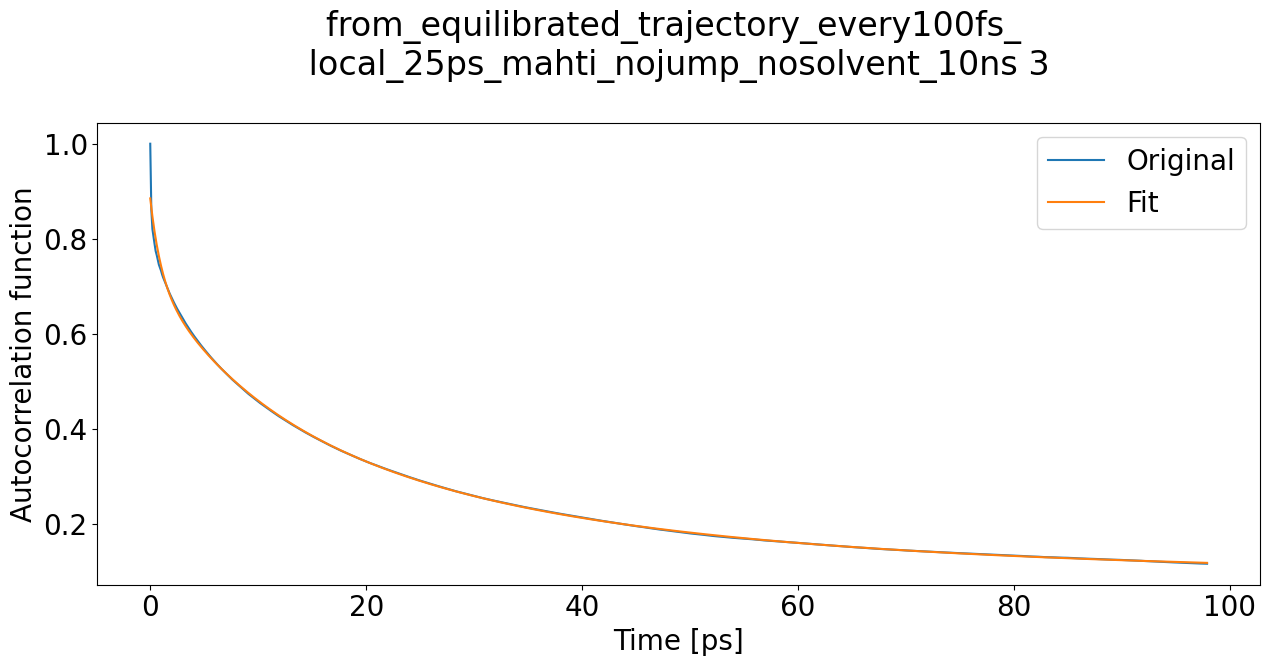

T1: 3.773201680518475 T2: 3.4436178410909086 NOE: -1.491947034781222


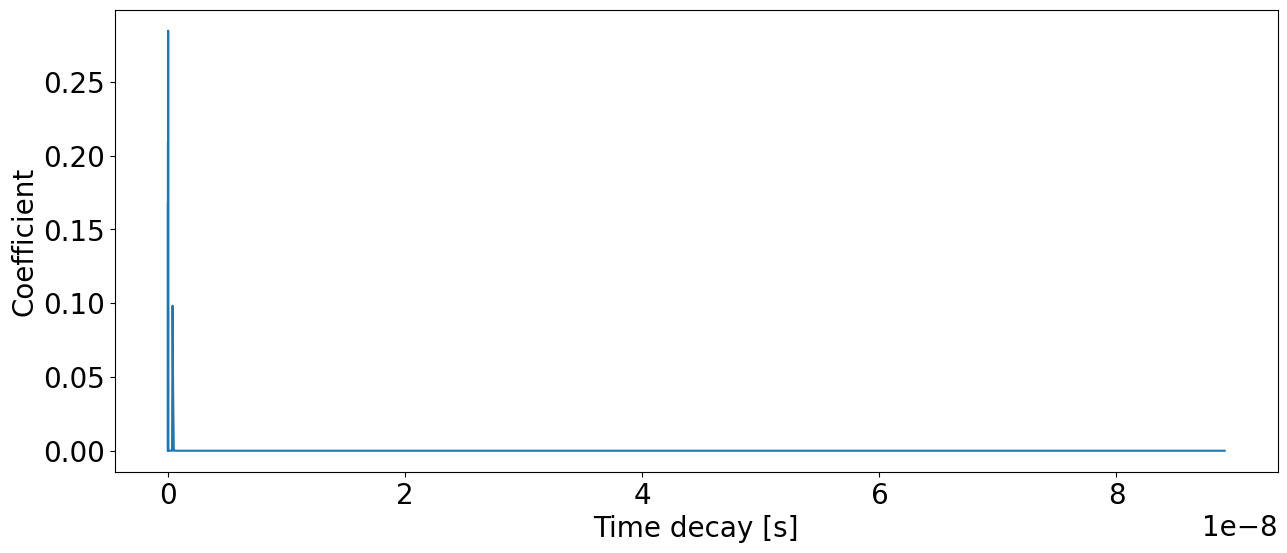

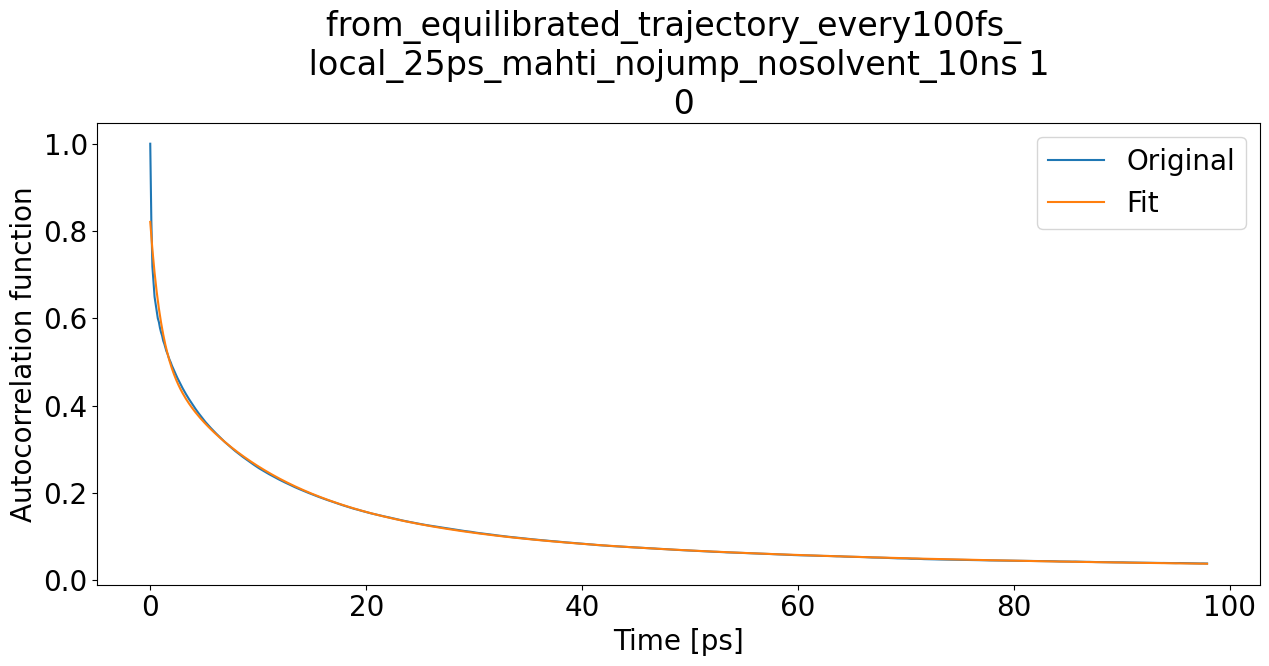

T1: 15.90403701547586 T2: 0.24237534009966283 NOE: -2.9743059677462744


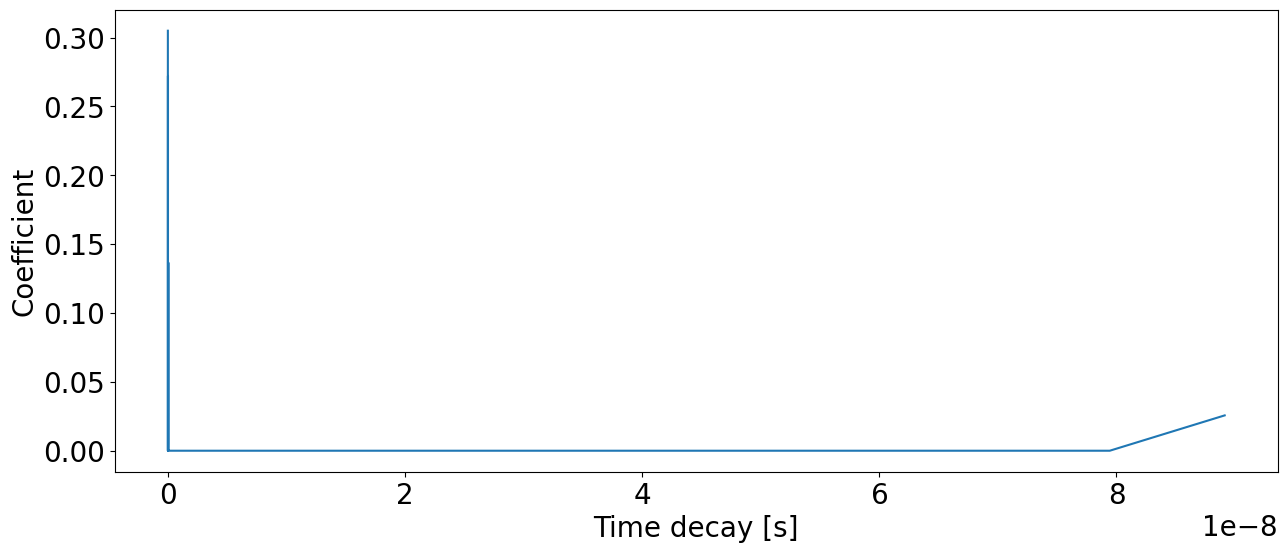

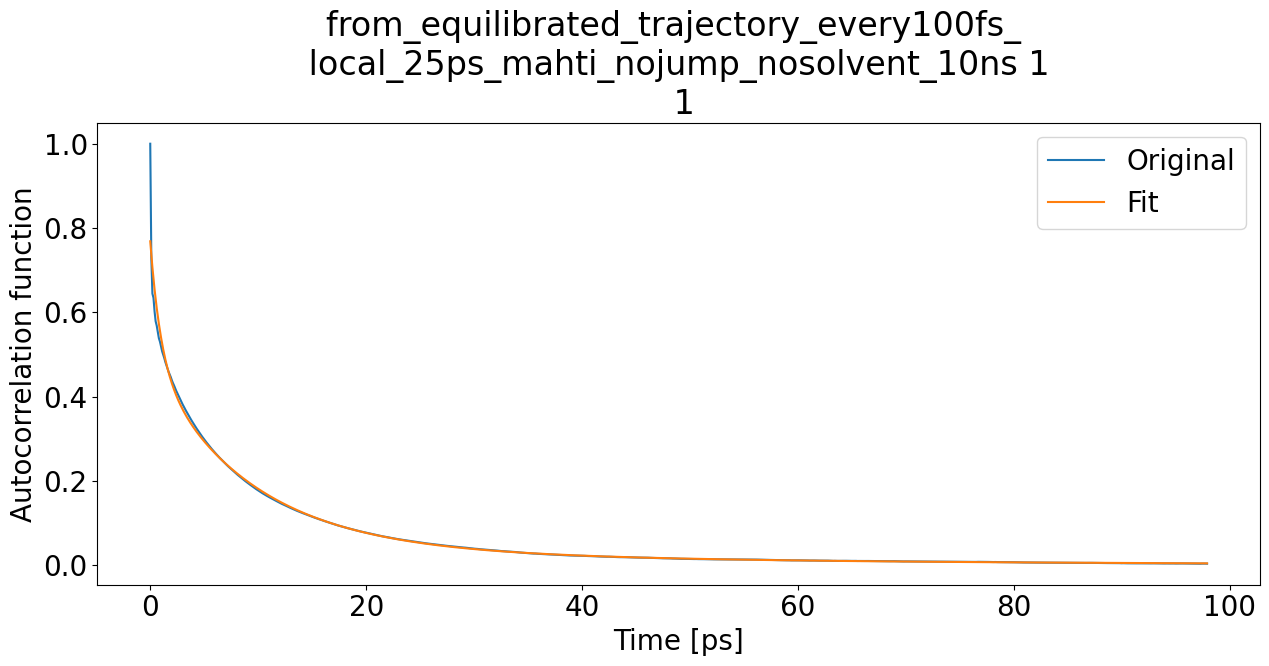

T1: 25.070570087321126 T2: 24.43767095916442 NOE: -3.1529886888395113


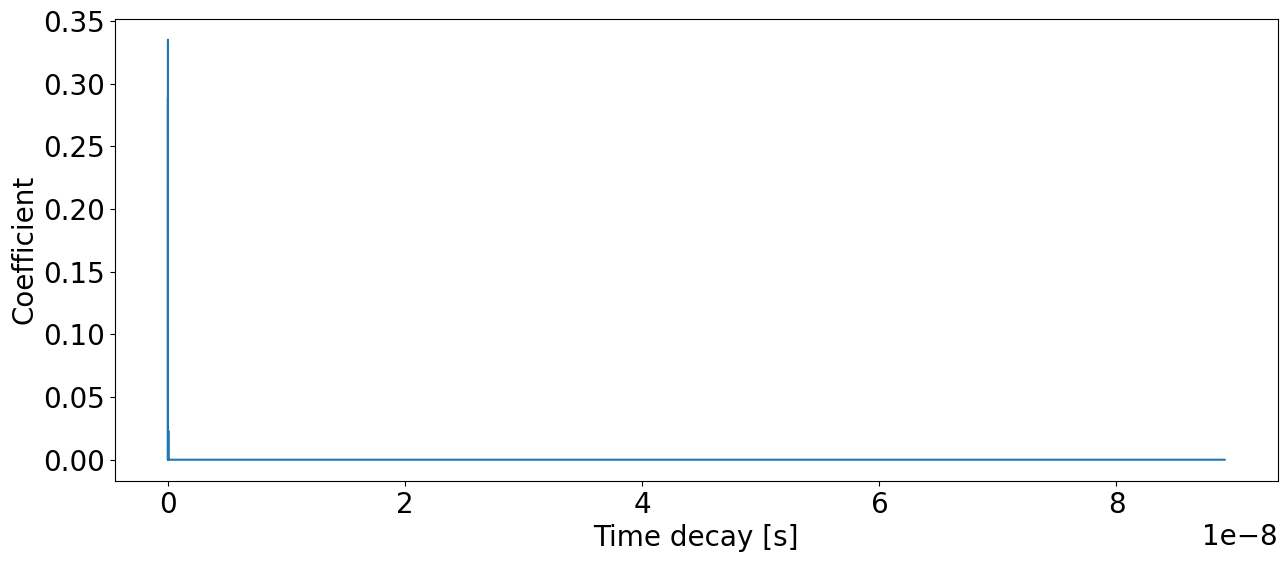

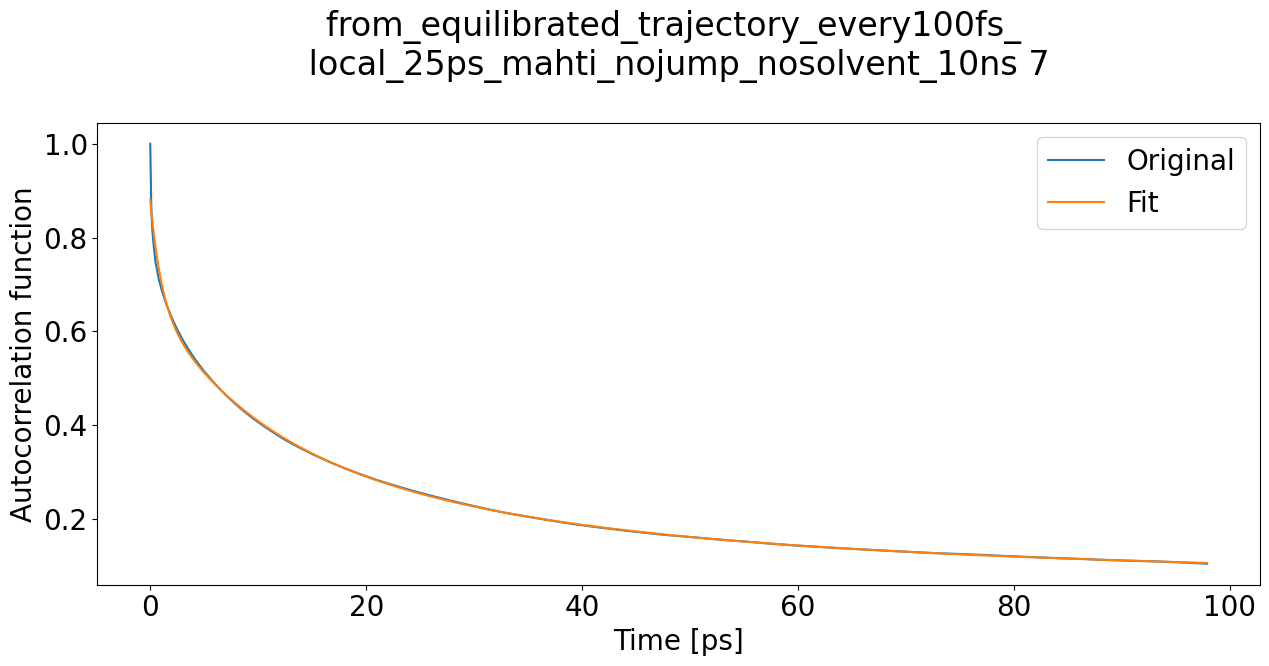

T1: 4.656282801443662 T2: 4.40392385390304 NOE: -2.222451996079049


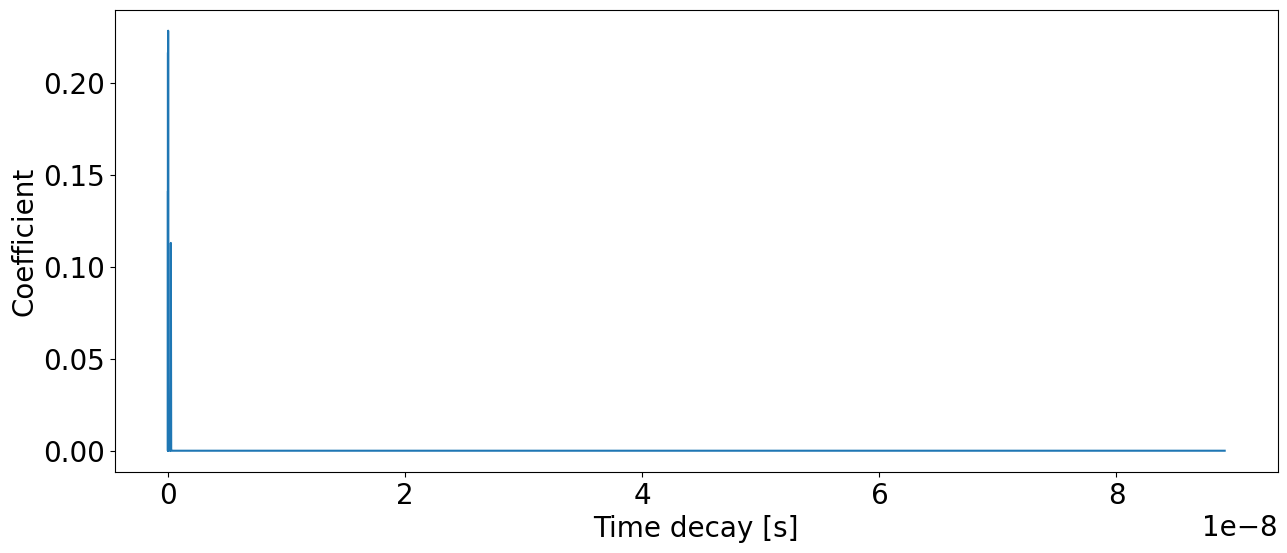

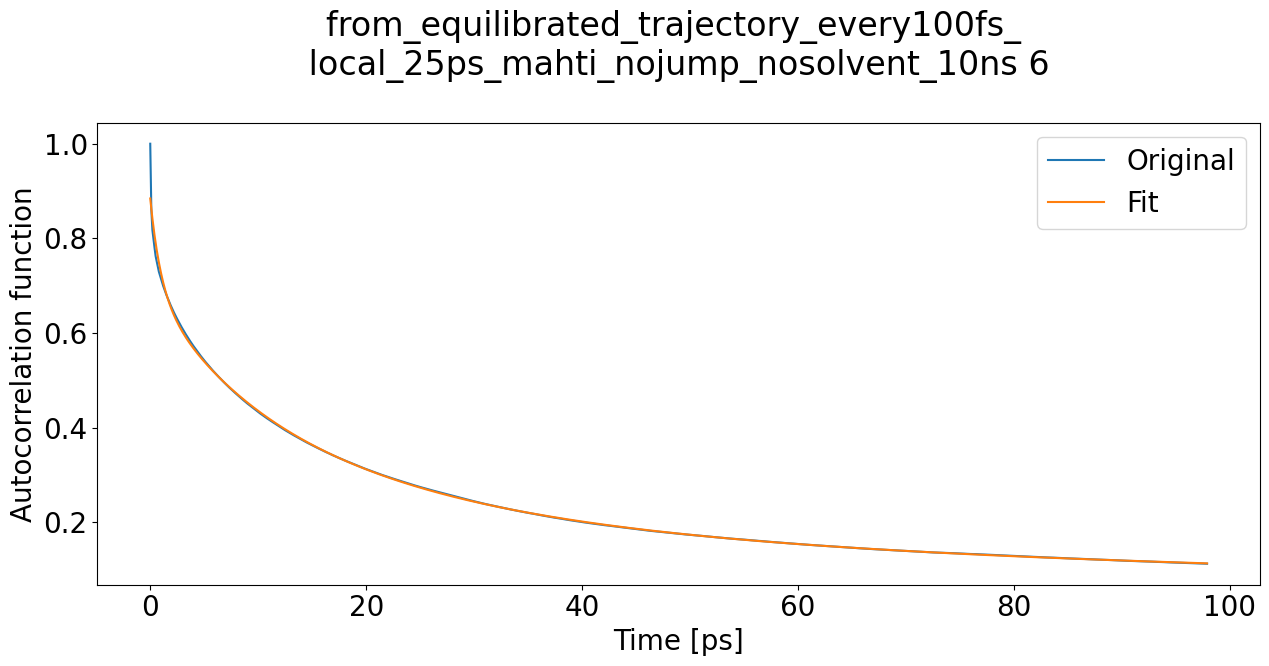

T1: 4.456090117140669 T2: 4.245785707920609 NOE: -2.4102591451022968


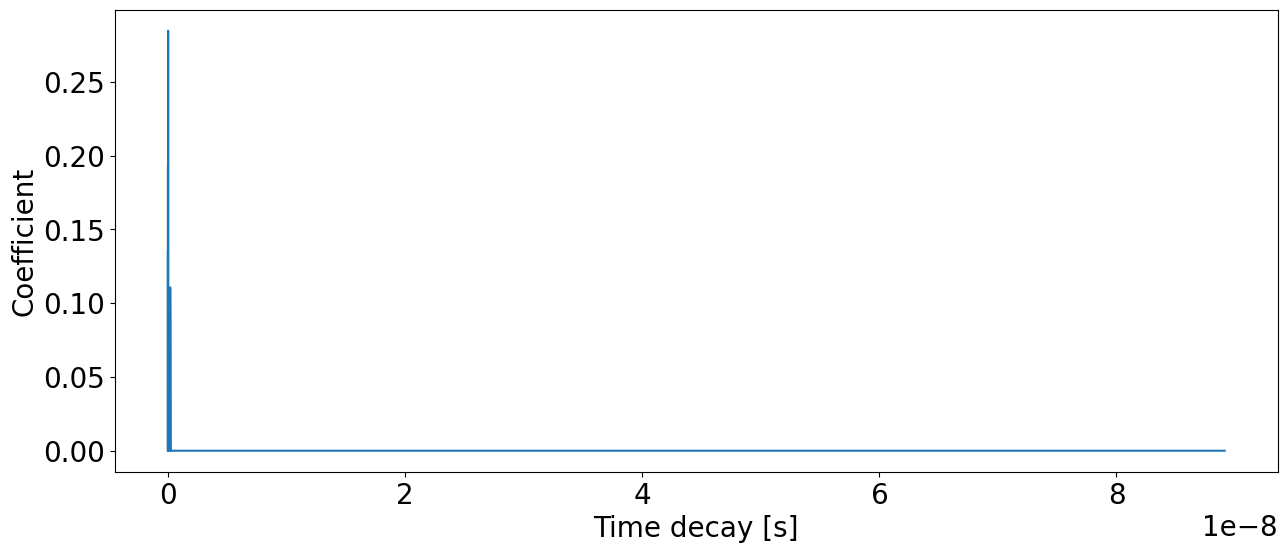

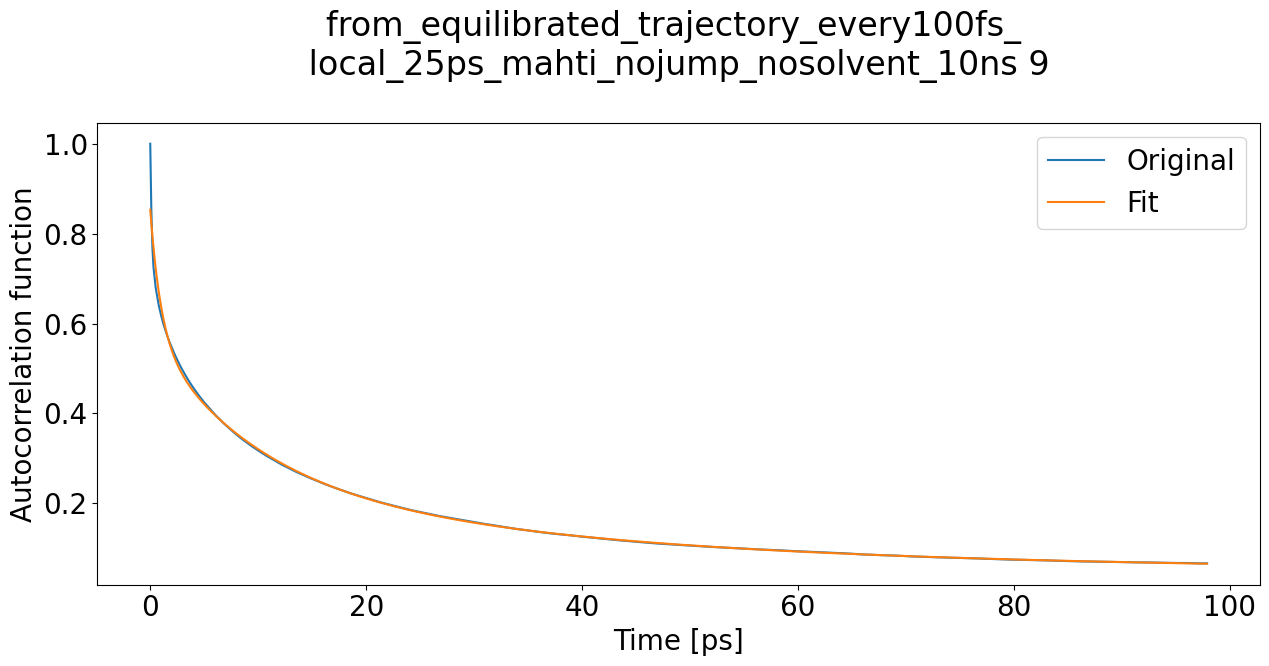

T1: 12.955877571725422 T2: 0.12597430923118258 NOE: -2.874743546920184
correl function should exist


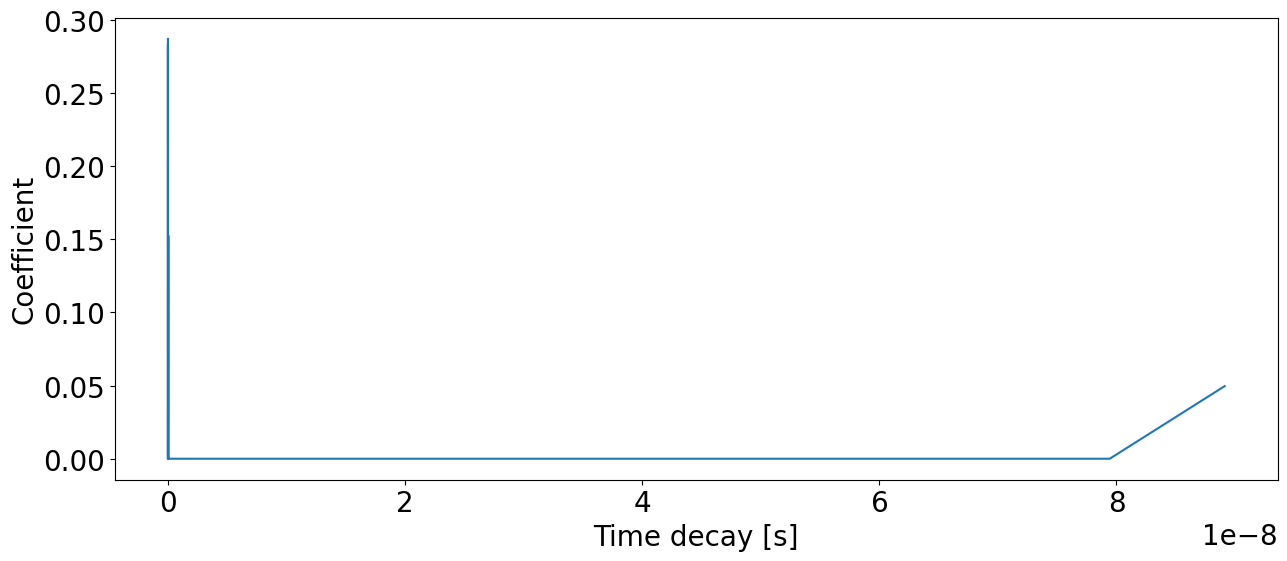

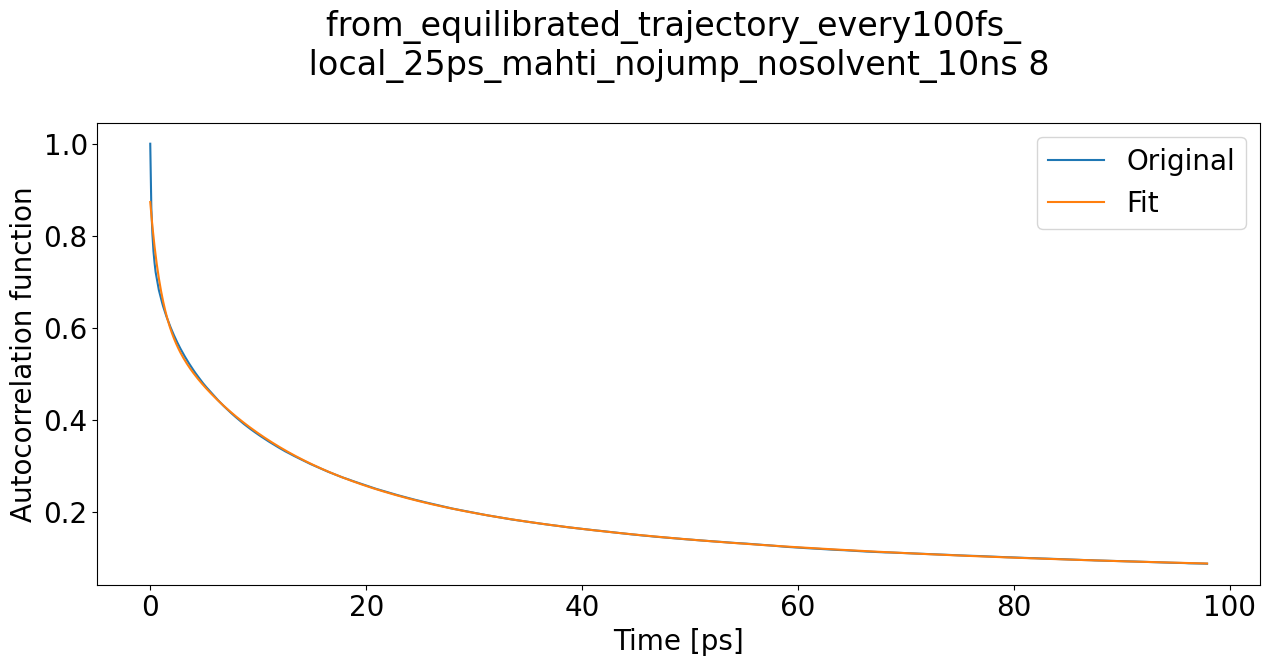

T1: 10.57324060834024 T2: 0.09853388072640674 NOE: -2.8548448116734058


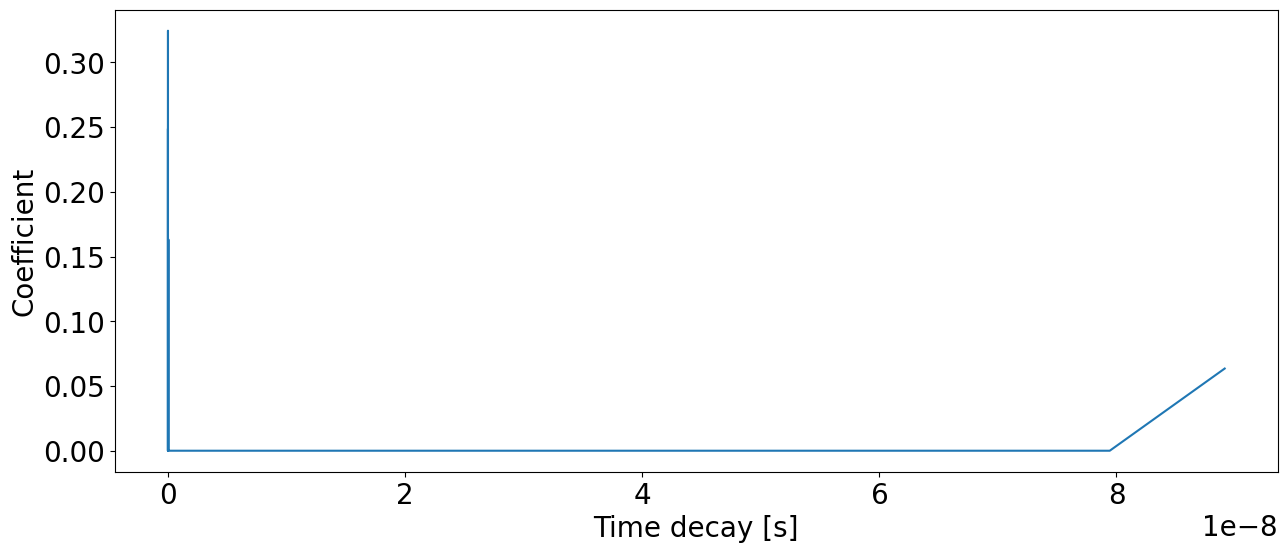

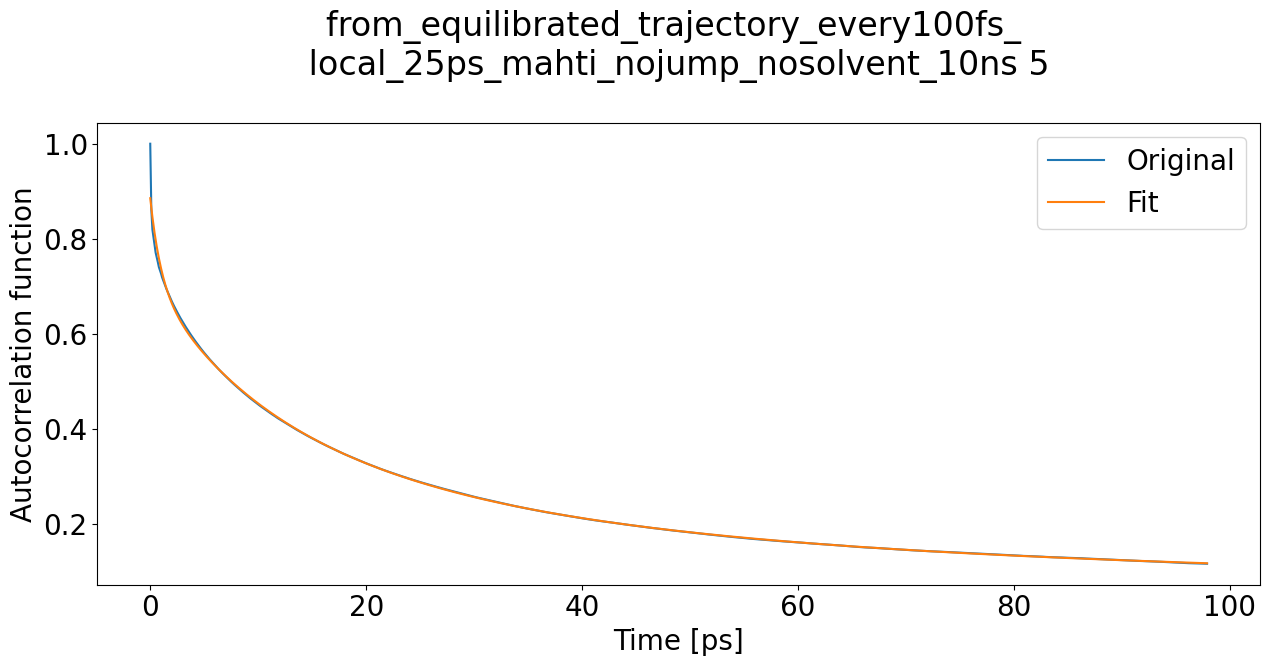

T1: 4.261497438287746 T2: 4.049717888286554 NOE: -2.3429123861775336


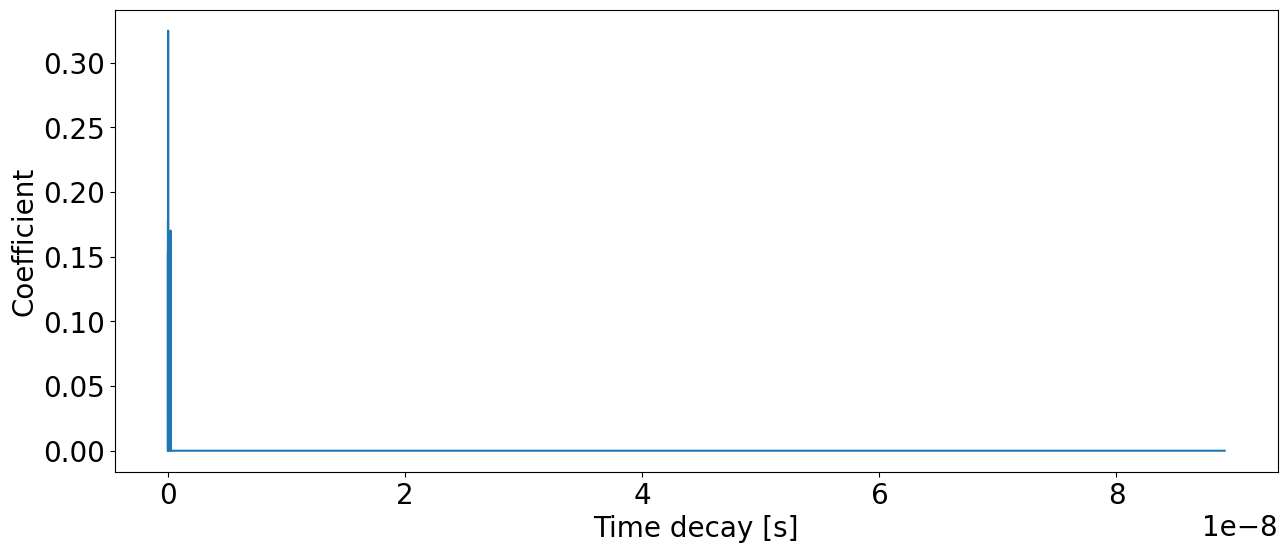

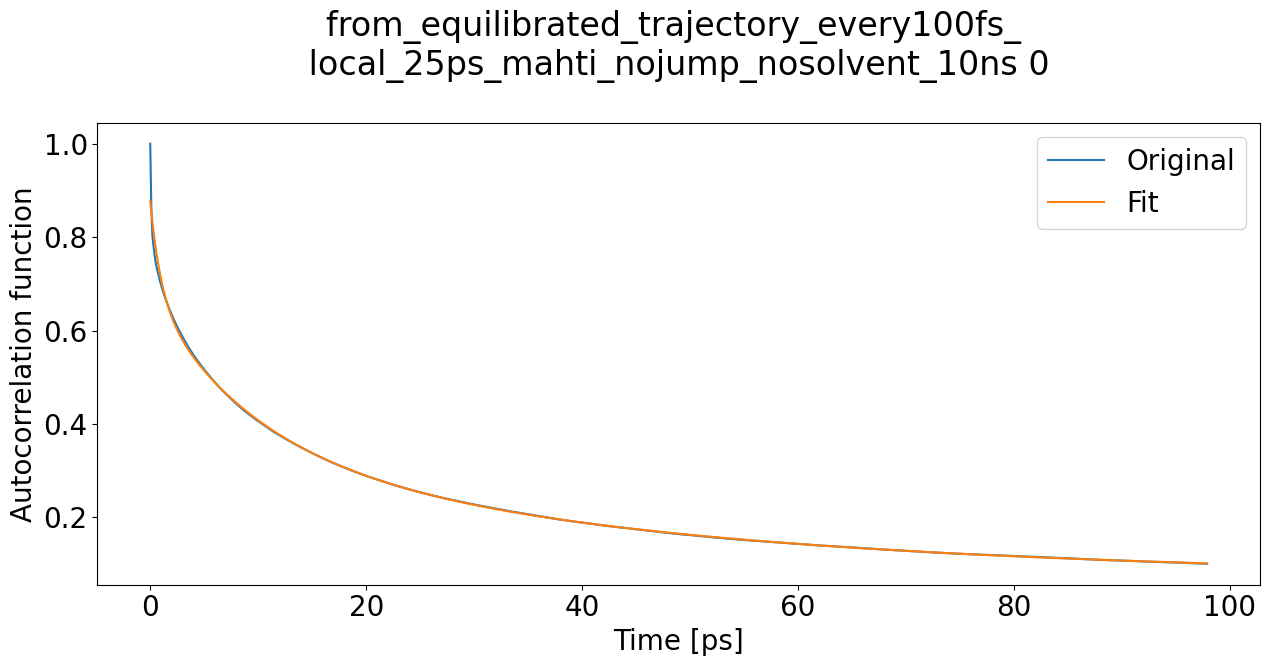

T1: 3.9321388476100387 T2: 1.5531137985139347 NOE: -0.6920281661090759


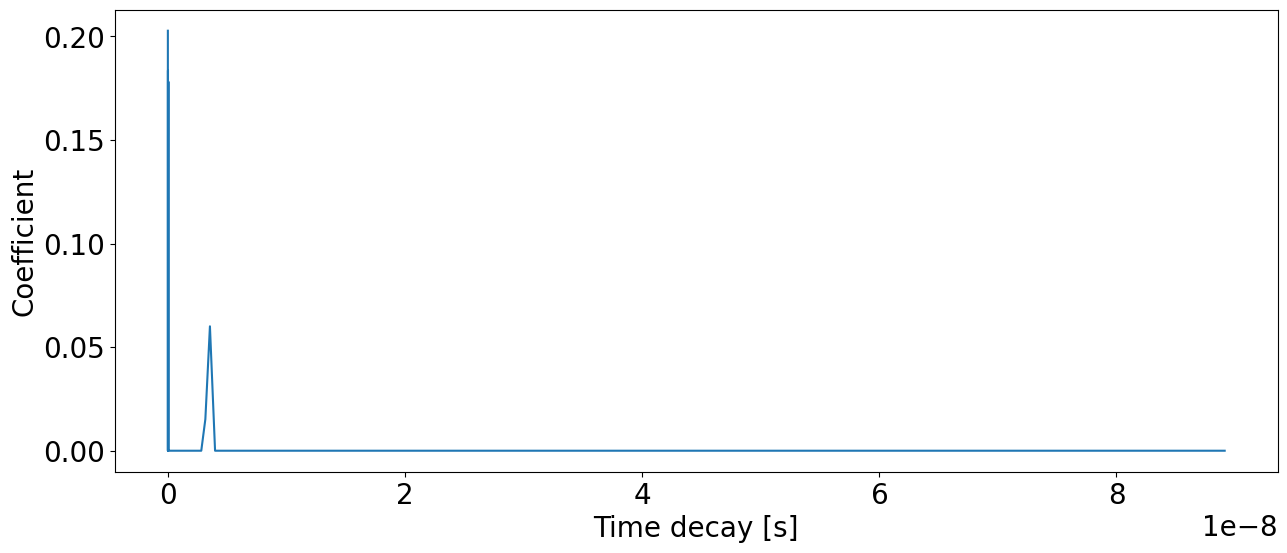

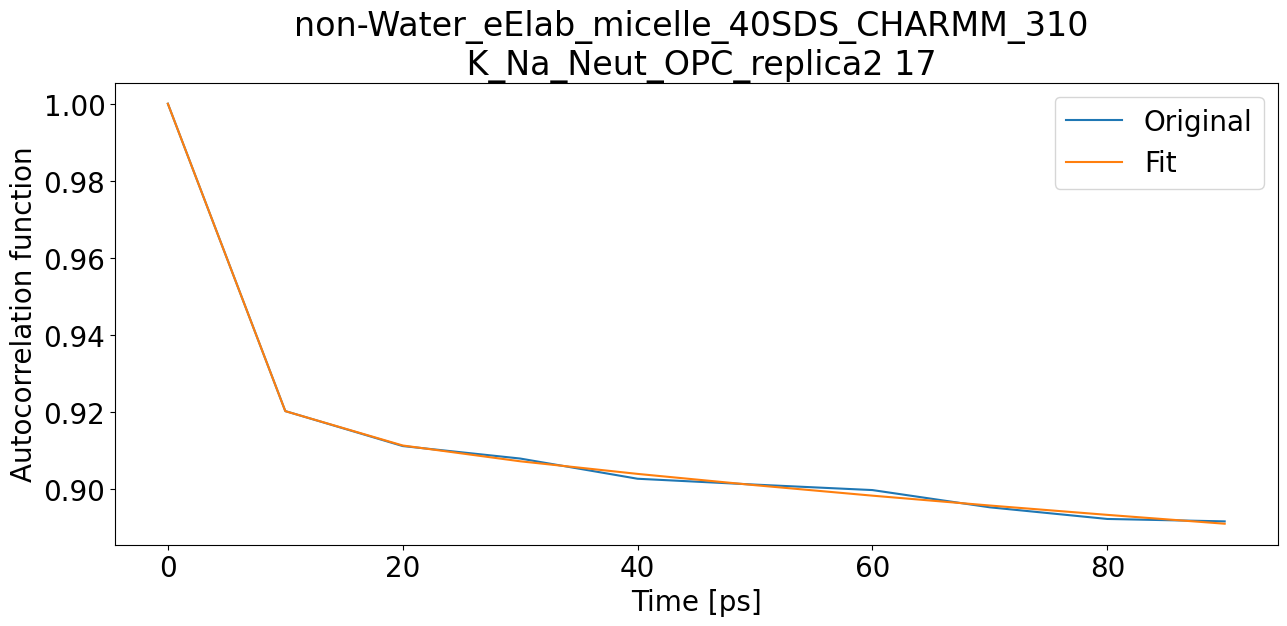

T1: 6.758553993402985 T2: 0.007409803465125476 NOE: -0.43001255763343593


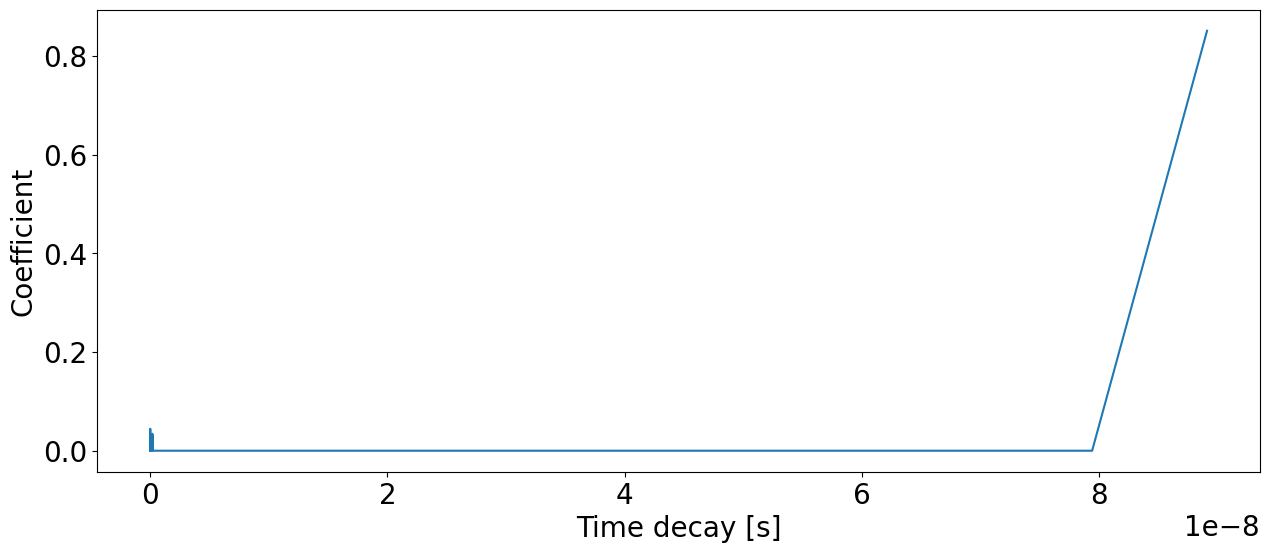

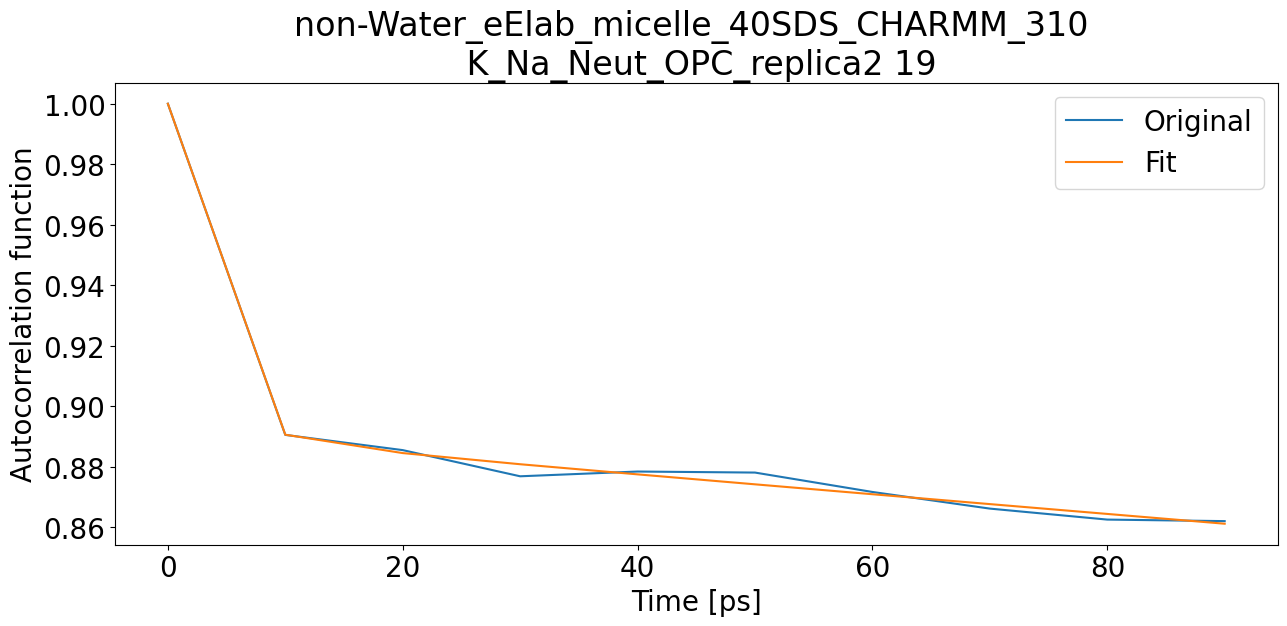

T1: 0.4764358864209072 T2: 0.18859694996645382 NOE: 0.7974825189714494


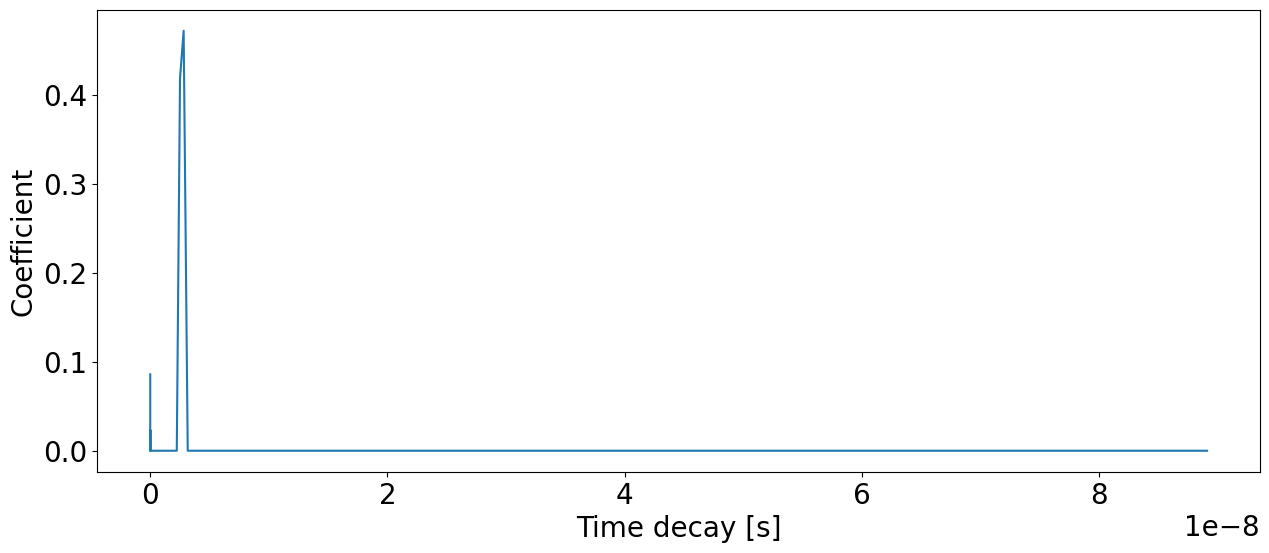

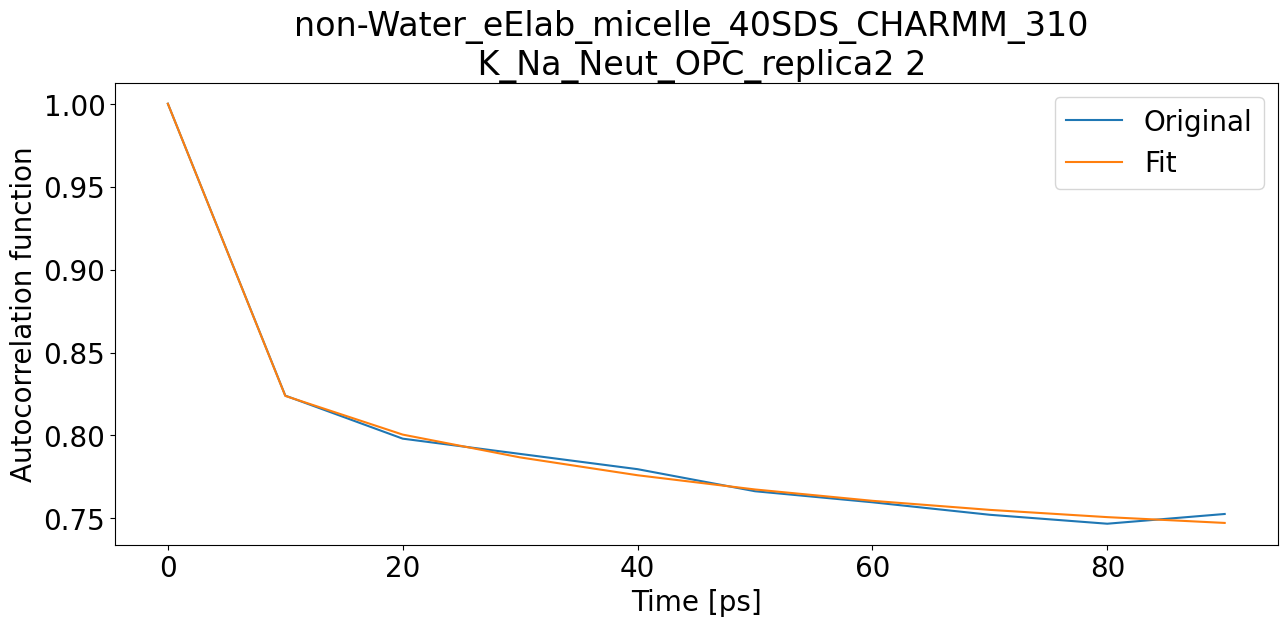

T1: 9.232952641346385 T2: 0.008590686428464542 NOE: -0.32726025876191


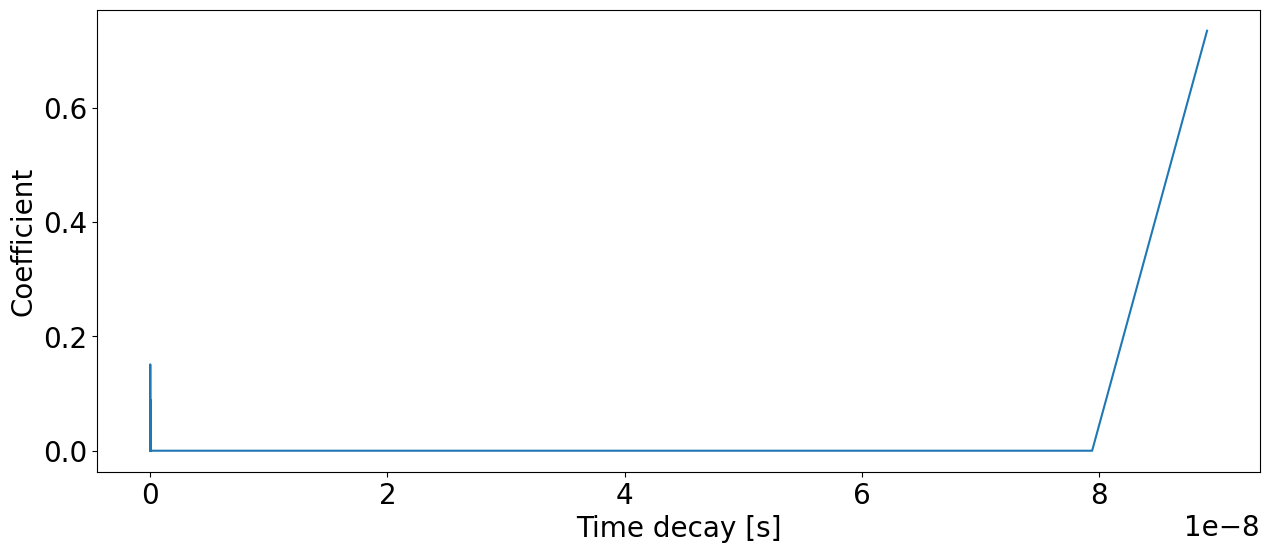

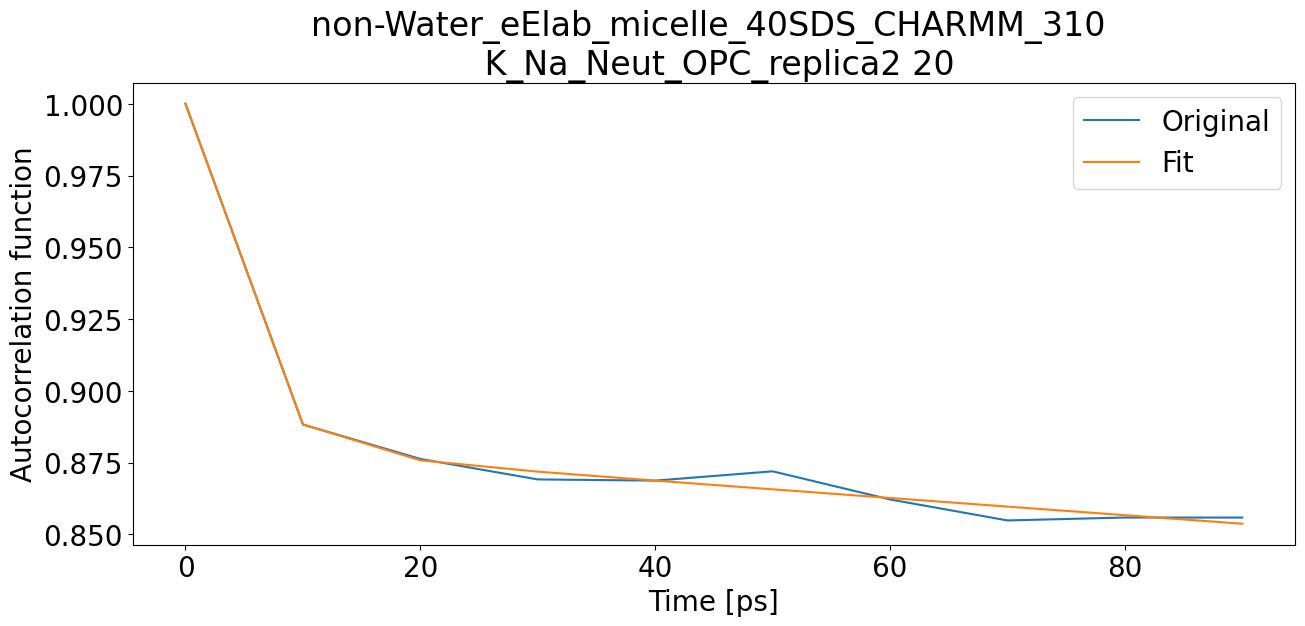

T1: 0.5786533671059134 T2: 0.029088402116783985 NOE: 0.7685557758882516


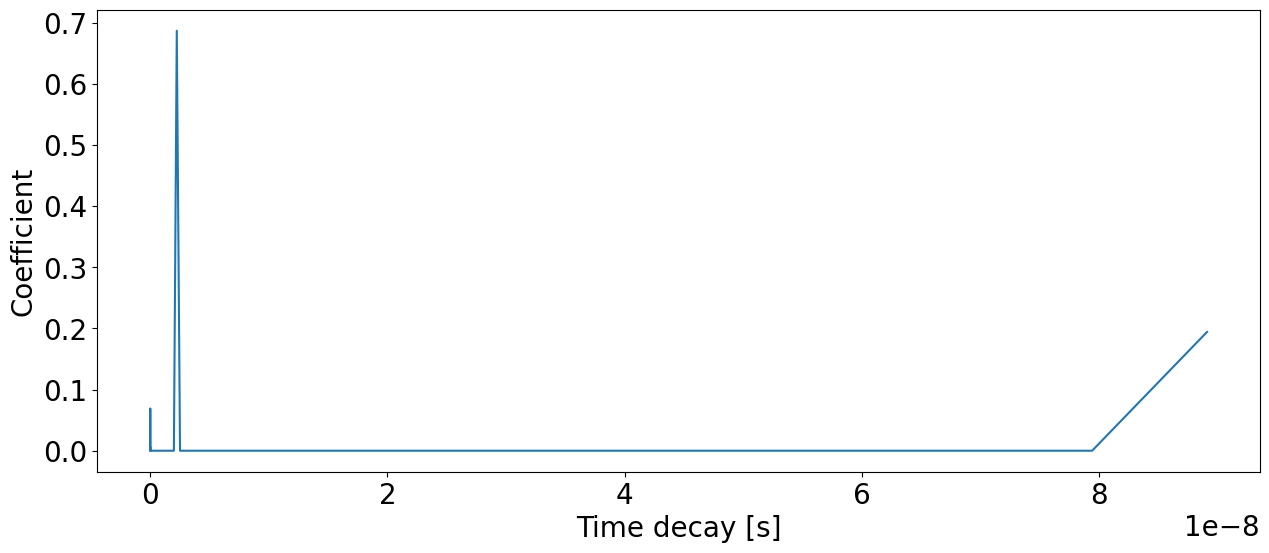

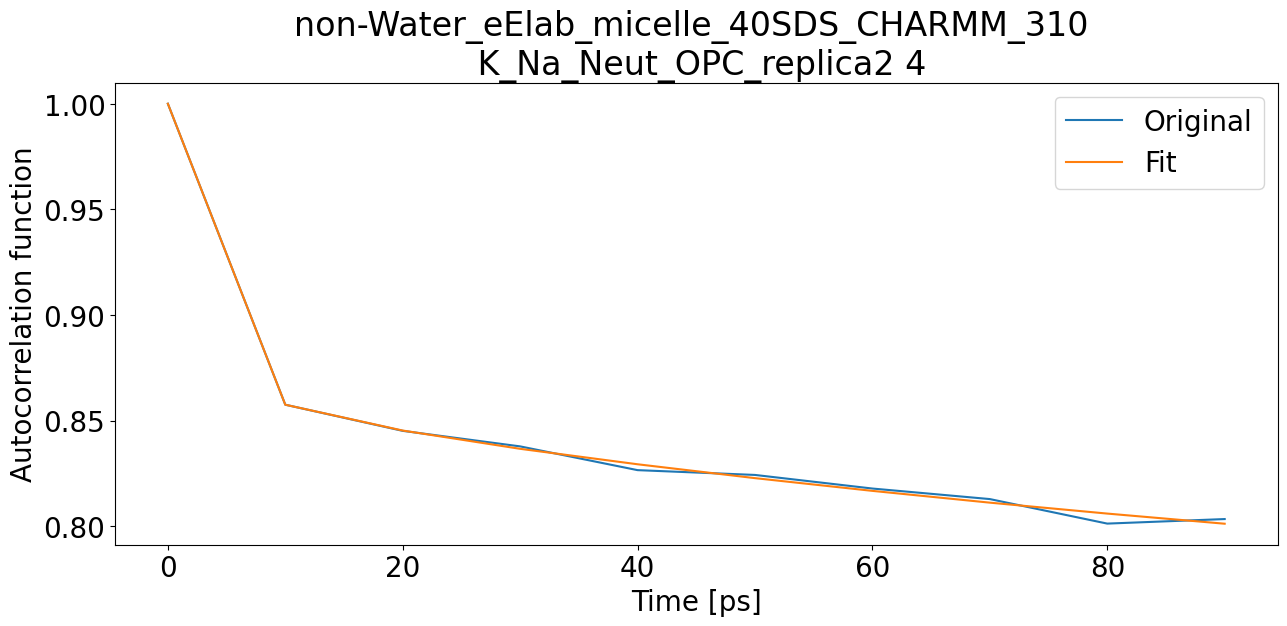

T1: 6.088343161807221 T2: 0.008510846397772377 NOE: -1.044360694962028


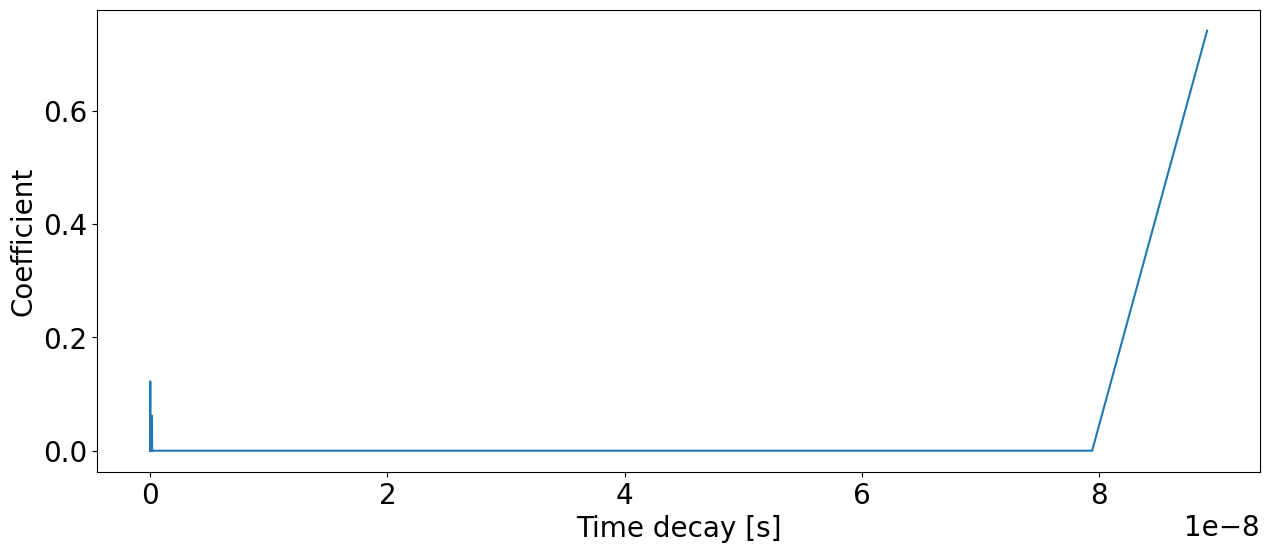

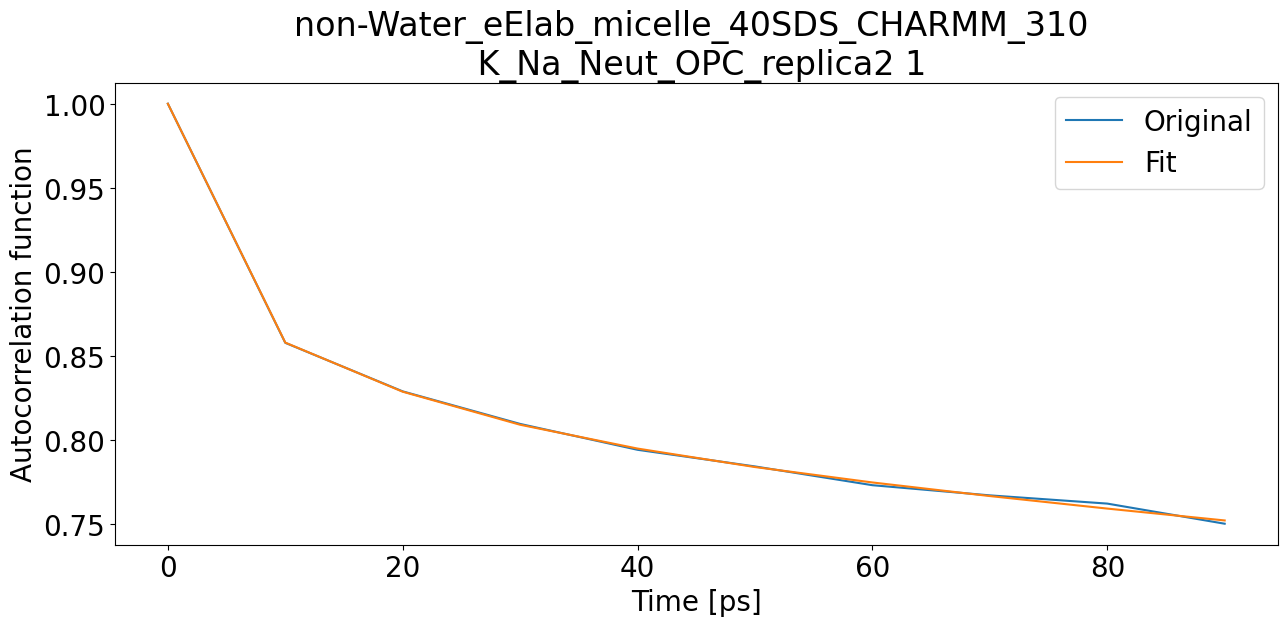

T1: 0.5232930225254389 T2: 0.376548530201097 NOE: 0.5207379926086226


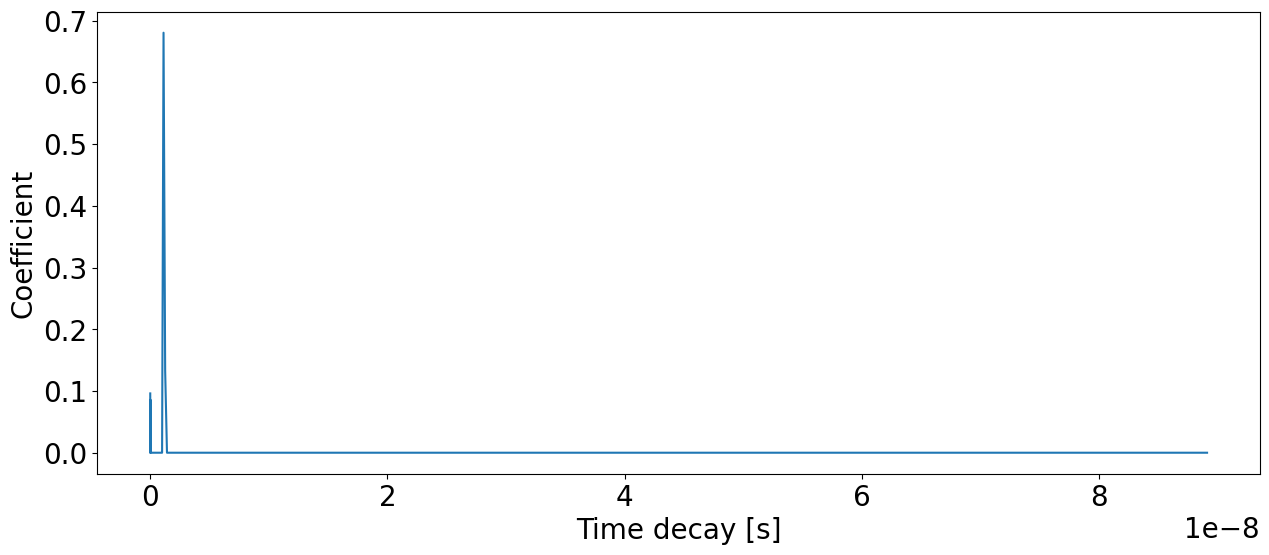

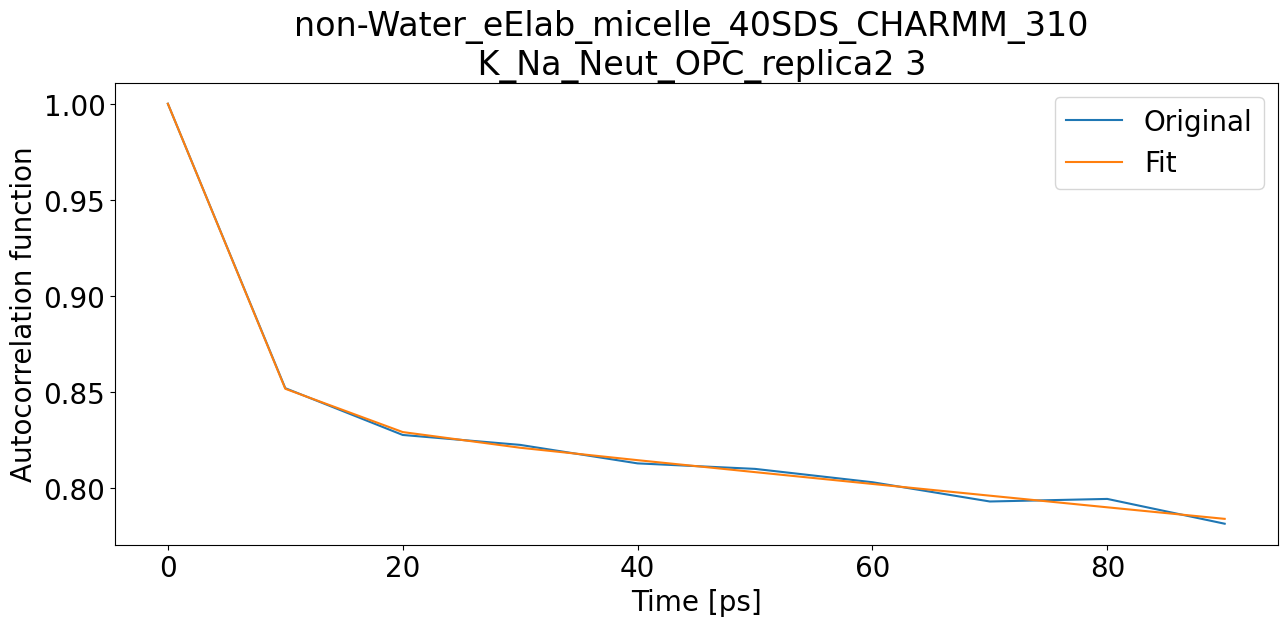

T1: 0.4875976218130133 T2: 0.3309799975132827 NOE: 0.6049155561216604


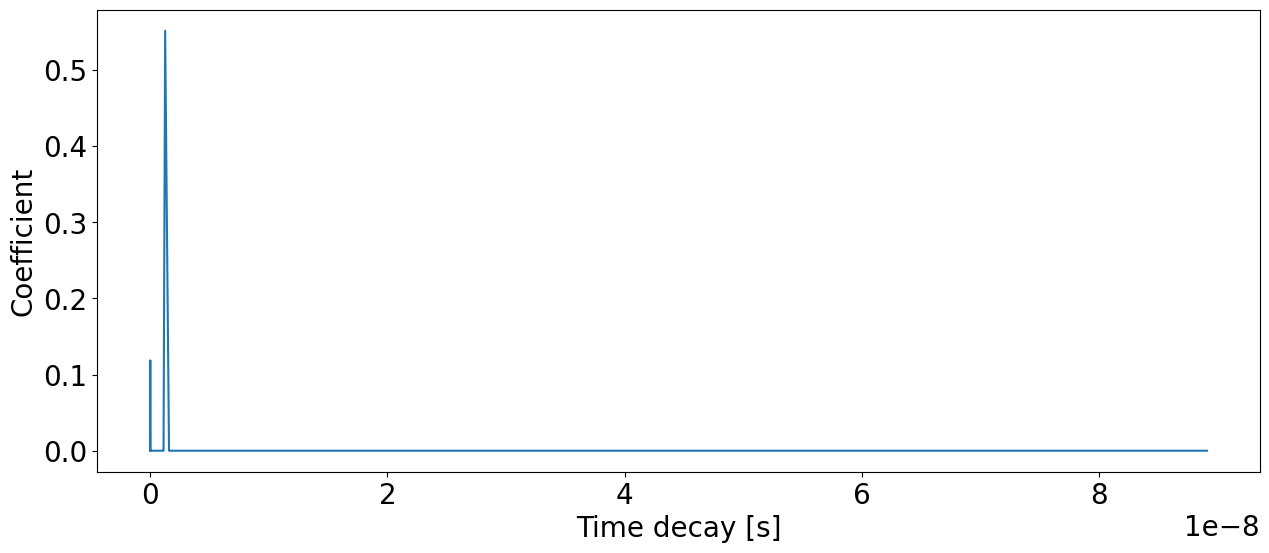

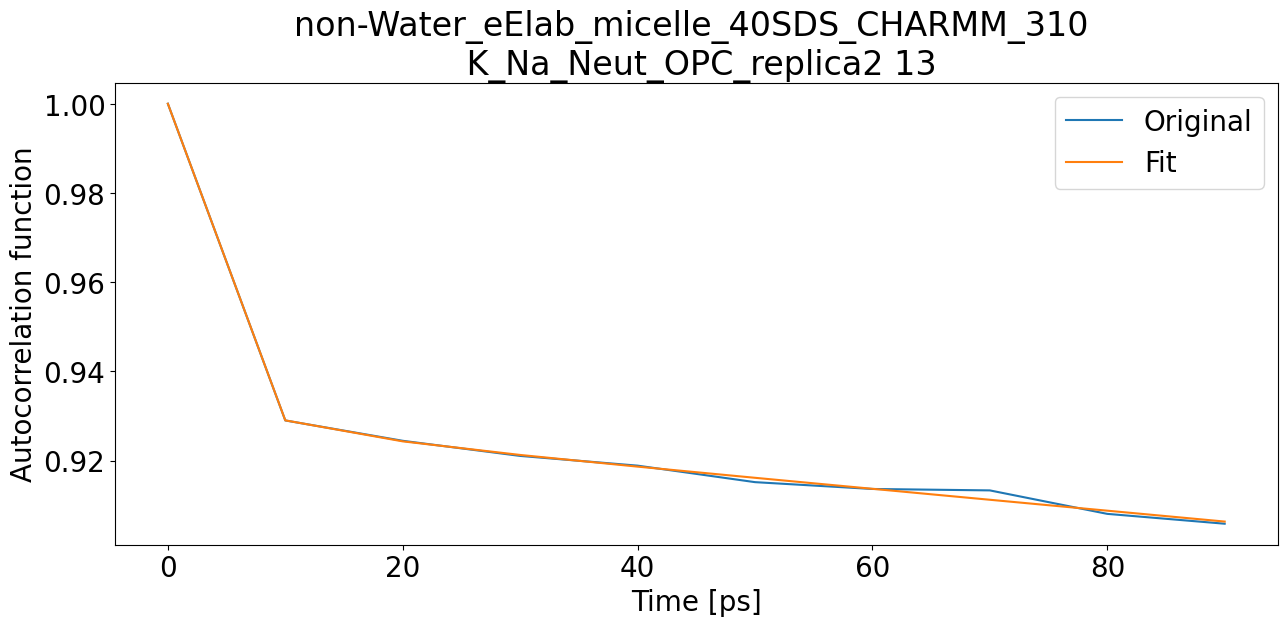

T1: 0.5393661072361077 T2: 0.14086325123995022 NOE: 0.8283156017467755


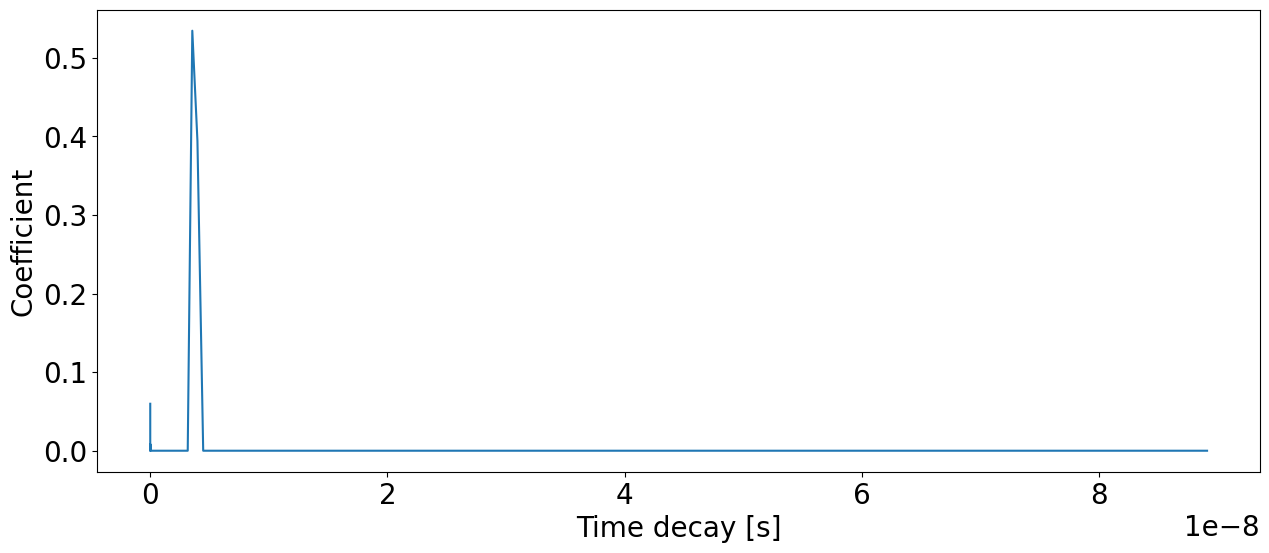

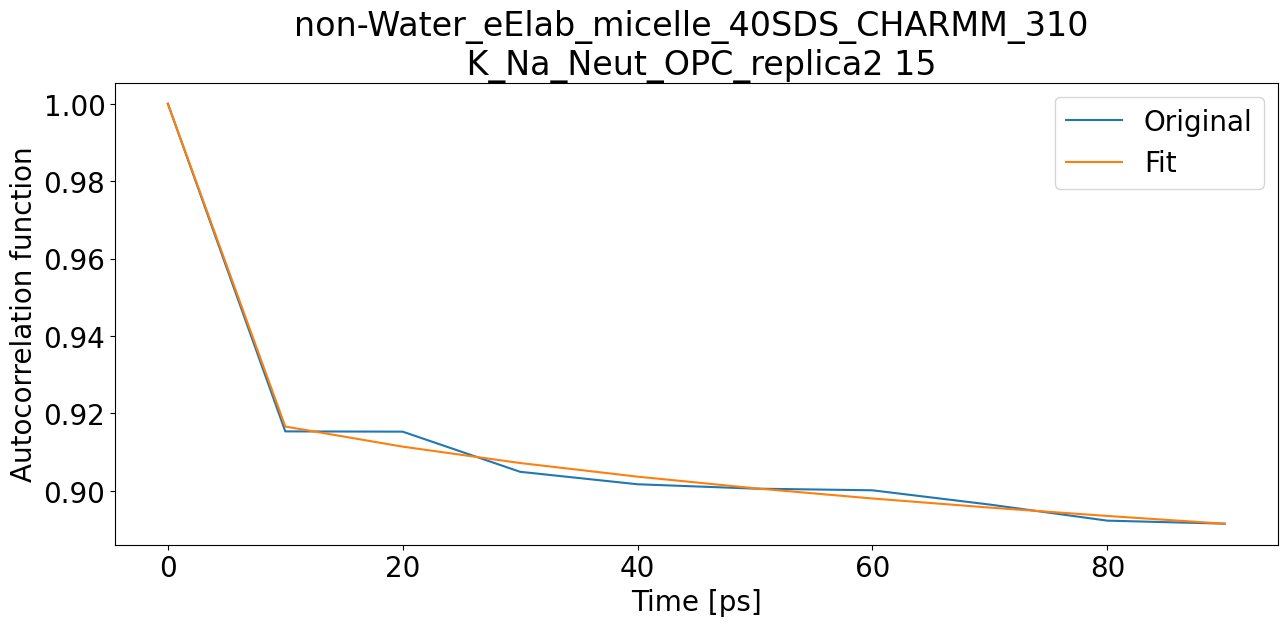

T1: 0.7302788870354374 T2: 0.10452779857390763 NOE: 0.8358845496150092


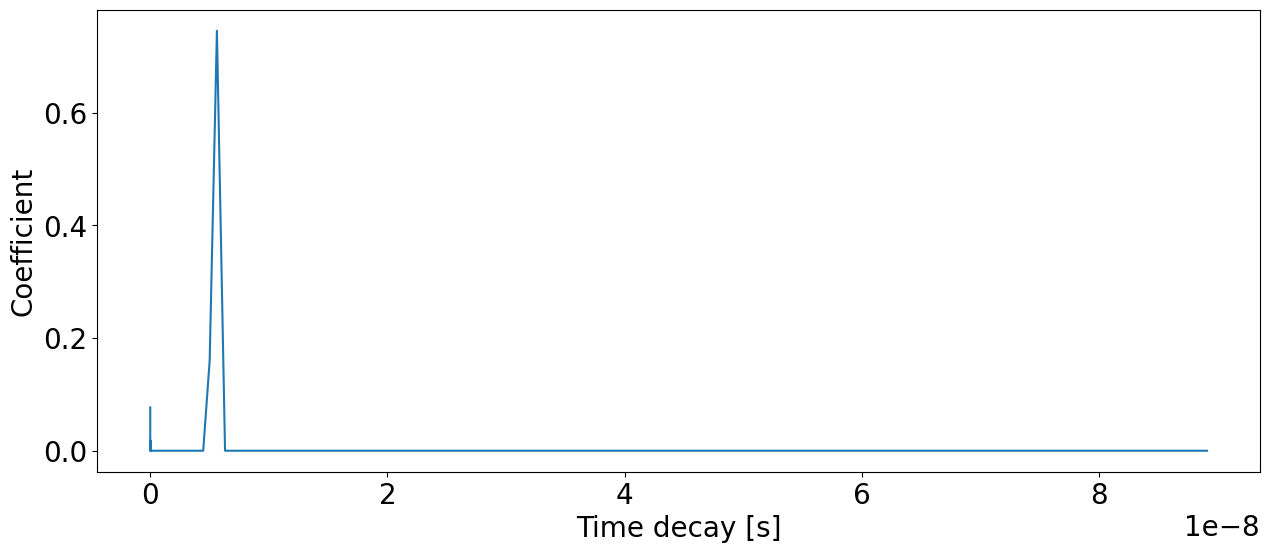

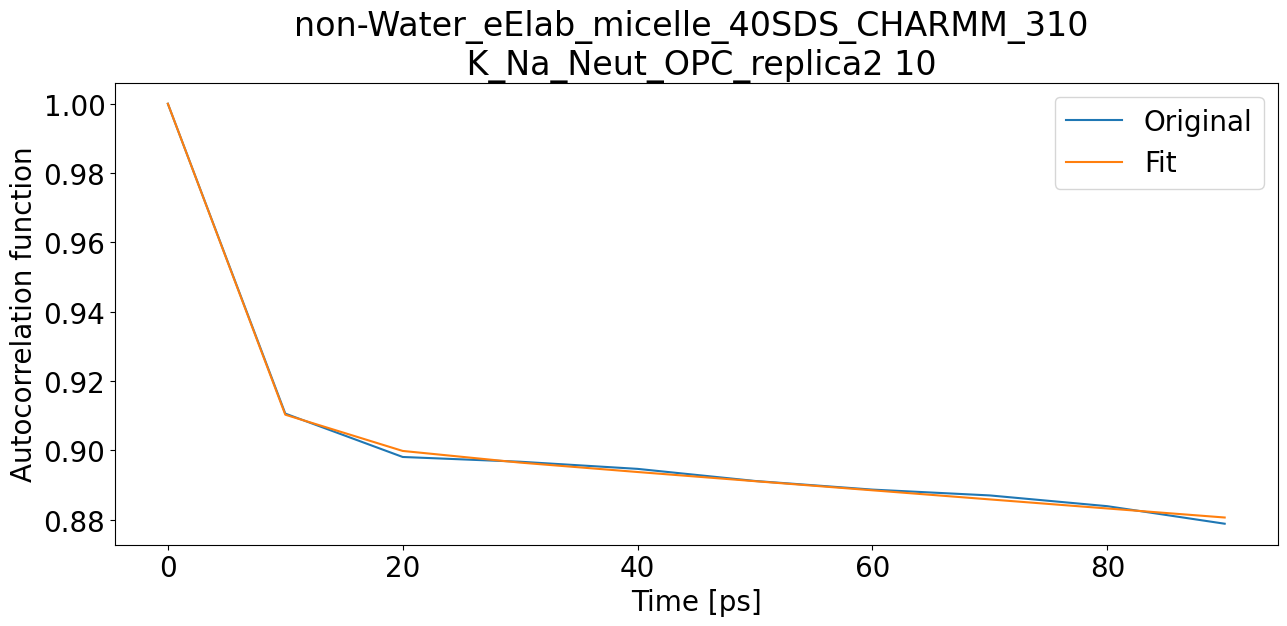

T1: 0.5234824434498184 T2: 0.15565016170947707 NOE: 0.8181880979472637


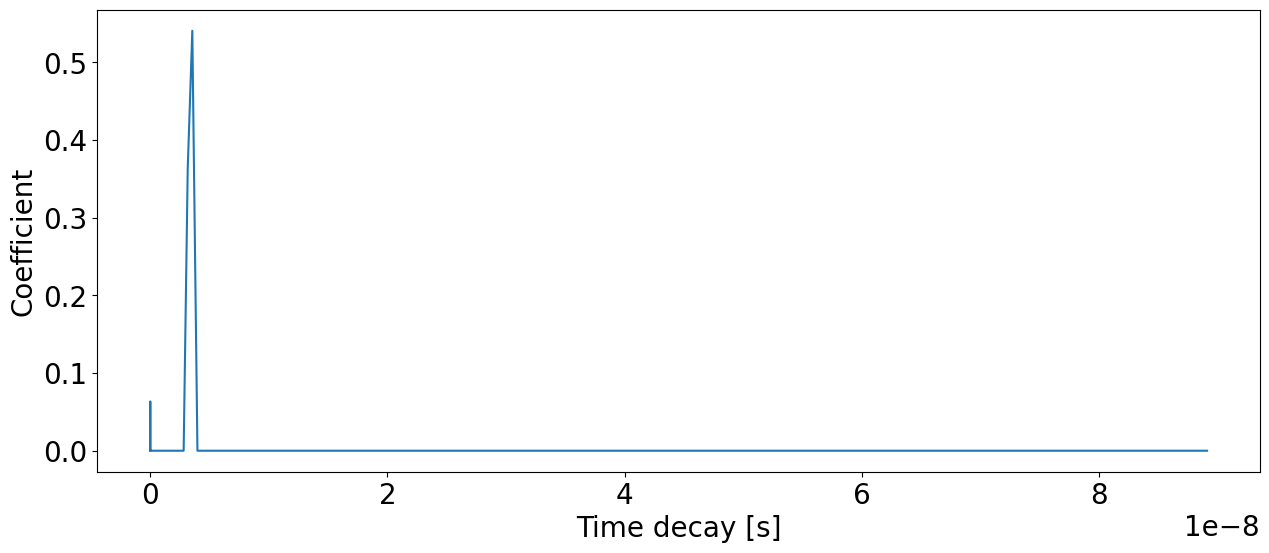

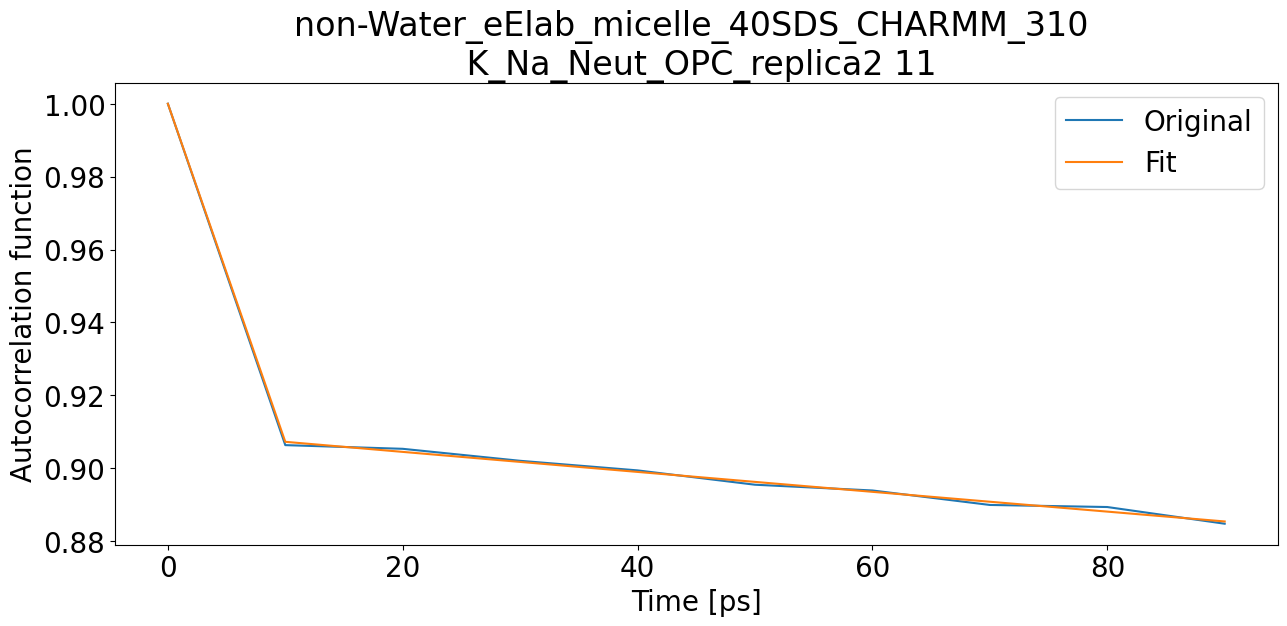

T1: 0.5123324417443299 T2: 0.1583530632800953 NOE: 0.820018257548895


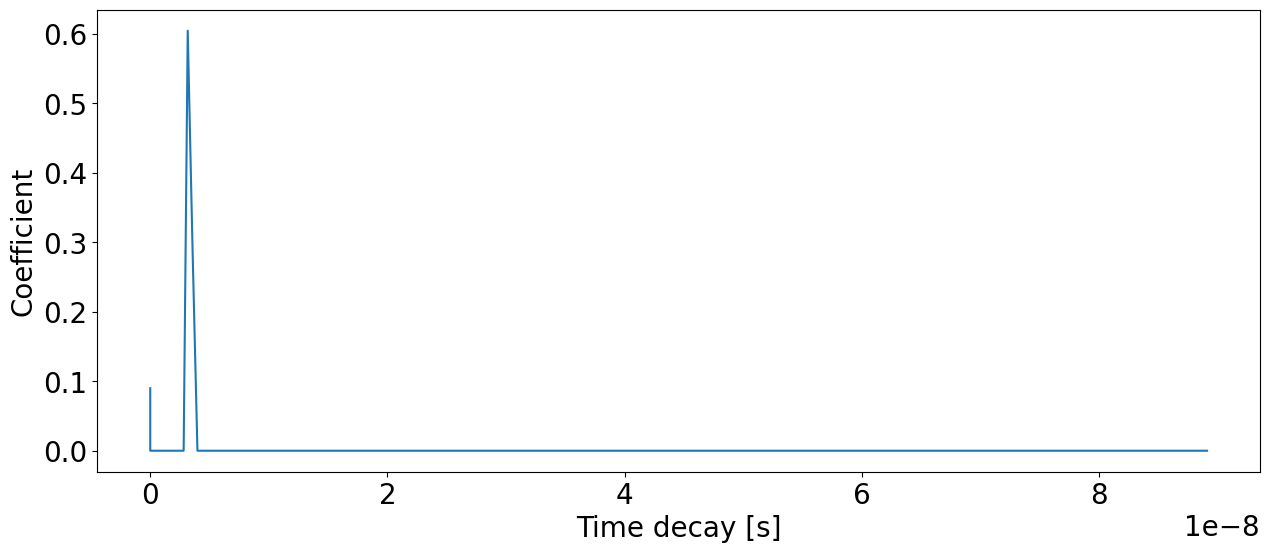

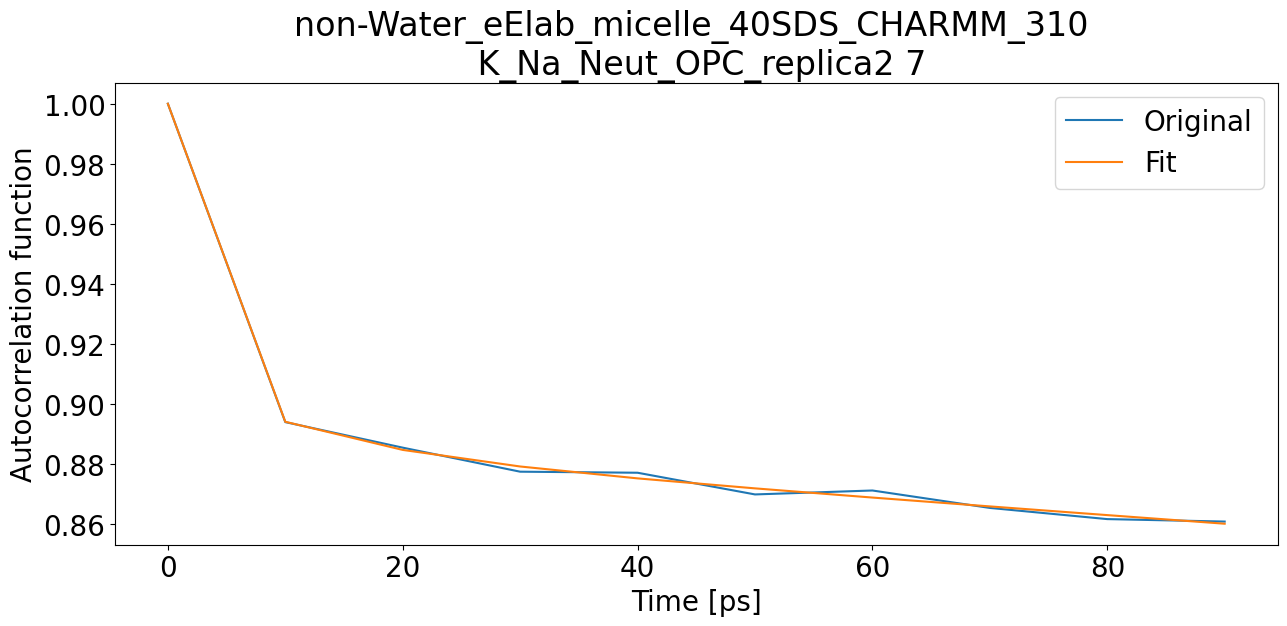

T1: 0.5039666501754549 T2: 0.17313845013654347 NOE: 0.808602082244924


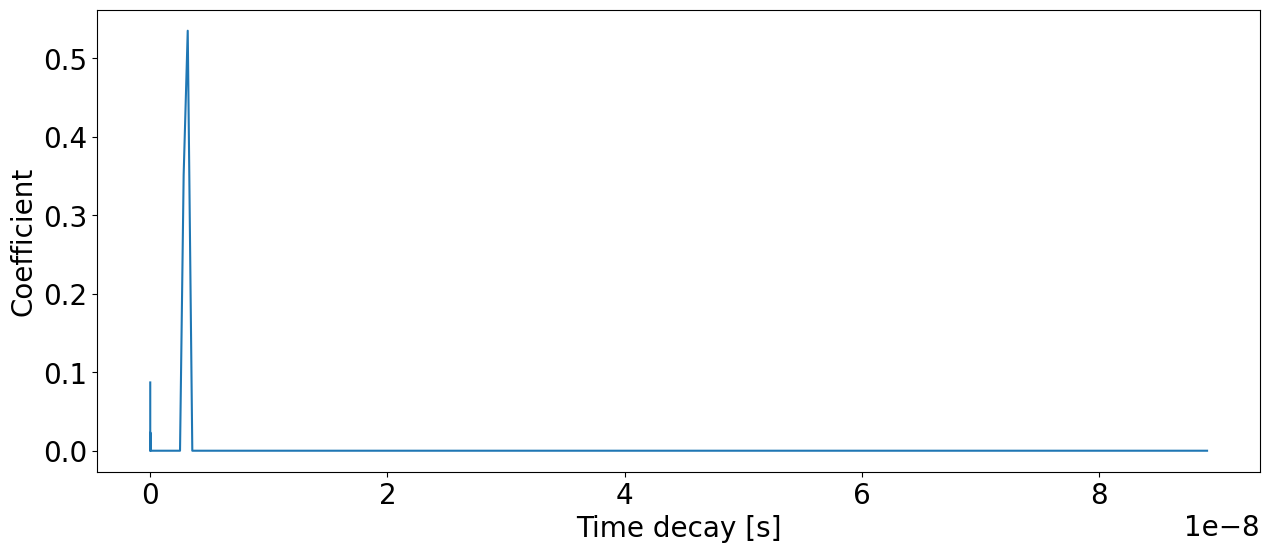

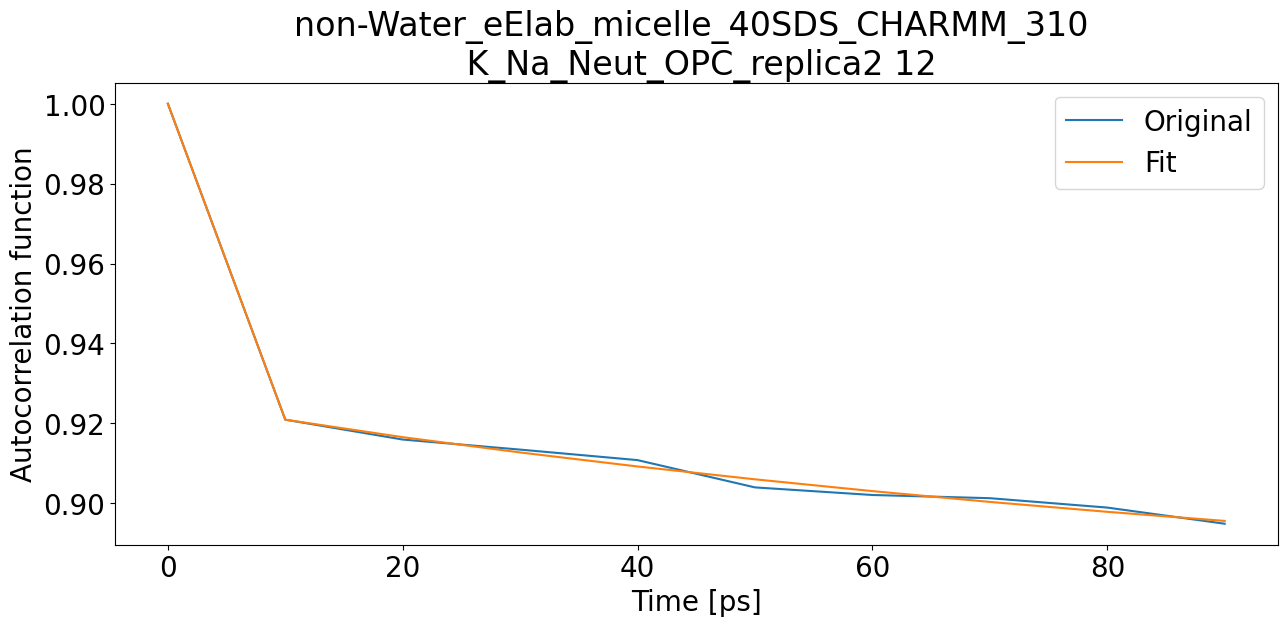

T1: 8.076900730275842 T2: 0.007227232150516085 NOE: -0.14178897128190826


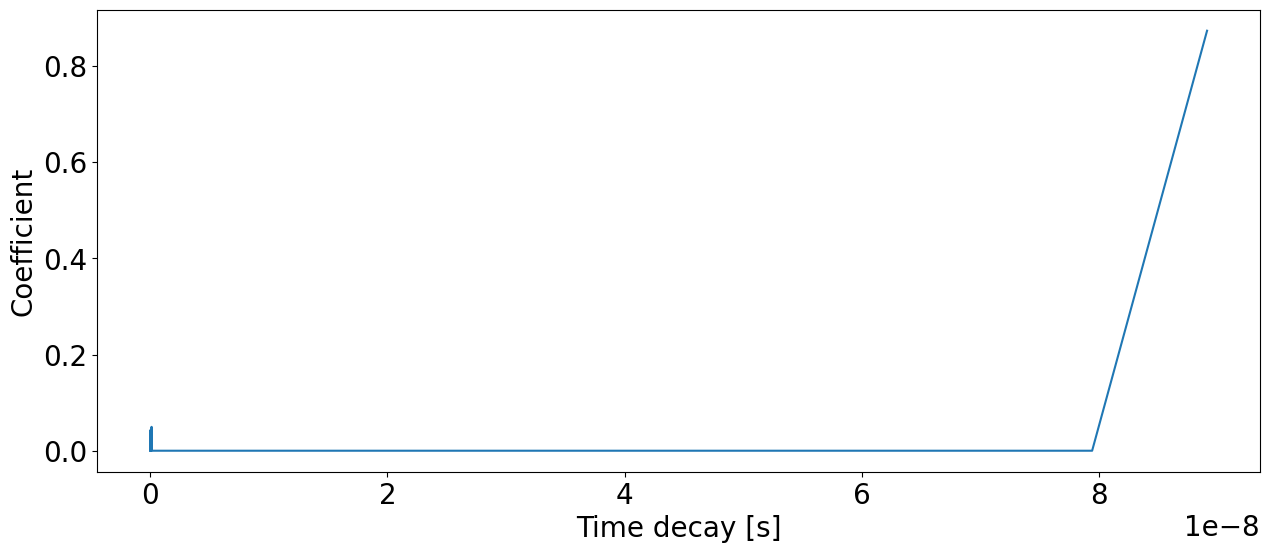

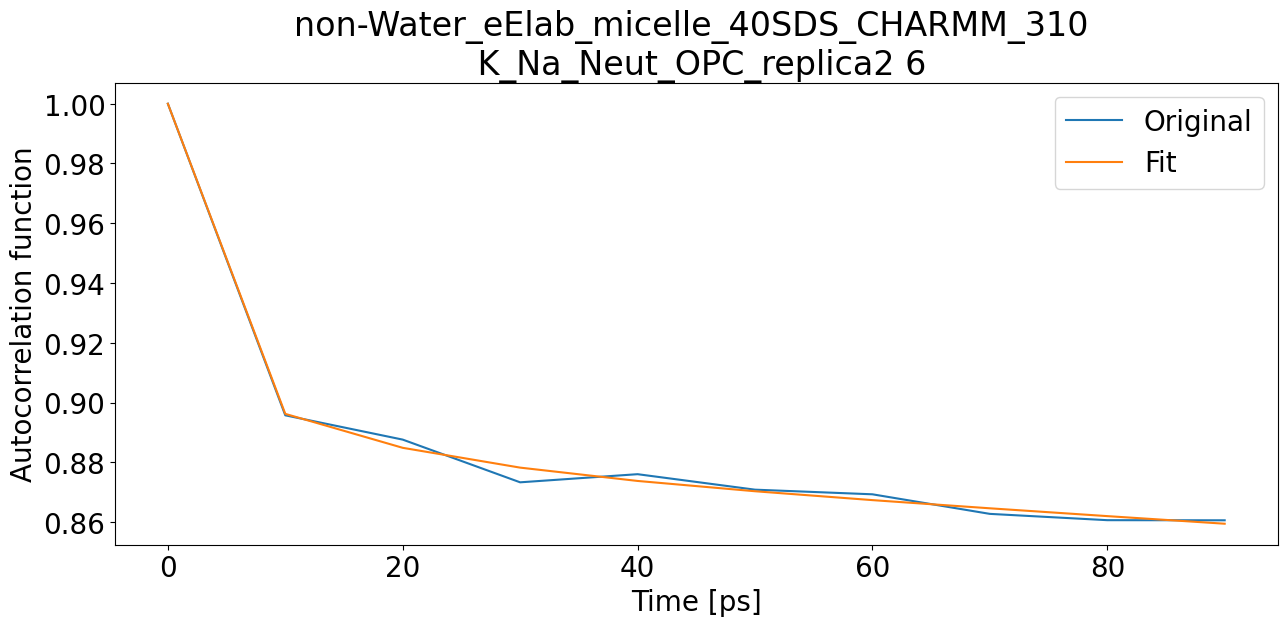

T1: 1.7520372216156095 T2: 0.009737711148551313 NOE: 0.397636568667015


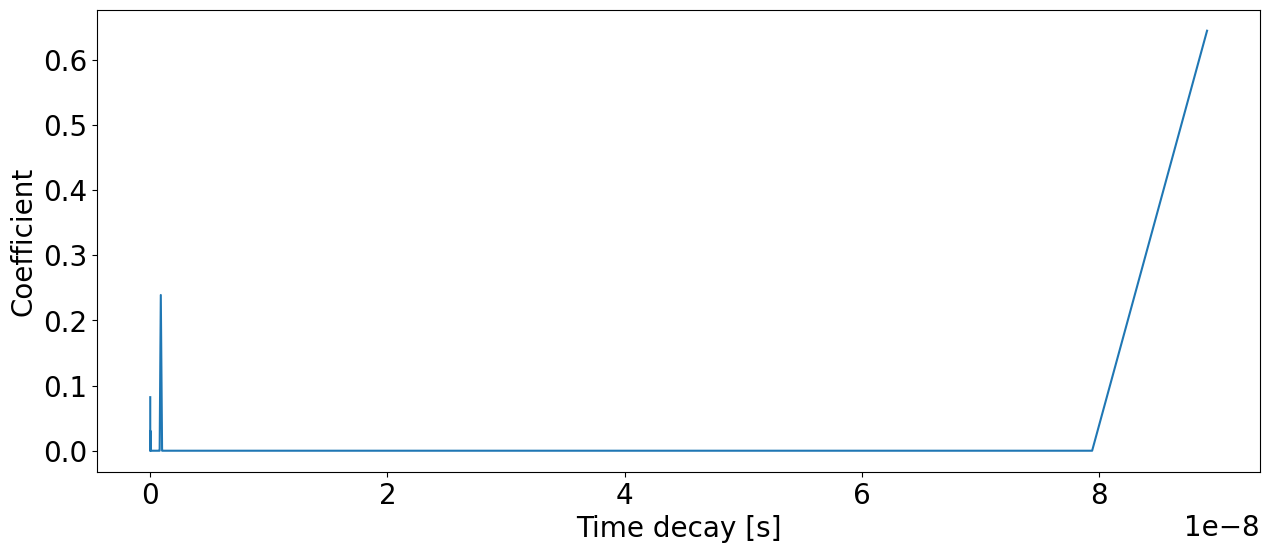

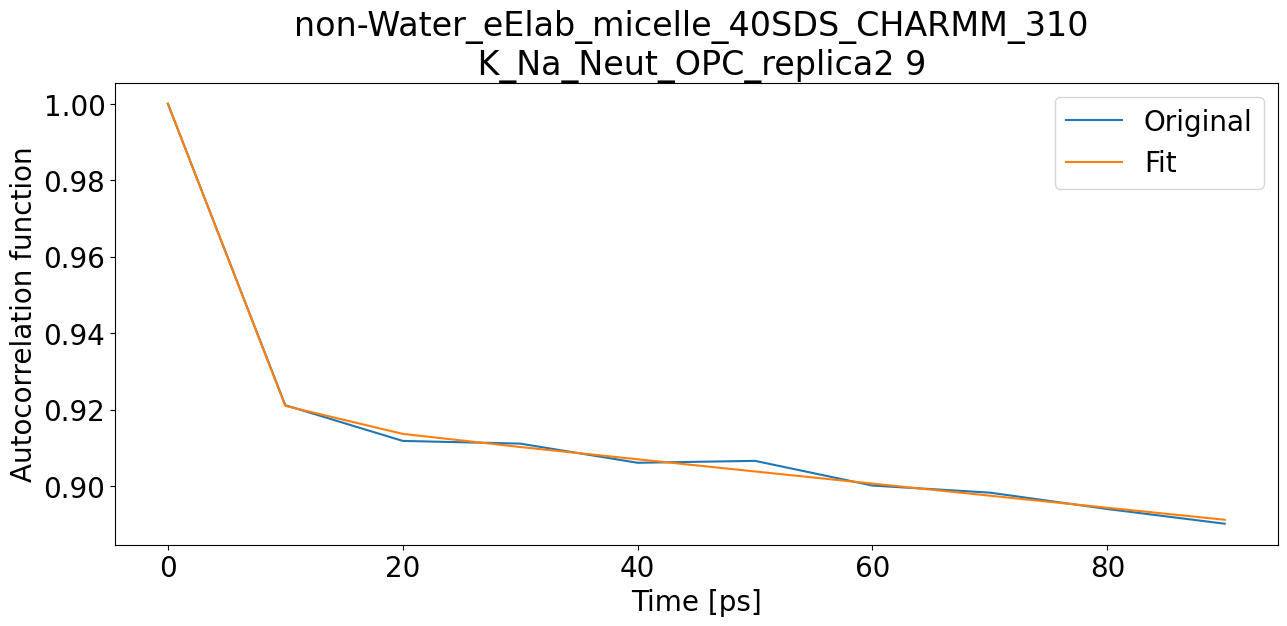

T1: 0.47250237568890285 T2: 0.17458577516028137 NOE: 0.8043305593792099


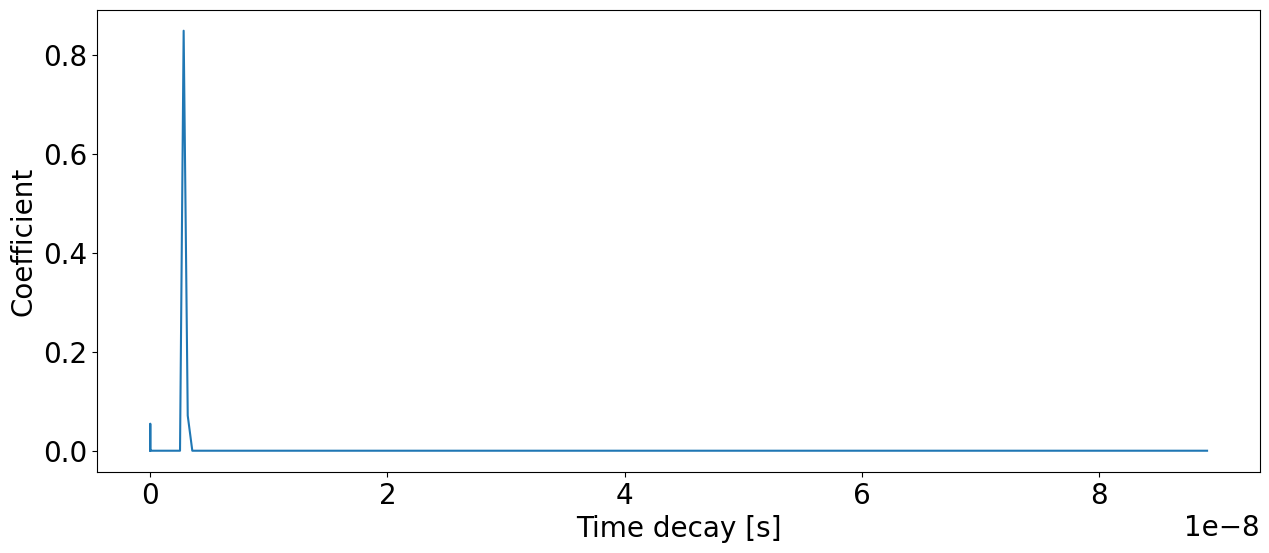

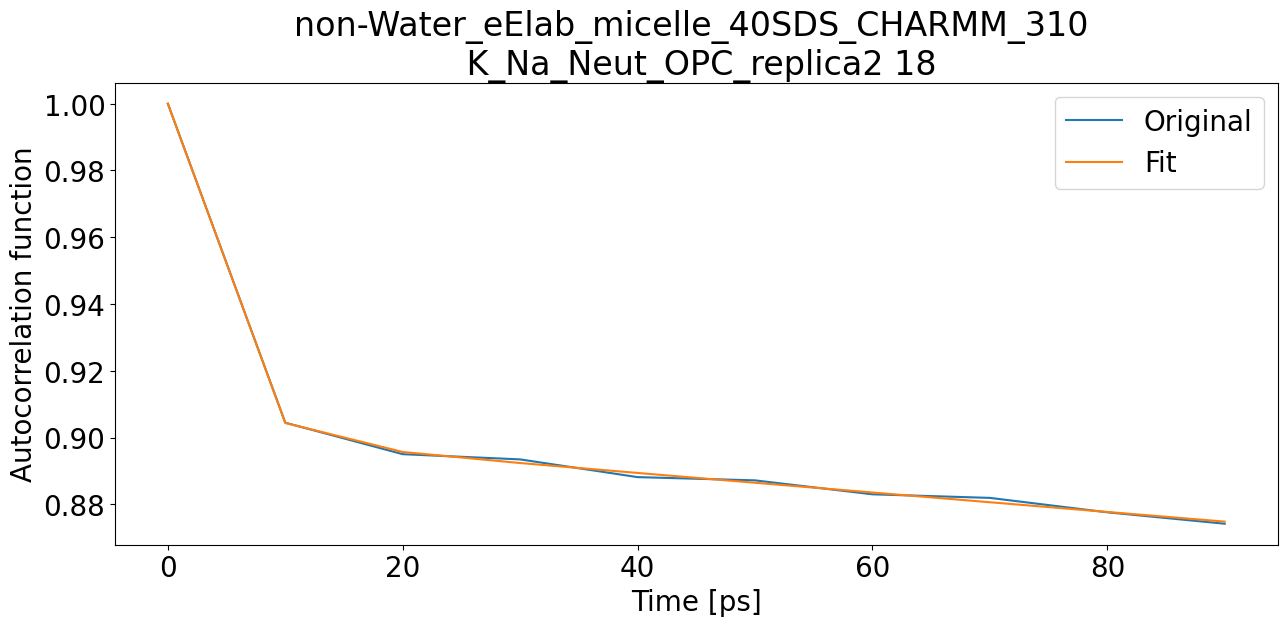

T1: 0.4963084492125979 T2: 0.16991134060237167 NOE: 0.8093188720181705
correl function should exist


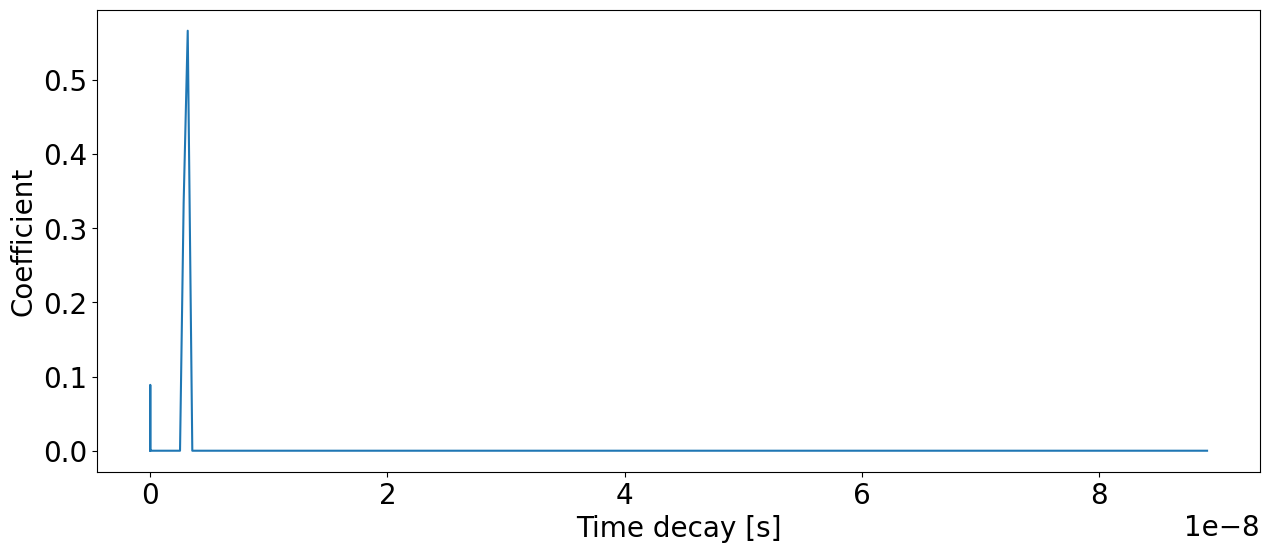

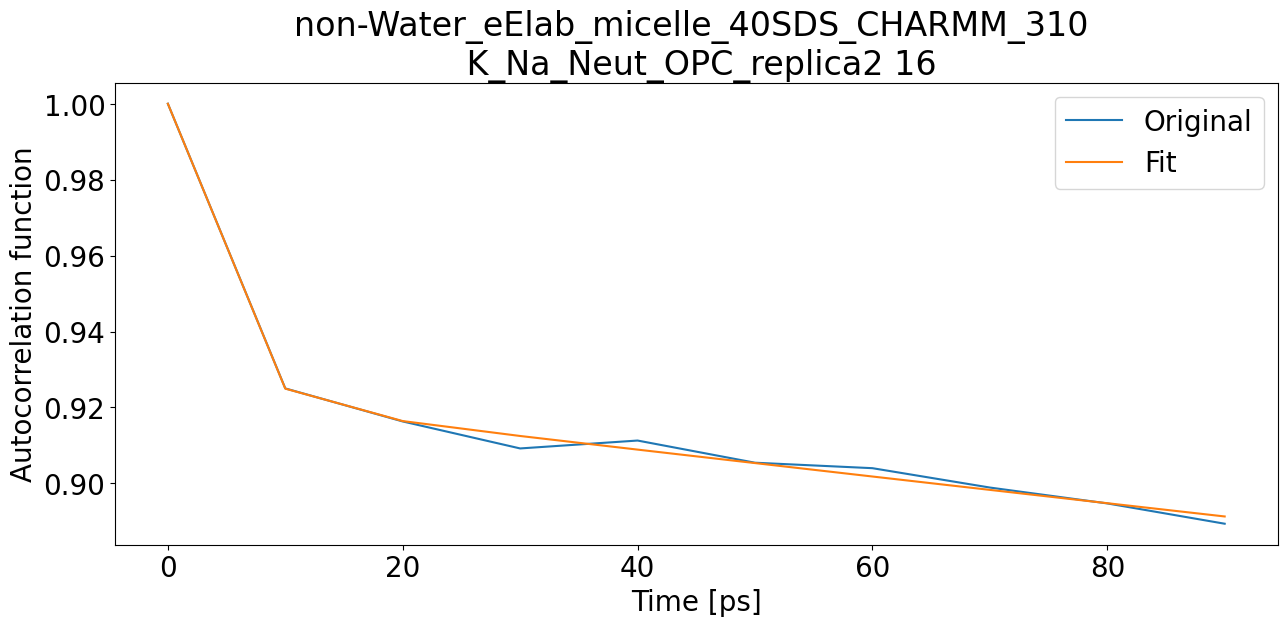

T1: 0.45244491661417585 T2: 0.18773846382746492 NOE: 0.79136266087854


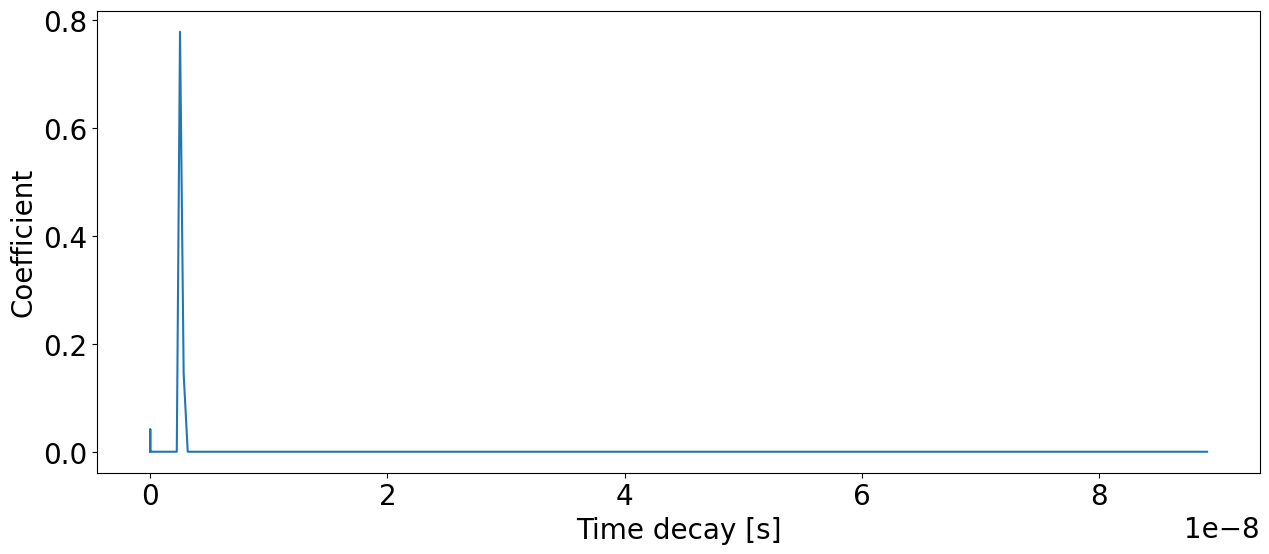

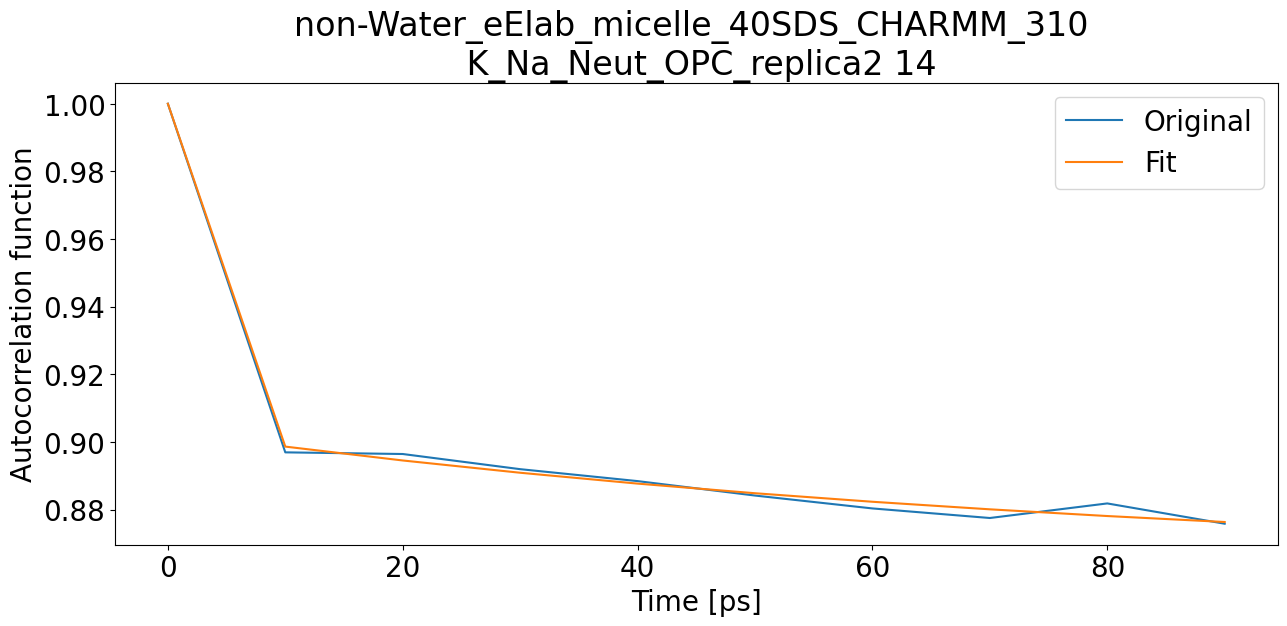

T1: 9.209896637261933 T2: 0.0072991088756858 NOE: 0.18034088275053217


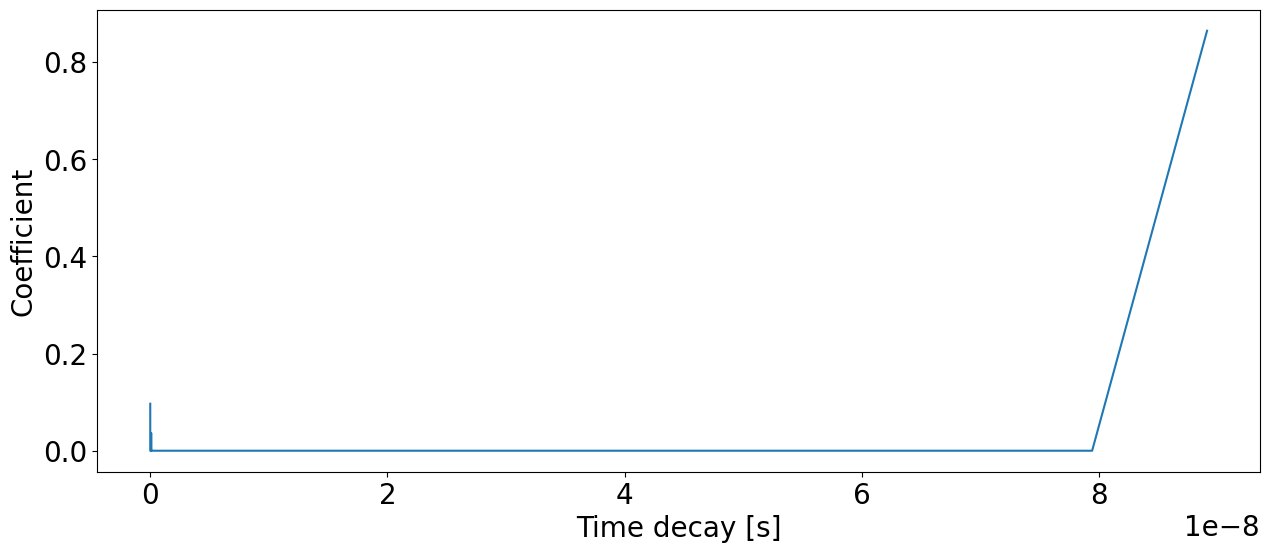

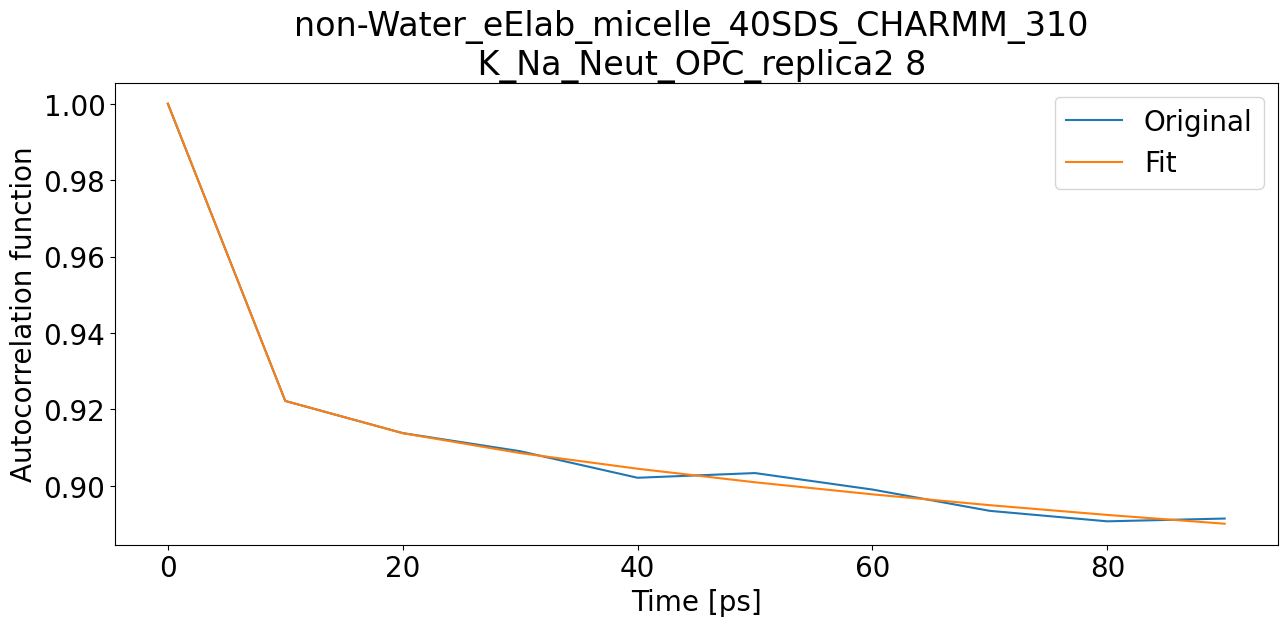

T1: 8.387128511296323 T2: 0.007241000896764103 NOE: -0.06772982869982158


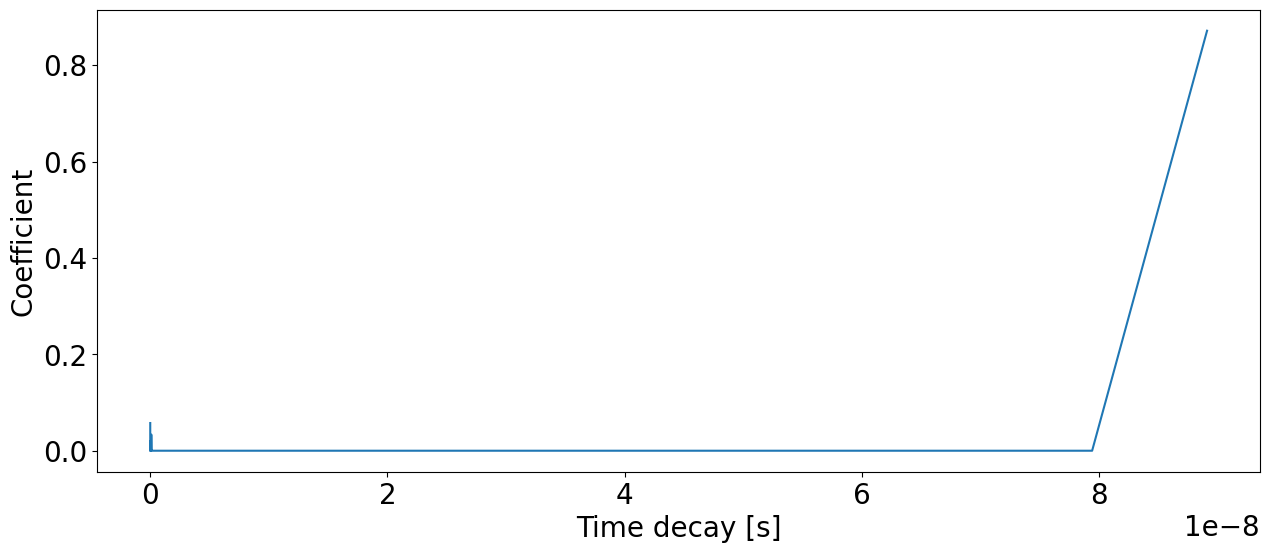

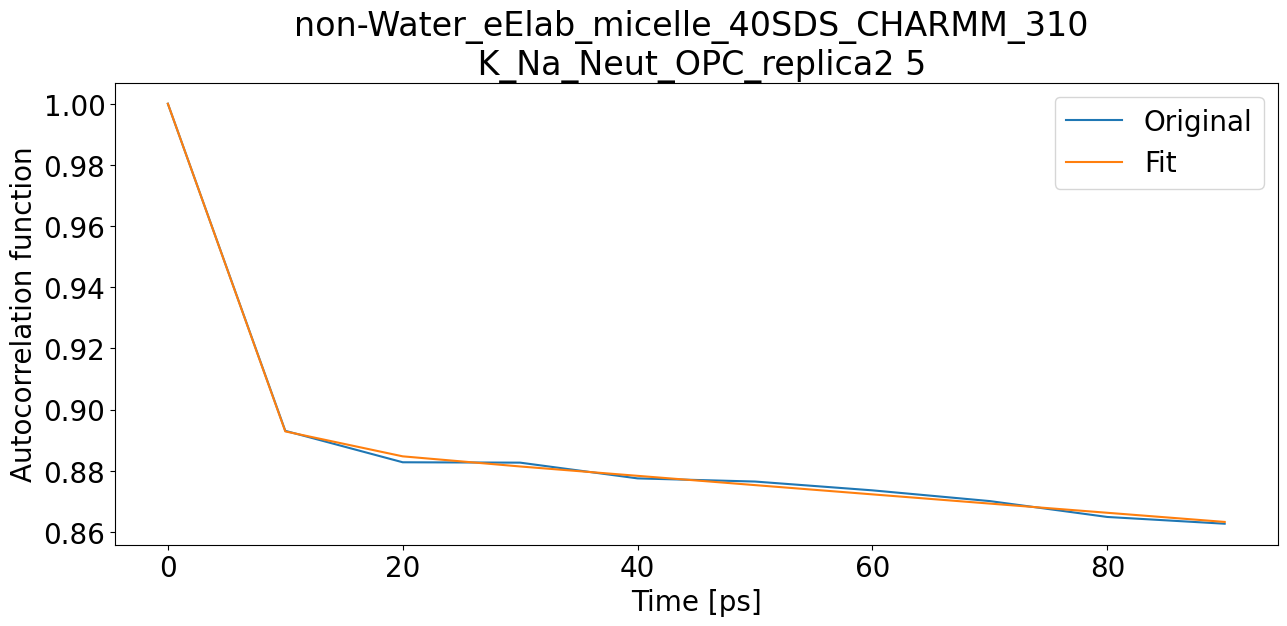

T1: 0.49163047764056633 T2: 0.17799245741763434 NOE: 0.8046926612586522


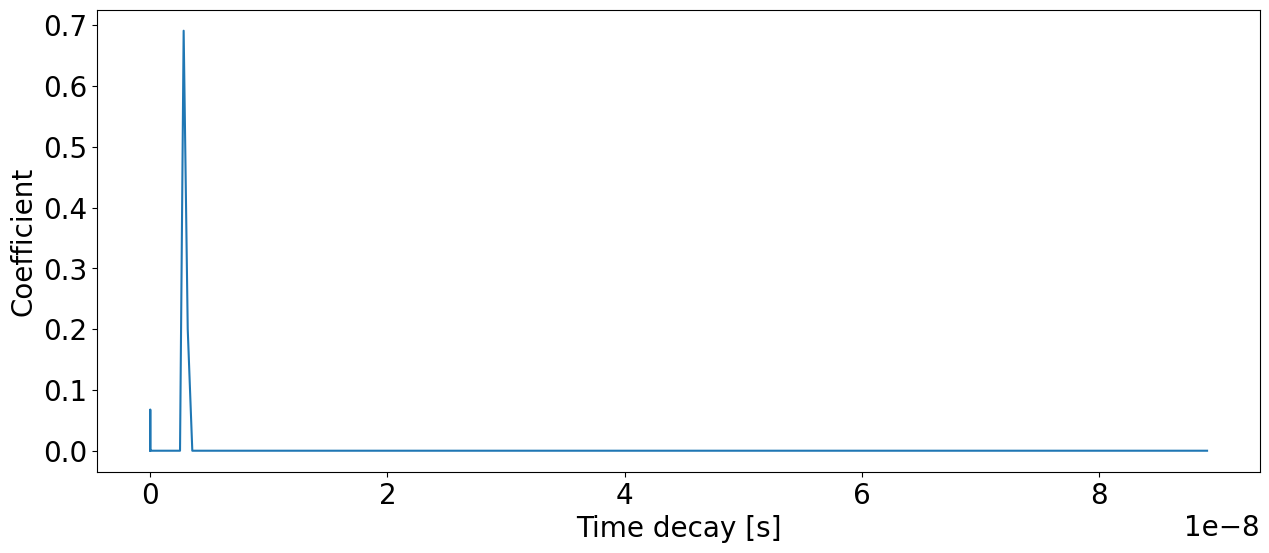

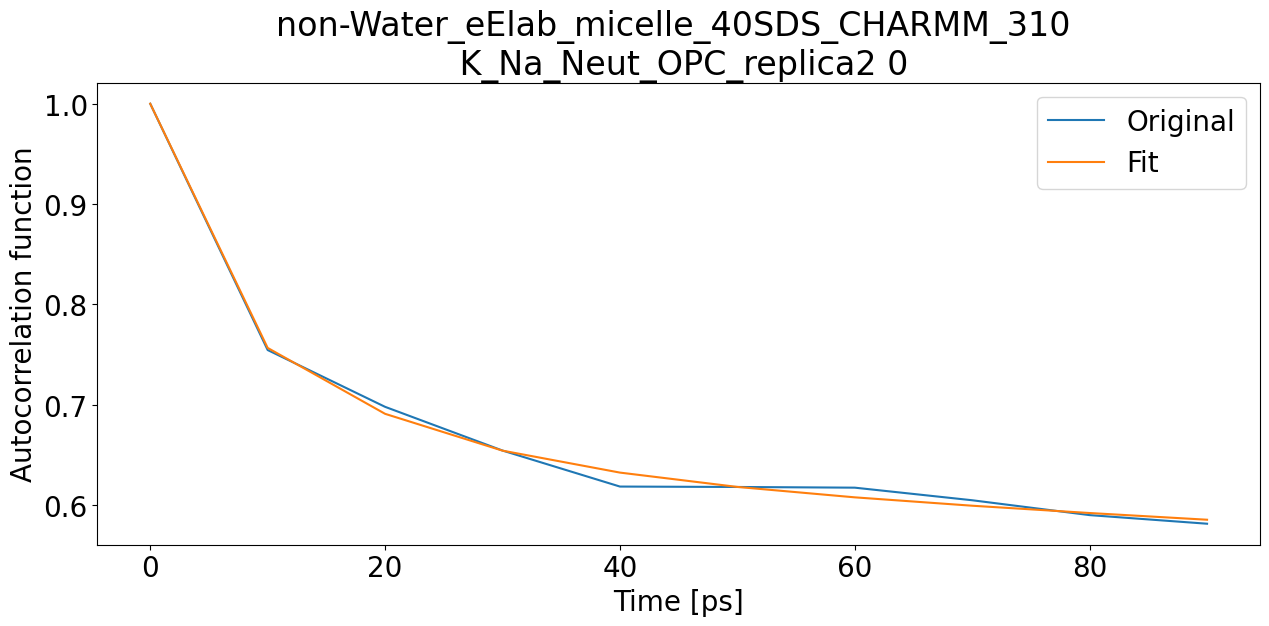

T1: 0.7053037308106452 T2: 0.5392212688963121 NOE: 0.36019845104187453


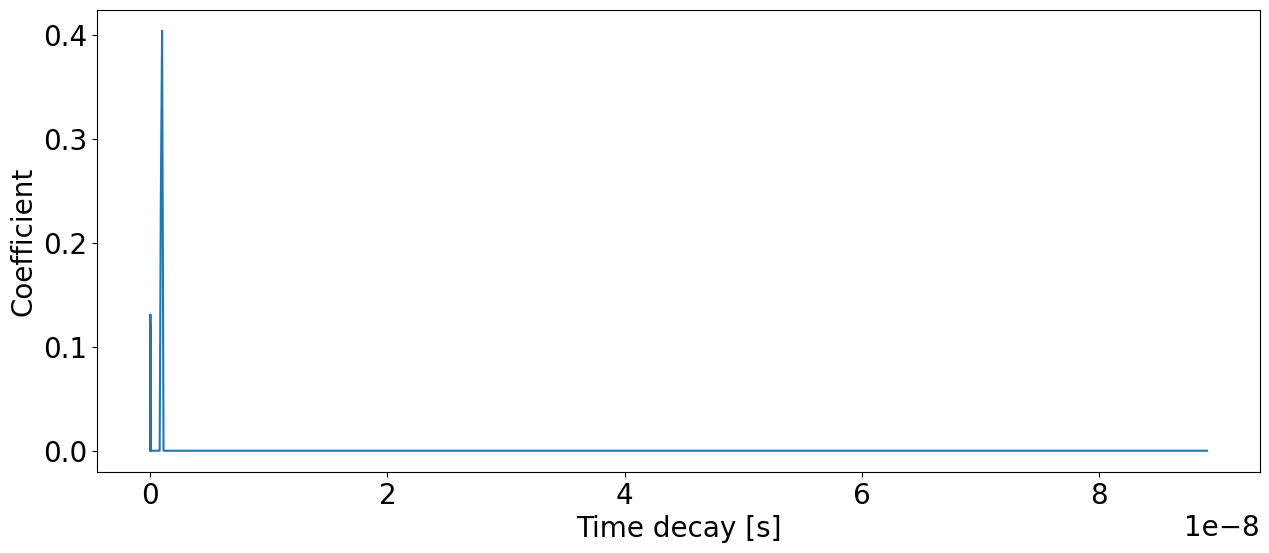

In [5]:
calculated_systems={}
for file in os.listdir(parent_folder_path):
    folder_path = parent_folder_path+os.fsdecode(file)+"/"
    for system in systems:
        if fnmatch.fnmatch(os.fsdecode(file), "*"+system+"*"):
            calculated_systems[os.fsdecode(file)]=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_path_relax,output_path_timescales,output_name=None)

<h3>6) Plot results</h3>

<h4>4.1) Plot T1, T2, hetNOE relaxation data</h4>

In [14]:
plot_output="relax_times.pdf"
pt.plot_T1_T2_noe(aminoAcids,plot_output)

NameError: name 'plt' is not defined

<h4>4.2) Set y-axis range and categories to plot in different colors</h4>

In [9]:
merge=5 # number of consequent points to be merged (works on log scale!!)
groupTimes=[10**(-10),10**(-9),10**(-9)*5,10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value
ylim=[10**(-10),10**(-8)*2] # useful for observing details
ylim_weig=[0,1]
ylim=None # if None the whole range of available data is plotted
title="Time coefficients"
xlabel="Residue of hMff"
plot_output="time_scales.pdf"

<h4>4.2) Plot dynamics</h4>

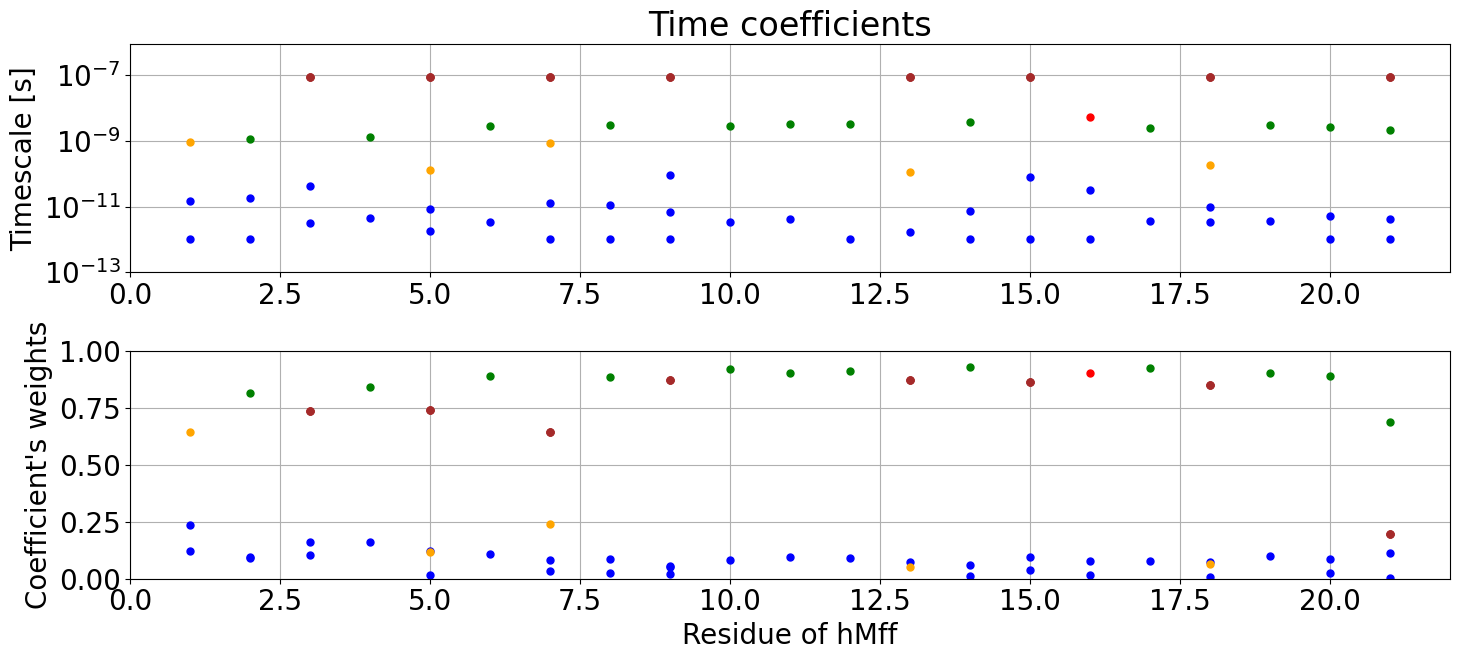

In [10]:
rt.PlotTimescales(aminoAcids,merge,groupTimes,title,xlabel,ylim,ylim_weig,plot_output)

<center><h1>7) Spin relaxation times as a function of field and dynamics</h1></center>

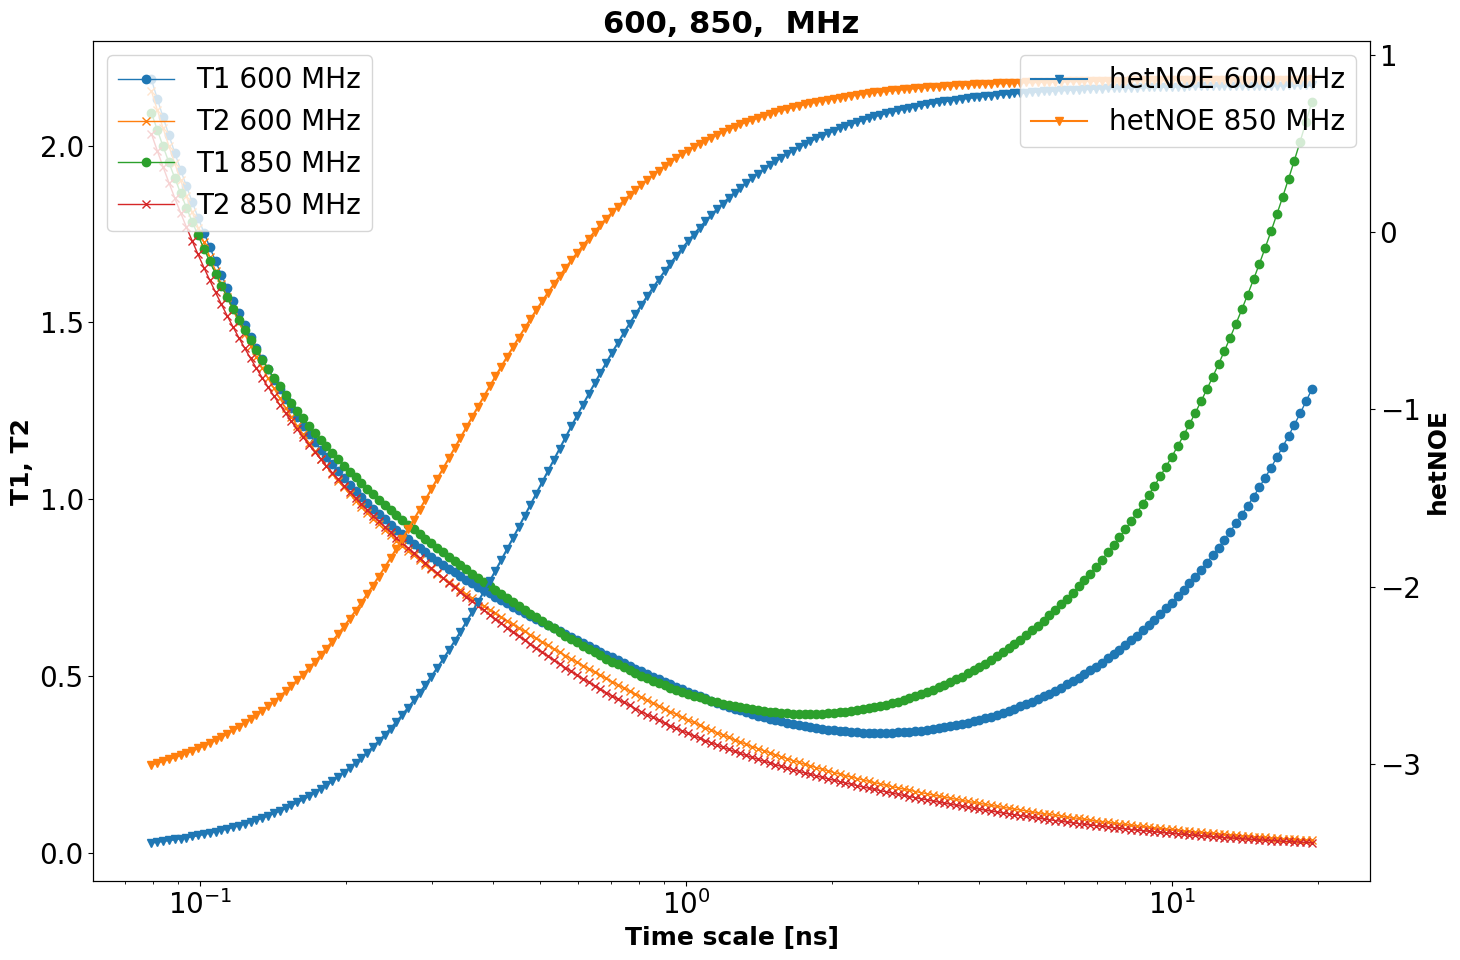

In [12]:
#plot relaxation times as a function of dynamics and magnetic field, only 2D plot, atm
magnetic_fields=[600,850]


smallest_corr_time=1.9 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=4.3 # same as above
N_exp_to_fit=200 # number of exponential functions to be fitted between the samlles and biggest corr time

step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
Ctimes = Ctimes * 0.001 * 10 ** (-9);

fig,ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel("Time scale [ns]",fontsize=18, weight = 'bold')
ax.set_ylabel("T1, T2",fontsize=18, weight = 'bold')
ax.set_xscale('log')
ax2=ax.twinx()
ax2.set_ylabel("hetNOE",fontsize=18, weight = 'bold')
ax2.set_xscale('log')


title=""
for magn_field in magnetic_fields:
    magnetic_field=magn_field*2*np.pi/gammaH*10**6
    
    T1=[]
    T2=[]
    NOE=[]
    for time_scale in Ctimes:
        t1, t2, noe = rt.get_relaxation_N(magnetic_field,[1],[time_scale],OP)
        T1.append(t1)
        T2.append(t2)
        NOE.append(noe)
        
    
    ax.plot(Ctimes*10**9,T1,label="T1 " + str(magn_field)+ " MHz",  marker="o", linewidth=1.0)
    ax.plot(Ctimes*10**9,T2,label="T2 " + str(magn_field)+ " MHz",   marker="x", linewidth=1.0)
    
    
    ax2.plot(Ctimes*10**9,NOE,label="hetNOE " + str(magn_field)+ " MHz",marker="v")
    title+= str(magn_field) + ", "
    

ax.set_title(str(title)+ " MHz",fontsize=22, weight = 'bold')
ax2.legend(loc='upper right')

ax.legend(loc='upper left')
plt.show()